In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
import folium
import time
from pandas.plotting import lag_plot

# carica dati 
#data = pd.read_csv('timeseries/AereoportoBLQ_20170416_20170817', 
#                   header = None, names=['date', 'cell_num', 'nr_people'], index_col = None)
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv', index_col = 0)

/Users/alket/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
data.head(5)

,date,cell_num,nr_people,hours,minutes
0,2017-04-16,486-1252,36.0,0.0,0.0
221,2017-04-16,486-1252,36.0,0.0,15.0
442,2017-04-16,486-1252,34.0,0.0,30.0
663,2017-04-16,486-1252,33.0,0.0,45.0
884,2017-04-16,486-1252,32.0,1.0,0.0


### Aggregare i dati nei vari gradi

In [4]:
# aggrega per numero cella
agg_by_cell = data.groupby(by = data['cell_num'])
print(len(agg_by_cell))

agg_by_date_cell = data.groupby(['date', 'cell_num'])
print(len(agg_by_date_cell))

#agg_by_date_cell_hour = data.groupby(['date', 'cell_num', 'hours'])
#print(len(agg_by_date_cell_hour))

221
27183


486-1252
486-1253
486-1254
486-1255


<Figure size 504x360 with 0 Axes>

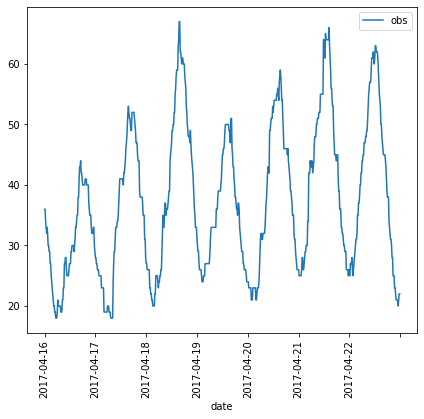

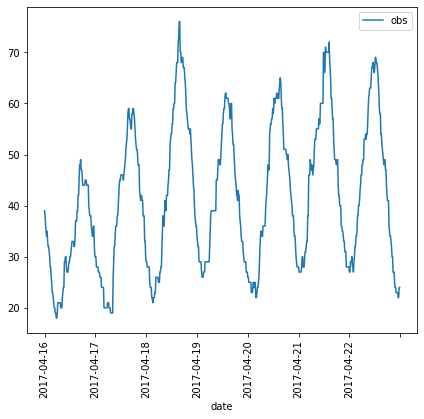

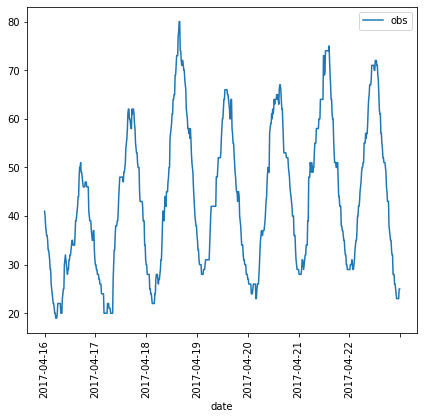

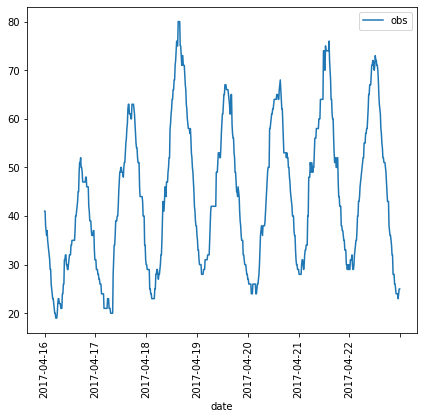

In [17]:
plt.figure(figsize = (7, 5))
counter = 0
for i,k in agg_by_cell:
    counter += 1
    k = k[:700]
    frame = { 'date': k.date, 'obs': k.nr_people } 
    
    k.set_index('date')
    print(i)
    result = pd.DataFrame(frame) 
    result = result.set_index('date')
    fig, ax = plt.subplots(figsize = (7, 6))
    
    result.plot(ax=ax)
    plt.xticks(rotation='vertical')
    
    if counter > 3: break
    

In [ ]:
# 488-1264
serie = agg_by_cell.get_group('488-1264')
serie.tail(10)

### Calcolo prevedibilita per ogni giorno della settimana
<p>Il calcolo qui sotto prende in considerazione l'osservazione fatta in una certa ora e giorno della settimana e fa la media. Poi usa la media per fare previsione. Infine calcola l'errore per ogni ora e ogni giorno della settimana. </p>


In [ ]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours_of_day = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 
                14.0, 15.0, 16.0, 17.0, 18.0,19.0, 20.0, 21.0, 22.0, 23.0]
#488-1258
for dow in days_of_week:
    for hod in hours_of_day:  
        value_day = []  
        for index, row in serie.iterrows():
        
            s = row['date'].split('-')
            year = int(s[0])
            month = int(s[1])
            day = int(s[2])
        
            dayofweek = datetime.date(year, month, day).strftime("%A")
            hour = row['hours']
            if (dayofweek == dow and hour == hod): 
                value_day.append(row['nr_people']) 
                
        # trasforma in numpy array
        value_day_array = np.array(value_day)
        print(len(value_day_array))
        
        # trova la media
        mean_day = value_day_array.mean()
        
        # fai la differenza tra i valori e la media 
        result = abs(value_day_array - mean_day)
        
        # show boxplot
        print('Error for day '+str(dow)+', Hour ',hod)
        print('Mean Absolute Error = ', np.mean(result))
        plt.figure(figsize = (14,1))
        plt.boxplot(result, vert= False);
        plt.show()    

### Classifica celle per livello di attività. 

In [ ]:
## summary
data.describe()

### HeatMap per la griglia 

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [ ]:
geo_df = gpd.read_file('../data/shp/BLQ.shp')
geo_df.head(10)

In [ ]:
# aggrega per numero cella
agg_by_cell = data.groupby(by = data['cell_num'])
print(len(agg_by_cell))

agg_by_date_cell = data.groupby(['date', 'cell_num'])
print(len(agg_by_date_cell))

agg_by_date_cell_hour = data.groupby(['date', 'cell_num', 'hours'])
print(len(agg_by_date_cell_hour))

In [10]:
locations_2 = []
loc_in = []
loc = []

for i in geo_df.geometry:
    #print(i)
    stringa = str(i)
    coord = stringa[10:]
    coord = coord[:-2]
    #print(coord)
    co1 = coord.split(',')
    for j in co1:
        j = j.strip()
        co_0 = j.split(' ')
        #print(co_0)
        loc_in.append(float(co_0[1].strip()))
        loc_in.append(float(co_0[0].strip()))
        loc.append(loc_in)
        loc_in = []
    locations_2.append(loc)
    loc = []
    
print(len(locations_2))

221


In [11]:
locations_2

[[[44.53416658755, 11.2833336745],
  [44.53541658765, 11.2833336745],
  [44.53541658765, 11.2850003413],
  [44.53416658755, 11.2850003413],
  [44.53416658755, 11.2833336745]],
 [[44.53416658755, 11.2850003413],
  [44.53541658765, 11.2850003413],
  [44.53541658765, 11.2866670081],
  [44.53416658755, 11.2866670081],
  [44.53416658755, 11.2850003413]],
 [[44.53416658755, 11.2866670081],
  [44.53541658765, 11.2866670081],
  [44.53541658765, 11.2883336749],
  [44.53416658755, 11.2883336749],
  [44.53416658755, 11.2866670081]],
 [[44.53416658755, 11.2883336749],
  [44.53541658765, 11.2883336749],
  [44.53541658765, 11.2900003417],
  [44.53416658755, 11.2900003417],
  [44.53416658755, 11.2883336749]],
 [[44.53416658755, 11.2900003417],
  [44.53541658765, 11.2900003417],
  [44.53541658765, 11.2916670085],
  [44.53416658755, 11.2916670085],
  [44.53416658755, 11.2900003417]],
 [[44.53416658755, 11.2916670085],
  [44.53541658765, 11.2916670085],
  [44.53541658765, 11.2933336753],
  [44.534166587

In [12]:
cells = geo_df['SP_ID'].tolist()
print(len(cells))

221


In [13]:
cells

['487-1253',
 '487-1254',
 '487-1255',
 '487-1256',
 '487-1257',
 '487-1258',
 '487-1259',
 '487-1260',
 '487-1261',
 '487-1262',
 '487-1263',
 '487-1264',
 '487-1265',
 '487-1266',
 '487-1267',
 '487-1268',
 '487-1269',
 '488-1253',
 '488-1254',
 '488-1255',
 '488-1256',
 '488-1257',
 '488-1258',
 '488-1259',
 '488-1260',
 '488-1261',
 '488-1262',
 '488-1263',
 '488-1264',
 '488-1265',
 '488-1266',
 '488-1267',
 '488-1268',
 '488-1269',
 '489-1253',
 '489-1254',
 '489-1255',
 '489-1256',
 '489-1257',
 '489-1258',
 '489-1259',
 '489-1260',
 '489-1261',
 '489-1262',
 '489-1263',
 '489-1264',
 '489-1265',
 '489-1266',
 '489-1267',
 '489-1268',
 '489-1269',
 '490-1253',
 '490-1254',
 '490-1255',
 '490-1256',
 '490-1257',
 '490-1258',
 '490-1259',
 '490-1260',
 '490-1261',
 '490-1262',
 '490-1263',
 '490-1264',
 '490-1265',
 '490-1266',
 '490-1267',
 '490-1268',
 '490-1269',
 '491-1253',
 '491-1254',
 '491-1255',
 '491-1256',
 '491-1257',
 '491-1258',
 '491-1259',
 '491-1260',
 '491-1261',

In [14]:
# crea una feature media 'mean' 
d_cell = {}
for i, k in agg_by_cell: 
    #print(i, k)
    d_cell[i] = int(k['nr_people'].mean())  
    
val = []

for i in data['cell_num']:
    val_i = d_cell.get(i)
    val.append(val_i)
        
data['mean']= val 
data 

,date,cell_num,nr_people,hours,minutes,mean
0,2017-04-16,486-1252,36.0,0.0,0.0,43
221,2017-04-16,486-1252,36.0,0.0,15.0,43
442,2017-04-16,486-1252,34.0,0.0,30.0,43
663,2017-04-16,486-1252,33.0,0.0,45.0,43
884,2017-04-16,486-1252,32.0,1.0,0.0,43
...,...,...,...,...,...,...
2608683,2017-08-16,498-1268,32.0,22.0,45.0,38
2608904,2017-08-16,498-1268,32.0,23.0,0.0,38
2609125,2017-08-16,498-1268,32.0,23.0,15.0,38
2609346,2017-08-16,498-1268,32.0,23.0,30.0,38


In [28]:
print(len(data2))

221


In [29]:
dict2data = {}
for index, row in data.iterrows():
    cn = row['cell_num']
    dict2data[cn] = row['mean']

In [30]:
dict2data

{'486-1252': 43,
 '486-1253': 48,
 '486-1254': 50,
 '486-1255': 51,
 '486-1256': 51,
 '486-1257': 47,
 '486-1258': 40,
 '486-1259': 40,
 '486-1260': 40,
 '486-1261': 40,
 '486-1262': 40,
 '486-1263': 442,
 '486-1264': 406,
 '486-1265': 290,
 '486-1266': 110,
 '486-1267': 25,
 '486-1268': 26,
 '487-1252': 45,
 '487-1253': 52,
 '487-1254': 50,
 '487-1255': 50,
 '487-1256': 51,
 '487-1257': 55,
 '487-1258': 54,
 '487-1259': 46,
 '487-1260': 41,
 '487-1261': 40,
 '487-1262': 68,
 '487-1263': 497,
 '487-1264': 412,
 '487-1265': 331,
 '487-1266': 187,
 '487-1267': 26,
 '487-1268': 126,
 '488-1252': 232,
 '488-1253': 251,
 '488-1254': 101,
 '488-1255': 51,
 '488-1256': 51,
 '488-1257': 51,
 '488-1258': 70,
 '488-1259': 58,
 '488-1260': 56,
 '488-1261': 50,
 '488-1262': 47,
 '488-1263': 310,
 '488-1264': 419,
 '488-1265': 381,
 '488-1266': 268,
 '488-1267': 81,
 '488-1268': 163,
 '489-1252': 390,
 '489-1253': 410,
 '489-1254': 251,
 '489-1255': 213,
 '489-1256': 82,
 '489-1257': 51,
 '489-1258

### Normalizza dati e visualizza mappa

In [16]:
mean2cell = data2['mean'].tolist()
minn = min(mean2cell)
maxx = max(mean2cell)
normalized = []
count = 0
for i in mean2cell: 
    
    rounded = round((i-minn)/(maxx-minn),3)    
    normalized.append(rounded)
                      
normalized[0:10]  

[0.297, 0.082, 0.059, 0.624, 0.148, 0.504, 0.186, 0.059, 0.409, 0.629]

In [17]:
air = folium.Map(location = [44.5368, 11.302], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i in locations_2:
    folium.Polygon(locations = locations_2[count], color='blue', weight=1, fill_color='red', 
                   fill_opacity=normalized[count_norm]-0.1,fill=True, popup='Airport',
                   tooltip='Cell = '+cells[count]+' norm.act = '+str(normalized[count_norm]),
    ).add_to(air)
    
    count +=1
    count_norm +=1
display(air)

### Ricava foto per la heatmap

In [18]:
agg_by_cell_hour = data.groupby(['hours','cell_num'])
print(len(agg_by_cell_hour))

5304


In [19]:
#{ date : { cell : [values] }}
count = 0
hours = {}
dict2cells = {}
count = 0
for i,k in agg_by_cell_hour:
    
    hour_i = i[0]
    cell_i = i[1]
    activity_val = [] 
    count +=1
   
    print(i, k)
    
    if count > 2652: break
    for index, row in k.iterrows():
        if hour_i == 11.0:
            val_i = row['nr_people'] 
            activity_val.append(val_i)
    activity_val = np.array(activity_val)
    mean_val= activity_val.mean()
    dict2cells[cell_i]= mean_val        

(0.0, '486-1252')                date  cell_num  nr_people  hours  minutes  mean
0        2017-04-16  486-1252       36.0    0.0      0.0    43
221      2017-04-16  486-1252       36.0    0.0     15.0    43
442      2017-04-16  486-1252       34.0    0.0     30.0    43
663      2017-04-16  486-1252       33.0    0.0     45.0    43
21216    2017-04-17  486-1252       33.0    0.0      0.0    43
...             ...       ...        ...    ...      ...   ...
2567799  2017-08-15  486-1252       35.0    0.0     45.0    43
2588352  2017-08-16  486-1252       39.0    0.0      0.0    43
2588573  2017-08-16  486-1252       38.0    0.0     15.0    43
2588794  2017-08-16  486-1252       37.0    0.0     30.0    43
2589015  2017-08-16  486-1252       36.0    0.0     45.0    43

[492 rows x 6 columns]
(0.0, '486-1253')                date  cell_num  nr_people  hours  minutes  mean
1        2017-04-16  486-1253       39.0    0.0      0.0    48
222      2017-04-16  486-1253       38.0    0.0     15.0  

/Users/alket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/Users/alket/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.0, '486-1258')                date  cell_num  nr_people  hours  minutes  mean
6        2017-04-16  486-1258       42.0    0.0      0.0    40
227      2017-04-16  486-1258       42.0    0.0     15.0    40
448      2017-04-16  486-1258       40.0    0.0     30.0    40
669      2017-04-16  486-1258       39.0    0.0     45.0    40
21222    2017-04-17  486-1258       40.0    0.0      0.0    40
...             ...       ...        ...    ...      ...   ...
2567805  2017-08-15  486-1258       30.0    0.0     45.0    40
2588358  2017-08-16  486-1258       32.0    0.0      0.0    40
2588579  2017-08-16  486-1258       33.0    0.0     15.0    40
2588800  2017-08-16  486-1258       33.0    0.0     30.0    40
2589021  2017-08-16  486-1258       31.0    0.0     45.0    40

[492 rows x 6 columns]
(0.0, '486-1259')                date  cell_num  nr_people  hours  minutes  mean
7        2017-04-16  486-1259       41.0    0.0      0.0    40
228      2017-04-16  486-1259       41.0    0.0     15.0  

(0.0, '487-1253')                date  cell_num  nr_people  hours  minutes  mean
18       2017-04-16  487-1253       43.0    0.0      0.0    52
239      2017-04-16  487-1253       42.0    0.0     15.0    52
460      2017-04-16  487-1253       39.0    0.0     30.0    52
681      2017-04-16  487-1253       38.0    0.0     45.0    52
21234    2017-04-17  487-1253       38.0    0.0      0.0    52
...             ...       ...        ...    ...      ...   ...
2567817  2017-08-15  487-1253       42.0    0.0     45.0    52
2588370  2017-08-16  487-1253       46.0    0.0      0.0    52
2588591  2017-08-16  487-1253       44.0    0.0     15.0    52
2588812  2017-08-16  487-1253       43.0    0.0     30.0    52
2589033  2017-08-16  487-1253       41.0    0.0     45.0    52

[492 rows x 6 columns]
(0.0, '487-1254')                date  cell_num  nr_people  hours  minutes  mean
19       2017-04-16  487-1254       42.0    0.0      0.0    50
240      2017-04-16  487-1254       42.0    0.0     15.0  

(0.0, '487-1265')                date  cell_num  nr_people  hours  minutes  mean
30       2017-04-16  487-1265      252.0    0.0      0.0   331
251      2017-04-16  487-1265      250.0    0.0     15.0   331
472      2017-04-16  487-1265      247.0    0.0     30.0   331
693      2017-04-16  487-1265      241.0    0.0     45.0   331
21246    2017-04-17  487-1265      233.0    0.0      0.0   331
...             ...       ...        ...    ...      ...   ...
2567829  2017-08-15  487-1265      296.0    0.0     45.0   331
2588382  2017-08-16  487-1265      325.0    0.0      0.0   331
2588603  2017-08-16  487-1265      333.0    0.0     15.0   331
2588824  2017-08-16  487-1265      328.0    0.0     30.0   331
2589045  2017-08-16  487-1265      311.0    0.0     45.0   331

[492 rows x 6 columns]
(0.0, '487-1266')                date  cell_num  nr_people  hours  minutes  mean
31       2017-04-16  487-1266      173.0    0.0      0.0   187
252      2017-04-16  487-1266      172.0    0.0     15.0  

(0.0, '488-1259')                date  cell_num  nr_people  hours  minutes  mean
41       2017-04-16  488-1259       57.0    0.0      0.0    58
262      2017-04-16  488-1259       58.0    0.0     15.0    58
483      2017-04-16  488-1259       55.0    0.0     30.0    58
704      2017-04-16  488-1259       54.0    0.0     45.0    58
21257    2017-04-17  488-1259       59.0    0.0      0.0    58
...             ...       ...        ...    ...      ...   ...
2567840  2017-08-15  488-1259       44.0    0.0     45.0    58
2588393  2017-08-16  488-1259       48.0    0.0      0.0    58
2588614  2017-08-16  488-1259       49.0    0.0     15.0    58
2588835  2017-08-16  488-1259       49.0    0.0     30.0    58
2589056  2017-08-16  488-1259       47.0    0.0     45.0    58

[492 rows x 6 columns]
(0.0, '488-1260')                date  cell_num  nr_people  hours  minutes  mean
42       2017-04-16  488-1260       56.0    0.0      0.0    56
263      2017-04-16  488-1260       56.0    0.0     15.0  

(0.0, '489-1254')                date  cell_num  nr_people  hours  minutes  mean
53       2017-04-16  489-1254      203.0    0.0      0.0   251
274      2017-04-16  489-1254      199.0    0.0     15.0   251
495      2017-04-16  489-1254      187.0    0.0     30.0   251
716      2017-04-16  489-1254      182.0    0.0     45.0   251
21269    2017-04-17  489-1254      183.0    0.0      0.0   251
...             ...       ...        ...    ...      ...   ...
2567852  2017-08-15  489-1254      204.0    0.0     45.0   251
2588405  2017-08-16  489-1254      221.0    0.0      0.0   251
2588626  2017-08-16  489-1254      211.0    0.0     15.0   251
2588847  2017-08-16  489-1254      206.0    0.0     30.0   251
2589068  2017-08-16  489-1254      199.0    0.0     45.0   251

[492 rows x 6 columns]
(0.0, '489-1255')                date  cell_num  nr_people  hours  minutes  mean
54       2017-04-16  489-1255      175.0    0.0      0.0   213
275      2017-04-16  489-1255      172.0    0.0     15.0  

(0.0, '489-1267')                date  cell_num  nr_people  hours  minutes  mean
66       2017-04-16  489-1267      109.0    0.0      0.0   113
287      2017-04-16  489-1267      109.0    0.0     15.0   113
508      2017-04-16  489-1267      109.0    0.0     30.0   113
729      2017-04-16  489-1267      108.0    0.0     45.0   113
21282    2017-04-17  489-1267      103.0    0.0      0.0   113
...             ...       ...        ...    ...      ...   ...
2567865  2017-08-15  489-1267       91.0    0.0     45.0   113
2588418  2017-08-16  489-1267      103.0    0.0      0.0   113
2588639  2017-08-16  489-1267      104.0    0.0     15.0   113
2588860  2017-08-16  489-1267      104.0    0.0     30.0   113
2589081  2017-08-16  489-1267      100.0    0.0     45.0   113

[492 rows x 6 columns]
(0.0, '489-1268')                date  cell_num  nr_people  hours  minutes  mean
67       2017-04-16  489-1268      150.0    0.0      0.0   156
288      2017-04-16  489-1268      151.0    0.0     15.0  

(0.0, '490-1261')                date  cell_num  nr_people  hours  minutes  mean
77       2017-04-16  490-1261       58.0    0.0      0.0    56
298      2017-04-16  490-1261       58.0    0.0     15.0    56
519      2017-04-16  490-1261       56.0    0.0     30.0    56
740      2017-04-16  490-1261       55.0    0.0     45.0    56
21293    2017-04-17  490-1261       59.0    0.0      0.0    56
...             ...       ...        ...    ...      ...   ...
2567876  2017-08-15  490-1261       42.0    0.0     45.0    56
2588429  2017-08-16  490-1261       45.0    0.0      0.0    56
2588650  2017-08-16  490-1261       46.0    0.0     15.0    56
2588871  2017-08-16  490-1261       46.0    0.0     30.0    56
2589092  2017-08-16  490-1261       44.0    0.0     45.0    56

[492 rows x 6 columns]
(0.0, '490-1262')                date  cell_num  nr_people  hours  minutes  mean
78       2017-04-16  490-1262       53.0    0.0      0.0    51
299      2017-04-16  490-1262       54.0    0.0     15.0  

(0.0, '491-1256')                date  cell_num  nr_people  hours  minutes  mean
89       2017-04-16  491-1256      158.0    0.0      0.0   193
310      2017-04-16  491-1256      155.0    0.0     15.0   193
531      2017-04-16  491-1256      146.0    0.0     30.0   193
752      2017-04-16  491-1256      141.0    0.0     45.0   193
21305    2017-04-17  491-1256      141.0    0.0      0.0   193
...             ...       ...        ...    ...      ...   ...
2567888  2017-08-15  491-1256      158.0    0.0     45.0   193
2588441  2017-08-16  491-1256      168.0    0.0      0.0   193
2588662  2017-08-16  491-1256      161.0    0.0     15.0   193
2588883  2017-08-16  491-1256      157.0    0.0     30.0   193
2589104  2017-08-16  491-1256      153.0    0.0     45.0   193

[492 rows x 6 columns]
(0.0, '491-1257')                date  cell_num  nr_people  hours  minutes  mean
90       2017-04-16  491-1257      181.0    0.0      0.0   223
311      2017-04-16  491-1257      177.0    0.0     15.0  

(0.0, '492-1252')                date  cell_num  nr_people  hours  minutes  mean
102      2017-04-16  492-1252       63.0    0.0      0.0    72
323      2017-04-16  492-1252       63.0    0.0     15.0    72
544      2017-04-16  492-1252       59.0    0.0     30.0    72
765      2017-04-16  492-1252       59.0    0.0     45.0    72
21318    2017-04-17  492-1252       58.0    0.0      0.0    72
...             ...       ...        ...    ...      ...   ...
2567901  2017-08-15  492-1252       59.0    0.0     45.0    72
2588454  2017-08-16  492-1252       68.0    0.0      0.0    72
2588675  2017-08-16  492-1252       65.0    0.0     15.0    72
2588896  2017-08-16  492-1252       63.0    0.0     30.0    72
2589117  2017-08-16  492-1252       61.0    0.0     45.0    72

[492 rows x 6 columns]
(0.0, '492-1253')                date  cell_num  nr_people  hours  minutes  mean
103      2017-04-16  492-1253       66.0    0.0      0.0    74
324      2017-04-16  492-1253       64.0    0.0     15.0  

(0.0, '492-1263')                date  cell_num  nr_people  hours  minutes  mean
113      2017-04-16  492-1263       26.0    0.0      0.0    24
334      2017-04-16  492-1263       27.0    0.0     15.0    24
555      2017-04-16  492-1263       26.0    0.0     30.0    24
776      2017-04-16  492-1263       25.0    0.0     45.0    24
21329    2017-04-17  492-1263       26.0    0.0      0.0    24
...             ...       ...        ...    ...      ...   ...
2567912  2017-08-15  492-1263       15.0    0.0     45.0    24
2588465  2017-08-16  492-1263       17.0    0.0      0.0    24
2588686  2017-08-16  492-1263       17.0    0.0     15.0    24
2588907  2017-08-16  492-1263       16.0    0.0     30.0    24
2589128  2017-08-16  492-1263       16.0    0.0     45.0    24

[492 rows x 6 columns]
(0.0, '492-1264')                date  cell_num  nr_people  hours  minutes  mean
114      2017-04-16  492-1264       24.0    0.0      0.0    24
335      2017-04-16  492-1264       24.0    0.0     15.0  

(0.0, '493-1258')                date  cell_num  nr_people  hours  minutes  mean
125      2017-04-16  493-1258      208.0    0.0      0.0   257
346      2017-04-16  493-1258      200.0    0.0     15.0   257
567      2017-04-16  493-1258      193.0    0.0     30.0   257
788      2017-04-16  493-1258      187.0    0.0     45.0   257
21341    2017-04-17  493-1258      179.0    0.0      0.0   257
...             ...       ...        ...    ...      ...   ...
2567924  2017-08-15  493-1258      204.0    0.0     45.0   257
2588477  2017-08-16  493-1258      213.0    0.0      0.0   257
2588698  2017-08-16  493-1258      206.0    0.0     15.0   257
2588919  2017-08-16  493-1258      202.0    0.0     30.0   257
2589140  2017-08-16  493-1258      197.0    0.0     45.0   257

[492 rows x 6 columns]
(0.0, '493-1259')                date  cell_num  nr_people  hours  minutes  mean
126      2017-04-16  493-1259      103.0    0.0      0.0   100
347      2017-04-16  493-1259      106.0    0.0     15.0  

(0.0, '494-1252')                date  cell_num  nr_people  hours  minutes  mean
136      2017-04-16  494-1252       65.0    0.0      0.0    64
357      2017-04-16  494-1252       65.0    0.0     15.0    64
578      2017-04-16  494-1252       65.0    0.0     30.0    64
799      2017-04-16  494-1252       66.0    0.0     45.0    64
21352    2017-04-17  494-1252       65.0    0.0      0.0    64
...             ...       ...        ...    ...      ...   ...
2567935  2017-08-15  494-1252       50.0    0.0     45.0    64
2588488  2017-08-16  494-1252       49.0    0.0      0.0    64
2588709  2017-08-16  494-1252       49.0    0.0     15.0    64
2588930  2017-08-16  494-1252       50.0    0.0     30.0    64
2589151  2017-08-16  494-1252       51.0    0.0     45.0    64

[492 rows x 6 columns]
(0.0, '494-1253')                date  cell_num  nr_people  hours  minutes  mean
137      2017-04-16  494-1253       43.0    0.0      0.0    43
358      2017-04-16  494-1253       43.0    0.0     15.0  

(0.0, '494-1264')                date  cell_num  nr_people  hours  minutes  mean
148      2017-04-16  494-1264       24.0    0.0      0.0    22
369      2017-04-16  494-1264       25.0    0.0     15.0    22
590      2017-04-16  494-1264       23.0    0.0     30.0    22
811      2017-04-16  494-1264       23.0    0.0     45.0    22
21364    2017-04-17  494-1264       24.0    0.0      0.0    22
...             ...       ...        ...    ...      ...   ...
2567947  2017-08-15  494-1264       14.0    0.0     45.0    22
2588500  2017-08-16  494-1264       16.0    0.0      0.0    22
2588721  2017-08-16  494-1264       16.0    0.0     15.0    22
2588942  2017-08-16  494-1264       15.0    0.0     30.0    22
2589163  2017-08-16  494-1264       15.0    0.0     45.0    22

[492 rows x 6 columns]
(0.0, '494-1265')                date  cell_num  nr_people  hours  minutes  mean
149      2017-04-16  494-1265       24.0    0.0      0.0    23
370      2017-04-16  494-1265       24.0    0.0     15.0  

(0.0, '495-1260')                date  cell_num  nr_people  hours  minutes  mean
161      2017-04-16  495-1260      174.0    0.0      0.0   206
382      2017-04-16  495-1260      173.0    0.0     15.0   206
603      2017-04-16  495-1260      172.0    0.0     30.0   206
824      2017-04-16  495-1260      171.0    0.0     45.0   206
21377    2017-04-17  495-1260      167.0    0.0      0.0   206
...             ...       ...        ...    ...      ...   ...
2567960  2017-08-15  495-1260      152.0    0.0     45.0   206
2588513  2017-08-16  495-1260      167.0    0.0      0.0   206
2588734  2017-08-16  495-1260      166.0    0.0     15.0   206
2588955  2017-08-16  495-1260      163.0    0.0     30.0   206
2589176  2017-08-16  495-1260      160.0    0.0     45.0   206

[492 rows x 6 columns]
(0.0, '495-1261')                date  cell_num  nr_people  hours  minutes  mean
162      2017-04-16  495-1261      352.0    0.0      0.0   379
383      2017-04-16  495-1261      353.0    0.0     15.0  

(0.0, '496-1254')                date  cell_num  nr_people  hours  minutes  mean
172      2017-04-16  496-1254      204.0    0.0      0.0   199
393      2017-04-16  496-1254      203.0    0.0     15.0   199
614      2017-04-16  496-1254      204.0    0.0     30.0   199
835      2017-04-16  496-1254      205.0    0.0     45.0   199
21388    2017-04-17  496-1254      196.0    0.0      0.0   199
...             ...       ...        ...    ...      ...   ...
2567971  2017-08-15  496-1254      159.0    0.0     45.0   199
2588524  2017-08-16  496-1254      151.0    0.0      0.0   199
2588745  2017-08-16  496-1254      151.0    0.0     15.0   199
2588966  2017-08-16  496-1254      154.0    0.0     30.0   199
2589187  2017-08-16  496-1254      156.0    0.0     45.0   199

[492 rows x 6 columns]
(0.0, '496-1255')                date  cell_num  nr_people  hours  minutes  mean
173      2017-04-16  496-1255      357.0    0.0      0.0   408
394      2017-04-16  496-1255      357.0    0.0     15.0  

(0.0, '496-1266')                date  cell_num  nr_people  hours  minutes  mean
184      2017-04-16  496-1266       19.0    0.0      0.0    20
405      2017-04-16  496-1266       19.0    0.0     15.0    20
626      2017-04-16  496-1266       19.0    0.0     30.0    20
847      2017-04-16  496-1266       19.0    0.0     45.0    20
21400    2017-04-17  496-1266       18.0    0.0      0.0    20
...             ...       ...        ...    ...      ...   ...
2567983  2017-08-15  496-1266       15.0    0.0     45.0    20
2588536  2017-08-16  496-1266       16.0    0.0      0.0    20
2588757  2017-08-16  496-1266       16.0    0.0     15.0    20
2588978  2017-08-16  496-1266       16.0    0.0     30.0    20
2589199  2017-08-16  496-1266       16.0    0.0     45.0    20

[492 rows x 6 columns]
(0.0, '496-1267')                date  cell_num  nr_people  hours  minutes  mean
185      2017-04-16  496-1267       17.0    0.0      0.0    19
406      2017-04-16  496-1267       18.0    0.0     15.0  

(0.0, '497-1261')                date  cell_num  nr_people  hours  minutes  mean
196      2017-04-16  497-1261       28.0    0.0      0.0    32
417      2017-04-16  497-1261       28.0    0.0     15.0    32
638      2017-04-16  497-1261       28.0    0.0     30.0    32
859      2017-04-16  497-1261       28.0    0.0     45.0    32
21412    2017-04-17  497-1261       28.0    0.0      0.0    32
...             ...       ...        ...    ...      ...   ...
2567995  2017-08-15  497-1261       24.0    0.0     45.0    32
2588548  2017-08-16  497-1261       27.0    0.0      0.0    32
2588769  2017-08-16  497-1261       26.0    0.0     15.0    32
2588990  2017-08-16  497-1261       26.0    0.0     30.0    32
2589211  2017-08-16  497-1261       26.0    0.0     45.0    32

[492 rows x 6 columns]
(0.0, '497-1262')                date  cell_num  nr_people  hours  minutes  mean
197      2017-04-16  497-1262       18.0    0.0      0.0    19
418      2017-04-16  497-1262       18.0    0.0     15.0  

(0.0, '498-1256')                date  cell_num  nr_people  hours  minutes  mean
208      2017-04-16  498-1256       72.0    0.0      0.0    70
429      2017-04-16  498-1256       72.0    0.0     15.0    70
650      2017-04-16  498-1256       72.0    0.0     30.0    70
871      2017-04-16  498-1256       72.0    0.0     45.0    70
21424    2017-04-17  498-1256       66.0    0.0      0.0    70
...             ...       ...        ...    ...      ...   ...
2568007  2017-08-15  498-1256       57.0    0.0     45.0    70
2588560  2017-08-16  498-1256       53.0    0.0      0.0    70
2588781  2017-08-16  498-1256       54.0    0.0     15.0    70
2589002  2017-08-16  498-1256       54.0    0.0     30.0    70
2589223  2017-08-16  498-1256       54.0    0.0     45.0    70

[492 rows x 6 columns]
(0.0, '498-1257')                date  cell_num  nr_people  hours  minutes  mean
209      2017-04-16  498-1257      135.0    0.0      0.0   132
430      2017-04-16  498-1257      135.0    0.0     15.0  

(1.0, '486-1255')                date  cell_num  nr_people  hours  minutes  mean
887      2017-04-16  486-1255       36.0    1.0      0.0    51
1108     2017-04-16  486-1255       37.0    1.0     15.0    51
1329     2017-04-16  486-1255       35.0    1.0     30.0    51
1550     2017-04-16  486-1255       34.0    1.0     45.0    51
22103    2017-04-17  486-1255       31.0    1.0      0.0    51
...             ...       ...        ...    ...      ...   ...
2568686  2017-08-15  486-1255       35.0    1.0     45.0    51
2589239  2017-08-16  486-1255       39.0    1.0      0.0    51
2589460  2017-08-16  486-1255       37.0    1.0     15.0    51
2589681  2017-08-16  486-1255       35.0    1.0     30.0    51
2589902  2017-08-16  486-1255       34.0    1.0     45.0    51

[492 rows x 6 columns]
(1.0, '486-1256')                date  cell_num  nr_people  hours  minutes  mean
888      2017-04-16  486-1256       37.0    1.0      0.0    51
1109     2017-04-16  486-1256       37.0    1.0     15.0  

(1.0, '486-1267')                date  cell_num  nr_people  hours  minutes  mean
899      2017-04-16  486-1267       23.0    1.0      0.0    25
1120     2017-04-16  486-1267       23.0    1.0     15.0    25
1341     2017-04-16  486-1267       23.0    1.0     30.0    25
1562     2017-04-16  486-1267       22.0    1.0     45.0    25
22115    2017-04-17  486-1267       20.0    1.0      0.0    25
...             ...       ...        ...    ...      ...   ...
2568698  2017-08-15  486-1267       20.0    1.0     45.0    25
2589251  2017-08-16  486-1267       22.0    1.0      0.0    25
2589472  2017-08-16  486-1267       22.0    1.0     15.0    25
2589693  2017-08-16  486-1267       21.0    1.0     30.0    25
2589914  2017-08-16  486-1267       21.0    1.0     45.0    25

[492 rows x 6 columns]
(1.0, '486-1268')                date  cell_num  nr_people  hours  minutes  mean
900      2017-04-16  486-1268       24.0    1.0      0.0    26
1121     2017-04-16  486-1268       24.0    1.0     15.0  

(1.0, '487-1265')                date  cell_num  nr_people  hours  minutes  mean
914      2017-04-16  487-1265      240.0    1.0      0.0   331
1135     2017-04-16  487-1265      239.0    1.0     15.0   331
1356     2017-04-16  487-1265      237.0    1.0     30.0   331
1577     2017-04-16  487-1265      232.0    1.0     45.0   331
22130    2017-04-17  487-1265      213.0    1.0      0.0   331
...             ...       ...        ...    ...      ...   ...
2568713  2017-08-15  487-1265      265.0    1.0     45.0   331
2589266  2017-08-16  487-1265      293.0    1.0      0.0   331
2589487  2017-08-16  487-1265      285.0    1.0     15.0   331
2589708  2017-08-16  487-1265      278.0    1.0     30.0   331
2589929  2017-08-16  487-1265      265.0    1.0     45.0   331

[492 rows x 6 columns]
(1.0, '487-1266')                date  cell_num  nr_people  hours  minutes  mean
915      2017-04-16  487-1266      166.0    1.0      0.0   187
1136     2017-04-16  487-1266      165.0    1.0     15.0  

(1.0, '488-1261')                date  cell_num  nr_people  hours  minutes  mean
927      2017-04-16  488-1261       46.0    1.0      0.0    50
1148     2017-04-16  488-1261       45.0    1.0     15.0    50
1369     2017-04-16  488-1261       43.0    1.0     30.0    50
1590     2017-04-16  488-1261       42.0    1.0     45.0    50
22143    2017-04-17  488-1261       46.0    1.0      0.0    50
...             ...       ...        ...    ...      ...   ...
2568726  2017-08-15  488-1261       34.0    1.0     45.0    50
2589279  2017-08-16  488-1261       38.0    1.0      0.0    50
2589500  2017-08-16  488-1261       36.0    1.0     15.0    50
2589721  2017-08-16  488-1261       36.0    1.0     30.0    50
2589942  2017-08-16  488-1261       34.0    1.0     45.0    50

[492 rows x 6 columns]
(1.0, '488-1262')                date  cell_num  nr_people  hours  minutes  mean
928      2017-04-16  488-1262       43.0    1.0      0.0    47
1149     2017-04-16  488-1262       42.0    1.0     15.0  

(1.0, '489-1255')                date  cell_num  nr_people  hours  minutes  mean
938      2017-04-16  489-1255      152.0    1.0      0.0   213
1159     2017-04-16  489-1255      153.0    1.0     15.0   213
1380     2017-04-16  489-1255      147.0    1.0     30.0   213
1601     2017-04-16  489-1255      141.0    1.0     45.0   213
22154    2017-04-17  489-1255      129.0    1.0      0.0   213
...             ...       ...        ...    ...      ...   ...
2568737  2017-08-15  489-1255      144.0    1.0     45.0   213
2589290  2017-08-16  489-1255      160.0    1.0      0.0   213
2589511  2017-08-16  489-1255      152.0    1.0     15.0   213
2589732  2017-08-16  489-1255      145.0    1.0     30.0   213
2589953  2017-08-16  489-1255      138.0    1.0     45.0   213

[492 rows x 6 columns]
(1.0, '489-1256')                date  cell_num  nr_people  hours  minutes  mean
939      2017-04-16  489-1256       59.0    1.0      0.0    82
1160     2017-04-16  489-1256       59.0    1.0     15.0  

(1.0, '489-1267')                date  cell_num  nr_people  hours  minutes  mean
950      2017-04-16  489-1267      108.0    1.0      0.0   113
1171     2017-04-16  489-1267      107.0    1.0     15.0   113
1392     2017-04-16  489-1267      107.0    1.0     30.0   113
1613     2017-04-16  489-1267      105.0    1.0     45.0   113
22166    2017-04-17  489-1267       97.0    1.0      0.0   113
...             ...       ...        ...    ...      ...   ...
2568749  2017-08-15  489-1267       85.0    1.0     45.0   113
2589302  2017-08-16  489-1267       98.0    1.0      0.0   113
2589523  2017-08-16  489-1267       97.0    1.0     15.0   113
2589744  2017-08-16  489-1267       95.0    1.0     30.0   113
2589965  2017-08-16  489-1267       94.0    1.0     45.0   113

[492 rows x 6 columns]
(1.0, '489-1268')                date  cell_num  nr_people  hours  minutes  mean
951      2017-04-16  489-1268      147.0    1.0      0.0   156
1172     2017-04-16  489-1268      146.0    1.0     15.0  

(1.0, '490-1263')                date  cell_num  nr_people  hours  minutes  mean
963      2017-04-16  490-1263       39.0    1.0      0.0    38
1184     2017-04-16  490-1263       38.0    1.0     15.0    38
1405     2017-04-16  490-1263       37.0    1.0     30.0    38
1626     2017-04-16  490-1263       35.0    1.0     45.0    38
22179    2017-04-17  490-1263       38.0    1.0      0.0    38
...             ...       ...        ...    ...      ...   ...
2568762  2017-08-15  490-1263       24.0    1.0     45.0    38
2589315  2017-08-16  490-1263       27.0    1.0      0.0    38
2589536  2017-08-16  490-1263       26.0    1.0     15.0    38
2589757  2017-08-16  490-1263       25.0    1.0     30.0    38
2589978  2017-08-16  490-1263       25.0    1.0     45.0    38

[492 rows x 6 columns]
(1.0, '490-1264')                date  cell_num  nr_people  hours  minutes  mean
964      2017-04-16  490-1264       27.0    1.0      0.0    31
1185     2017-04-16  490-1264       26.0    1.0     15.0  

(1.0, '491-1259')                date  cell_num  nr_people  hours  minutes  mean
976      2017-04-16  491-1259     1180.0    1.0      0.0  1254
1197     2017-04-16  491-1259     1158.0    1.0     15.0  1254
1418     2017-04-16  491-1259     1124.0    1.0     30.0  1254
1639     2017-04-16  491-1259     1089.0    1.0     45.0  1254
22192    2017-04-17  491-1259     1248.0    1.0      0.0  1254
...             ...       ...        ...    ...      ...   ...
2568775  2017-08-15  491-1259      823.0    1.0     45.0  1254
2589328  2017-08-16  491-1259      909.0    1.0      0.0  1254
2589549  2017-08-16  491-1259      881.0    1.0     15.0  1254
2589770  2017-08-16  491-1259      870.0    1.0     30.0  1254
2589991  2017-08-16  491-1259      819.0    1.0     45.0  1254

[492 rows x 6 columns]
(1.0, '491-1260')                date  cell_num  nr_people  hours  minutes  mean
977      2017-04-16  491-1260      314.0    1.0      0.0   327
1198     2017-04-16  491-1260      309.0    1.0     15.0  

(1.0, '492-1254')                date  cell_num  nr_people  hours  minutes  mean
988      2017-04-16  492-1254      143.0    1.0      0.0   201
1209     2017-04-16  492-1254      144.0    1.0     15.0   201
1430     2017-04-16  492-1254      138.0    1.0     30.0   201
1651     2017-04-16  492-1254      133.0    1.0     45.0   201
22204    2017-04-17  492-1254      122.0    1.0      0.0   201
...             ...       ...        ...    ...      ...   ...
2568787  2017-08-15  492-1254      137.0    1.0     45.0   201
2589340  2017-08-16  492-1254      154.0    1.0      0.0   201
2589561  2017-08-16  492-1254      147.0    1.0     15.0   201
2589782  2017-08-16  492-1254      140.0    1.0     30.0   201
2590003  2017-08-16  492-1254      133.0    1.0     45.0   201

[492 rows x 6 columns]
(1.0, '492-1255')                date  cell_num  nr_people  hours  minutes  mean
989      2017-04-16  492-1255      189.0    1.0      0.0   271
1210     2017-04-16  492-1255      191.0    1.0     15.0  

(1.0, '492-1268')                date  cell_num  nr_people  hours  minutes  mean
1002     2017-04-16  492-1268      233.0    1.0      0.0   236
1223     2017-04-16  492-1268      233.0    1.0     15.0   236
1444     2017-04-16  492-1268      233.0    1.0     30.0   236
1665     2017-04-16  492-1268      231.0    1.0     45.0   236
22218    2017-04-17  492-1268      213.0    1.0      0.0   236
...             ...       ...        ...    ...      ...   ...
2568801  2017-08-15  492-1268      173.0    1.0     45.0   236
2589354  2017-08-16  492-1268      191.0    1.0      0.0   236
2589575  2017-08-16  492-1268      191.0    1.0     15.0   236
2589796  2017-08-16  492-1268      189.0    1.0     30.0   236
2590017  2017-08-16  492-1268      188.0    1.0     45.0   236

[492 rows x 6 columns]
(1.0, '493-1252')                date  cell_num  nr_people  hours  minutes  mean
1003     2017-04-16  493-1252       22.0    1.0      0.0    23
1224     2017-04-16  493-1252       22.0    1.0     15.0  

(1.0, '493-1263')                date  cell_num  nr_people  hours  minutes  mean
1014     2017-04-16  493-1263       23.0    1.0      0.0    24
1235     2017-04-16  493-1263       23.0    1.0     15.0    24
1456     2017-04-16  493-1263       23.0    1.0     30.0    24
1677     2017-04-16  493-1263       22.0    1.0     45.0    24
22230    2017-04-17  493-1263       23.0    1.0      0.0    24
...             ...       ...        ...    ...      ...   ...
2568813  2017-08-15  493-1263       14.0    1.0     45.0    24
2589366  2017-08-16  493-1263       16.0    1.0      0.0    24
2589587  2017-08-16  493-1263       15.0    1.0     15.0    24
2589808  2017-08-16  493-1263       15.0    1.0     30.0    24
2590029  2017-08-16  493-1263       15.0    1.0     45.0    24

[492 rows x 6 columns]
(1.0, '493-1264')                date  cell_num  nr_people  hours  minutes  mean
1015     2017-04-16  493-1264       22.0    1.0      0.0    22
1236     2017-04-16  493-1264       22.0    1.0     15.0  

(1.0, '494-1259')                date  cell_num  nr_people  hours  minutes  mean
1027     2017-04-16  494-1259       68.0    1.0      0.0    83
1248     2017-04-16  494-1259       67.0    1.0     15.0    83
1469     2017-04-16  494-1259       65.0    1.0     30.0    83
1690     2017-04-16  494-1259       63.0    1.0     45.0    83
22243    2017-04-17  494-1259       60.0    1.0      0.0    83
...             ...       ...        ...    ...      ...   ...
2568826  2017-08-15  494-1259       49.0    1.0     45.0    83
2589379  2017-08-16  494-1259       57.0    1.0      0.0    83
2589600  2017-08-16  494-1259       55.0    1.0     15.0    83
2589821  2017-08-16  494-1259       53.0    1.0     30.0    83
2590042  2017-08-16  494-1259       51.0    1.0     45.0    83

[492 rows x 6 columns]
(1.0, '494-1260')                date  cell_num  nr_people  hours  minutes  mean
1028     2017-04-16  494-1260       39.0    1.0      0.0    46
1249     2017-04-16  494-1260       38.0    1.0     15.0  

(1.0, '495-1254')                date  cell_num  nr_people  hours  minutes  mean
1039     2017-04-16  495-1254       34.0    1.0      0.0    35
1260     2017-04-16  495-1254       34.0    1.0     15.0    35
1481     2017-04-16  495-1254       34.0    1.0     30.0    35
1702     2017-04-16  495-1254       34.0    1.0     45.0    35
22255    2017-04-17  495-1254       31.0    1.0      0.0    35
...             ...       ...        ...    ...      ...   ...
2568838  2017-08-15  495-1254       27.0    1.0     45.0    35
2589391  2017-08-16  495-1254       28.0    1.0      0.0    35
2589612  2017-08-16  495-1254       28.0    1.0     15.0    35
2589833  2017-08-16  495-1254       27.0    1.0     30.0    35
2590054  2017-08-16  495-1254       26.0    1.0     45.0    35

[492 rows x 6 columns]
(1.0, '495-1255')                date  cell_num  nr_people  hours  minutes  mean
1040     2017-04-16  495-1255       93.0    1.0      0.0   105
1261     2017-04-16  495-1255       93.0    1.0     15.0  

(1.0, '495-1267')                date  cell_num  nr_people  hours  minutes  mean
1052     2017-04-16  495-1267      330.0    1.0      0.0   360
1273     2017-04-16  495-1267      329.0    1.0     15.0   360
1494     2017-04-16  495-1267      334.0    1.0     30.0   360
1715     2017-04-16  495-1267      330.0    1.0     45.0   360
22268    2017-04-17  495-1267      309.0    1.0      0.0   360
...             ...       ...        ...    ...      ...   ...
2568851  2017-08-15  495-1267      252.0    1.0     45.0   360
2589404  2017-08-16  495-1267      267.0    1.0      0.0   360
2589625  2017-08-16  495-1267      265.0    1.0     15.0   360
2589846  2017-08-16  495-1267      262.0    1.0     30.0   360
2590067  2017-08-16  495-1267      265.0    1.0     45.0   360

[492 rows x 6 columns]
(1.0, '495-1268')                date  cell_num  nr_people  hours  minutes  mean
1053     2017-04-16  495-1268      155.0    1.0      0.0   153
1274     2017-04-16  495-1268      154.0    1.0     15.0  

(1.0, '496-1262')                date  cell_num  nr_people  hours  minutes  mean
1064     2017-04-16  496-1262       19.0    1.0      0.0    22
1285     2017-04-16  496-1262       19.0    1.0     15.0    22
1506     2017-04-16  496-1262       19.0    1.0     30.0    22
1727     2017-04-16  496-1262       19.0    1.0     45.0    22
22280    2017-04-17  496-1262       19.0    1.0      0.0    22
...             ...       ...        ...    ...      ...   ...
2568863  2017-08-15  496-1262       15.0    1.0     45.0    22
2589416  2017-08-16  496-1262       16.0    1.0      0.0    22
2589637  2017-08-16  496-1262       16.0    1.0     15.0    22
2589858  2017-08-16  496-1262       15.0    1.0     30.0    22
2590079  2017-08-16  496-1262       15.0    1.0     45.0    22

[492 rows x 6 columns]
(1.0, '496-1263')                date  cell_num  nr_people  hours  minutes  mean
1065     2017-04-16  496-1263       19.0    1.0      0.0    21
1286     2017-04-16  496-1263       19.0    1.0     15.0  

(1.0, '497-1258')                date  cell_num  nr_people  hours  minutes  mean
1077     2017-04-16  497-1258      128.0    1.0      0.0   140
1298     2017-04-16  497-1258      129.0    1.0     15.0   140
1519     2017-04-16  497-1258      129.0    1.0     30.0   140
1740     2017-04-16  497-1258      128.0    1.0     45.0   140
22293    2017-04-17  497-1258      116.0    1.0      0.0   140
...             ...       ...        ...    ...      ...   ...
2568876  2017-08-15  497-1258      111.0    1.0     45.0   140
2589429  2017-08-16  497-1258      111.0    1.0      0.0   140
2589650  2017-08-16  497-1258      111.0    1.0     15.0   140
2589871  2017-08-16  497-1258      109.0    1.0     30.0   140
2590092  2017-08-16  497-1258      107.0    1.0     45.0   140

[492 rows x 6 columns]
(1.0, '497-1259')                date  cell_num  nr_people  hours  minutes  mean
1078     2017-04-16  497-1259      174.0    1.0      0.0   204
1299     2017-04-16  497-1259      174.0    1.0     15.0  

(1.0, '498-1254')                date  cell_num  nr_people  hours  minutes  mean
1090     2017-04-16  498-1254      191.0    1.0      0.0   189
1311     2017-04-16  498-1254      191.0    1.0     15.0   189
1532     2017-04-16  498-1254      194.0    1.0     30.0   189
1753     2017-04-16  498-1254      193.0    1.0     45.0   189
22306    2017-04-17  498-1254      179.0    1.0      0.0   189
...             ...       ...        ...    ...      ...   ...
2568889  2017-08-15  498-1254      150.0    1.0     45.0   189
2589442  2017-08-16  498-1254      146.0    1.0      0.0   189
2589663  2017-08-16  498-1254      145.0    1.0     15.0   189
2589884  2017-08-16  498-1254      144.0    1.0     30.0   189
2590105  2017-08-16  498-1254      144.0    1.0     45.0   189

[492 rows x 6 columns]
(1.0, '498-1255')                date  cell_num  nr_people  hours  minutes  mean
1091     2017-04-16  498-1255       13.0    1.0      0.0    12
1312     2017-04-16  498-1255       13.0    1.0     15.0  

(1.0, '498-1266')                date  cell_num  nr_people  hours  minutes  mean
1102     2017-04-16  498-1266       17.0    1.0      0.0    18
1323     2017-04-16  498-1266       17.0    1.0     15.0    18
1544     2017-04-16  498-1266       17.0    1.0     30.0    18
1765     2017-04-16  498-1266       17.0    1.0     45.0    18
22318    2017-04-17  498-1266       16.0    1.0      0.0    18
...             ...       ...        ...    ...      ...   ...
2568901  2017-08-15  498-1266       14.0    1.0     45.0    18
2589454  2017-08-16  498-1266       14.0    1.0      0.0    18
2589675  2017-08-16  498-1266       14.0    1.0     15.0    18
2589896  2017-08-16  498-1266       14.0    1.0     30.0    18
2590117  2017-08-16  498-1266       14.0    1.0     45.0    18

[492 rows x 6 columns]
(1.0, '498-1267')                date  cell_num  nr_people  hours  minutes  mean
1103     2017-04-16  498-1267      105.0    1.0      0.0   115
1324     2017-04-16  498-1267      105.0    1.0     15.0  

(2.0, '486-1262')                date  cell_num  nr_people  hours  minutes  mean
1778     2017-04-16  486-1262       32.0    2.0      0.0    40
1999     2017-04-16  486-1262       30.0    2.0     15.0    40
2220     2017-04-16  486-1262       29.0    2.0     30.0    40
2441     2017-04-16  486-1262       27.0    2.0     45.0    40
22994    2017-04-17  486-1262       32.0    2.0      0.0    40
...             ...       ...        ...    ...      ...   ...
2569577  2017-08-15  486-1262       24.0    2.0     45.0    40
2590130  2017-08-16  486-1262       25.0    2.0      0.0    40
2590351  2017-08-16  486-1262       25.0    2.0     15.0    40
2590572  2017-08-16  486-1262       24.0    2.0     30.0    40
2590793  2017-08-16  486-1262       24.0    2.0     45.0    40

[492 rows x 6 columns]
(2.0, '486-1263')                date  cell_num  nr_people  hours  minutes  mean
1779     2017-04-16  486-1263      353.0    2.0      0.0   442
2000     2017-04-16  486-1263      336.0    2.0     15.0  

(2.0, '487-1257')                date  cell_num  nr_people  hours  minutes  mean
1790     2017-04-16  487-1257       40.0    2.0      0.0    55
2011     2017-04-16  487-1257       39.0    2.0     15.0    55
2232     2017-04-16  487-1257       37.0    2.0     30.0    55
2453     2017-04-16  487-1257       35.0    2.0     45.0    55
23006    2017-04-17  487-1257       37.0    2.0      0.0    55
...             ...       ...        ...    ...      ...   ...
2569589  2017-08-15  487-1257       33.0    2.0     45.0    55
2590142  2017-08-16  487-1257       34.0    2.0      0.0    55
2590363  2017-08-16  487-1257       34.0    2.0     15.0    55
2590584  2017-08-16  487-1257       32.0    2.0     30.0    55
2590805  2017-08-16  487-1257       32.0    2.0     45.0    55

[492 rows x 6 columns]
(2.0, '487-1258')                date  cell_num  nr_people  hours  minutes  mean
1791     2017-04-16  487-1258       43.0    2.0      0.0    54
2012     2017-04-16  487-1258       42.0    2.0     15.0  

(2.0, '488-1253')                date  cell_num  nr_people  hours  minutes  mean
1803     2017-04-16  488-1253      164.0    2.0      0.0   251
2024     2017-04-16  488-1253      157.0    2.0     15.0   251
2245     2017-04-16  488-1253      154.0    2.0     30.0   251
2466     2017-04-16  488-1253      143.0    2.0     45.0   251
23019    2017-04-17  488-1253      141.0    2.0      0.0   251
...             ...       ...        ...    ...      ...   ...
2569602  2017-08-15  488-1253      153.0    2.0     45.0   251
2590155  2017-08-16  488-1253      158.0    2.0      0.0   251
2590376  2017-08-16  488-1253      158.0    2.0     15.0   251
2590597  2017-08-16  488-1253      148.0    2.0     30.0   251
2590818  2017-08-16  488-1253      148.0    2.0     45.0   251

[492 rows x 6 columns]
(2.0, '488-1254')                date  cell_num  nr_people  hours  minutes  mean
1804     2017-04-16  488-1254       67.0    2.0      0.0   101
2025     2017-04-16  488-1254       65.0    2.0     15.0  

(2.0, '488-1265')                date  cell_num  nr_people  hours  minutes  mean
1815     2017-04-16  488-1265      300.0    2.0      0.0   381
2036     2017-04-16  488-1265      289.0    2.0     15.0   381
2257     2017-04-16  488-1265      276.0    2.0     30.0   381
2478     2017-04-16  488-1265      263.0    2.0     45.0   381
23031    2017-04-17  488-1265      303.0    2.0      0.0   381
...             ...       ...        ...    ...      ...   ...
2569614  2017-08-15  488-1265      247.0    2.0     45.0   381
2590167  2017-08-16  488-1265      257.0    2.0      0.0   381
2590388  2017-08-16  488-1265      257.0    2.0     15.0   381
2590609  2017-08-16  488-1265      244.0    2.0     30.0   381
2590830  2017-08-16  488-1265      244.0    2.0     45.0   381

[492 rows x 6 columns]
(2.0, '488-1266')                date  cell_num  nr_people  hours  minutes  mean
1816     2017-04-16  488-1266      242.0    2.0      0.0   268
2037     2017-04-16  488-1266      237.0    2.0     15.0  

(2.0, '489-1260')                date  cell_num  nr_people  hours  minutes  mean
1827     2017-04-16  489-1260       47.0    2.0      0.0    58
2048     2017-04-16  489-1260       46.0    2.0     15.0    58
2269     2017-04-16  489-1260       43.0    2.0     30.0    58
2490     2017-04-16  489-1260       41.0    2.0     45.0    58
23043    2017-04-17  489-1260       51.0    2.0      0.0    58
...             ...       ...        ...    ...      ...   ...
2569626  2017-08-15  489-1260       38.0    2.0     45.0    58
2590179  2017-08-16  489-1260       40.0    2.0      0.0    58
2590400  2017-08-16  489-1260       40.0    2.0     15.0    58
2590621  2017-08-16  489-1260       38.0    2.0     30.0    58
2590842  2017-08-16  489-1260       38.0    2.0     45.0    58

[492 rows x 6 columns]
(2.0, '489-1261')                date  cell_num  nr_people  hours  minutes  mean
1828     2017-04-16  489-1261       48.0    2.0      0.0    58
2049     2017-04-16  489-1261       46.0    2.0     15.0  

(2.0, '490-1256')                date  cell_num  nr_people  hours  minutes  mean
1840     2017-04-16  490-1256      272.0    2.0      0.0   421
2061     2017-04-16  490-1256      262.0    2.0     15.0   421
2282     2017-04-16  490-1256      256.0    2.0     30.0   421
2503     2017-04-16  490-1256      239.0    2.0     45.0   421
23056    2017-04-17  490-1256      234.0    2.0      0.0   421
...             ...       ...        ...    ...      ...   ...
2569639  2017-08-15  490-1256      252.0    2.0     45.0   421
2590192  2017-08-16  490-1256      258.0    2.0      0.0   421
2590413  2017-08-16  490-1256      258.0    2.0     15.0   421
2590634  2017-08-16  490-1256      240.0    2.0     30.0   421
2590855  2017-08-16  490-1256      240.0    2.0     45.0   421

[492 rows x 6 columns]
(2.0, '490-1257')                date  cell_num  nr_people  hours  minutes  mean
1841     2017-04-16  490-1257       97.0    2.0      0.0   149
2062     2017-04-16  490-1257       93.0    2.0     15.0  

(2.0, '491-1252')                date  cell_num  nr_people  hours  minutes  mean
1853     2017-04-16  491-1252       40.0    2.0      0.0    52
2074     2017-04-16  491-1252       39.0    2.0     15.0    52
2295     2017-04-16  491-1252       38.0    2.0     30.0    52
2516     2017-04-16  491-1252       36.0    2.0     45.0    52
23069    2017-04-17  491-1252       35.0    2.0      0.0    52
...             ...       ...        ...    ...      ...   ...
2569652  2017-08-15  491-1252       31.0    2.0     45.0    52
2590205  2017-08-16  491-1252       35.0    2.0      0.0    52
2590426  2017-08-16  491-1252       35.0    2.0     15.0    52
2590647  2017-08-16  491-1252       33.0    2.0     30.0    52
2590868  2017-08-16  491-1252       33.0    2.0     45.0    52

[492 rows x 6 columns]
(2.0, '491-1253')                date  cell_num  nr_people  hours  minutes  mean
1854     2017-04-16  491-1253       33.0    2.0      0.0    49
2075     2017-04-16  491-1253       32.0    2.0     15.0  

(2.0, '491-1264')                date  cell_num  nr_people  hours  minutes  mean
1865     2017-04-16  491-1264       23.0    2.0      0.0    28
2086     2017-04-16  491-1264       22.0    2.0     15.0    28
2307     2017-04-16  491-1264       22.0    2.0     30.0    28
2528     2017-04-16  491-1264       21.0    2.0     45.0    28
23081    2017-04-17  491-1264       21.0    2.0      0.0    28
...             ...       ...        ...    ...      ...   ...
2569664  2017-08-15  491-1264       18.0    2.0     45.0    28
2590217  2017-08-16  491-1264       20.0    2.0      0.0    28
2590438  2017-08-16  491-1264       20.0    2.0     15.0    28
2590659  2017-08-16  491-1264       19.0    2.0     30.0    28
2590880  2017-08-16  491-1264       19.0    2.0     45.0    28

[492 rows x 6 columns]
(2.0, '491-1265')                date  cell_num  nr_people  hours  minutes  mean
1866     2017-04-16  491-1265       24.0    2.0      0.0    27
2087     2017-04-16  491-1265       24.0    2.0     15.0  

(2.0, '492-1259')                date  cell_num  nr_people  hours  minutes  mean
1877     2017-04-16  492-1259      167.0    2.0      0.0   194
2098     2017-04-16  492-1259      161.0    2.0     15.0   194
2319     2017-04-16  492-1259      154.0    2.0     30.0   194
2540     2017-04-16  492-1259      147.0    2.0     45.0   194
23093    2017-04-17  492-1259      184.0    2.0      0.0   194
...             ...       ...        ...    ...      ...   ...
2569676  2017-08-15  492-1259      125.0    2.0     45.0   194
2590229  2017-08-16  492-1259      129.0    2.0      0.0   194
2590450  2017-08-16  492-1259      129.0    2.0     15.0   194
2590671  2017-08-16  492-1259      123.0    2.0     30.0   194
2590892  2017-08-16  492-1259      123.0    2.0     45.0   194

[492 rows x 6 columns]
(2.0, '492-1260')                date  cell_num  nr_people  hours  minutes  mean
1878     2017-04-16  492-1260      338.0    2.0      0.0   394
2099     2017-04-16  492-1260      323.0    2.0     15.0  

(2.0, '493-1258')                date  cell_num  nr_people  hours  minutes  mean
1893     2017-04-16  493-1258      167.0    2.0      0.0   257
2114     2017-04-16  493-1258      161.0    2.0     15.0   257
2335     2017-04-16  493-1258      157.0    2.0     30.0   257
2556     2017-04-16  493-1258      149.0    2.0     45.0   257
23109    2017-04-17  493-1258      146.0    2.0      0.0   257
...             ...       ...        ...    ...      ...   ...
2569692  2017-08-15  493-1258      162.0    2.0     45.0   257
2590245  2017-08-16  493-1258      162.0    2.0      0.0   257
2590466  2017-08-16  493-1258      162.0    2.0     15.0   257
2590687  2017-08-16  493-1258      154.0    2.0     30.0   257
2590908  2017-08-16  493-1258      154.0    2.0     45.0   257

[492 rows x 6 columns]
(2.0, '493-1259')                date  cell_num  nr_people  hours  minutes  mean
1894     2017-04-16  493-1259       81.0    2.0      0.0   100
2115     2017-04-16  493-1259       78.0    2.0     15.0  

(2.0, '494-1254')                date  cell_num  nr_people  hours  minutes  mean
1906     2017-04-16  494-1254      116.0    2.0      0.0   149
2127     2017-04-16  494-1254      113.0    2.0     15.0   149
2348     2017-04-16  494-1254      111.0    2.0     30.0   149
2569     2017-04-16  494-1254      105.0    2.0     45.0   149
23122    2017-04-17  494-1254       99.0    2.0      0.0   149
...             ...       ...        ...    ...      ...   ...
2569705  2017-08-15  494-1254       98.0    2.0     45.0   149
2590258  2017-08-16  494-1254      106.0    2.0      0.0   149
2590479  2017-08-16  494-1254      106.0    2.0     15.0   149
2590700  2017-08-16  494-1254      100.0    2.0     30.0   149
2590921  2017-08-16  494-1254      100.0    2.0     45.0   149

[492 rows x 6 columns]
(2.0, '494-1255')                date  cell_num  nr_people  hours  minutes  mean
1907     2017-04-16  494-1255      177.0    2.0      0.0   237
2128     2017-04-16  494-1255      172.0    2.0     15.0  

(2.0, '494-1266')                date  cell_num  nr_people  hours  minutes  mean
1918     2017-04-16  494-1266       18.0    2.0      0.0    19
2139     2017-04-16  494-1266       18.0    2.0     15.0    19
2360     2017-04-16  494-1266       18.0    2.0     30.0    19
2581     2017-04-16  494-1266       18.0    2.0     45.0    19
23134    2017-04-17  494-1266       18.0    2.0      0.0    19
...             ...       ...        ...    ...      ...   ...
2569717  2017-08-15  494-1266       15.0    2.0     45.0    19
2590270  2017-08-16  494-1266       15.0    2.0      0.0    19
2590491  2017-08-16  494-1266       15.0    2.0     15.0    19
2590712  2017-08-16  494-1266       15.0    2.0     30.0    19
2590933  2017-08-16  494-1266       15.0    2.0     45.0    19

[492 rows x 6 columns]
(2.0, '494-1267')                date  cell_num  nr_people  hours  minutes  mean
1919     2017-04-16  494-1267      149.0    2.0      0.0   156
2140     2017-04-16  494-1267      150.0    2.0     15.0  

(2.0, '495-1264')                date  cell_num  nr_people  hours  minutes  mean
1933     2017-04-16  495-1264      443.0    2.0      0.0   484
2154     2017-04-16  495-1264      436.0    2.0     15.0   484
2375     2017-04-16  495-1264      433.0    2.0     30.0   484
2596     2017-04-16  495-1264      423.0    2.0     45.0   484
23149    2017-04-17  495-1264      435.0    2.0      0.0   484
...             ...       ...        ...    ...      ...   ...
2569732  2017-08-15  495-1264      297.0    2.0     45.0   484
2590285  2017-08-16  495-1264      306.0    2.0      0.0   484
2590506  2017-08-16  495-1264      306.0    2.0     15.0   484
2590727  2017-08-16  495-1264      302.0    2.0     30.0   484
2590948  2017-08-16  495-1264      302.0    2.0     45.0   484

[492 rows x 6 columns]
(2.0, '495-1265')                date  cell_num  nr_people  hours  minutes  mean
1934     2017-04-16  495-1265      389.0    2.0      0.0   419
2155     2017-04-16  495-1265      388.0    2.0     15.0  

(2.0, '496-1258')                date  cell_num  nr_people  hours  minutes  mean
1944     2017-04-16  496-1258      243.0    2.0      0.0   263
2165     2017-04-16  496-1258      240.0    2.0     15.0   263
2386     2017-04-16  496-1258      237.0    2.0     30.0   263
2607     2017-04-16  496-1258      233.0    2.0     45.0   263
23160    2017-04-17  496-1258      221.0    2.0      0.0   263
...             ...       ...        ...    ...      ...   ...
2569743  2017-08-15  496-1258      188.0    2.0     45.0   263
2590296  2017-08-16  496-1258      186.0    2.0      0.0   263
2590517  2017-08-16  496-1258      186.0    2.0     15.0   263
2590738  2017-08-16  496-1258      186.0    2.0     30.0   263
2590959  2017-08-16  496-1258      186.0    2.0     45.0   263

[492 rows x 6 columns]
(2.0, '496-1259')                date  cell_num  nr_people  hours  minutes  mean
1945     2017-04-16  496-1259      261.0    2.0      0.0   290
2166     2017-04-16  496-1259      260.0    2.0     15.0  

(2.0, '497-1253')                date  cell_num  nr_people  hours  minutes  mean
1956     2017-04-16  497-1253       17.0    2.0      0.0    16
2177     2017-04-16  497-1253       17.0    2.0     15.0    16
2398     2017-04-16  497-1253       17.0    2.0     30.0    16
2619     2017-04-16  497-1253       17.0    2.0     45.0    16
23172    2017-04-17  497-1253       17.0    2.0      0.0    16
...             ...       ...        ...    ...      ...   ...
2569755  2017-08-15  497-1253       13.0    2.0     45.0    16
2590308  2017-08-16  497-1253       13.0    2.0      0.0    16
2590529  2017-08-16  497-1253       13.0    2.0     15.0    16
2590750  2017-08-16  497-1253       13.0    2.0     30.0    16
2590971  2017-08-16  497-1253       13.0    2.0     45.0    16

[492 rows x 6 columns]
(2.0, '497-1254')                date  cell_num  nr_people  hours  minutes  mean
1957     2017-04-16  497-1254      370.0    2.0      0.0   362
2178     2017-04-16  497-1254      367.0    2.0     15.0  

(2.0, '497-1265')                date  cell_num  nr_people  hours  minutes  mean
1968     2017-04-16  497-1265       17.0    2.0      0.0    19
2189     2017-04-16  497-1265       17.0    2.0     15.0    19
2410     2017-04-16  497-1265       17.0    2.0     30.0    19
2631     2017-04-16  497-1265       17.0    2.0     45.0    19
23184    2017-04-17  497-1265       16.0    2.0      0.0    19
...             ...       ...        ...    ...      ...   ...
2569767  2017-08-15  497-1265       15.0    2.0     45.0    19
2590320  2017-08-16  497-1265       15.0    2.0      0.0    19
2590541  2017-08-16  497-1265       15.0    2.0     15.0    19
2590762  2017-08-16  497-1265       15.0    2.0     30.0    19
2590983  2017-08-16  497-1265       15.0    2.0     45.0    19

[492 rows x 6 columns]
(2.0, '497-1266')                date  cell_num  nr_people  hours  minutes  mean
1969     2017-04-16  497-1266       17.0    2.0      0.0    19
2190     2017-04-16  497-1266       17.0    2.0     15.0  

(2.0, '498-1260')                date  cell_num  nr_people  hours  minutes  mean
1980     2017-04-16  498-1260      178.0    2.0      0.0   181
2201     2017-04-16  498-1260      180.0    2.0     15.0   181
2422     2017-04-16  498-1260      178.0    2.0     30.0   181
2643     2017-04-16  498-1260      176.0    2.0     45.0   181
23196    2017-04-17  498-1260      182.0    2.0      0.0   181
...             ...       ...        ...    ...      ...   ...
2569779  2017-08-15  498-1260      130.0    2.0     45.0   181
2590332  2017-08-16  498-1260      132.0    2.0      0.0   181
2590553  2017-08-16  498-1260      132.0    2.0     15.0   181
2590774  2017-08-16  498-1260      133.0    2.0     30.0   181
2590995  2017-08-16  498-1260      133.0    2.0     45.0   181

[492 rows x 6 columns]
(2.0, '498-1261')                date  cell_num  nr_people  hours  minutes  mean
1981     2017-04-16  498-1261       89.0    2.0      0.0    89
2202     2017-04-16  498-1261       90.0    2.0     15.0  

(3.0, '486-1259')                date  cell_num  nr_people  hours  minutes  mean
2659     2017-04-16  486-1259       27.0    3.0      0.0    40
2880     2017-04-16  486-1259       25.0    3.0     15.0    40
3101     2017-04-16  486-1259       24.0    3.0     30.0    40
3322     2017-04-16  486-1259       23.0    3.0     45.0    40
23875    2017-04-17  486-1259       30.0    3.0      0.0    40
...             ...       ...        ...    ...      ...   ...
2570458  2017-08-15  486-1259       23.0    3.0     45.0    40
2591011  2017-08-16  486-1259       22.0    3.0      0.0    40
2591232  2017-08-16  486-1259       21.0    3.0     15.0    40
2591453  2017-08-16  486-1259       20.0    3.0     30.0    40
2591674  2017-08-16  486-1259       20.0    3.0     45.0    40

[492 rows x 6 columns]
(3.0, '486-1260')                date  cell_num  nr_people  hours  minutes  mean
2660     2017-04-16  486-1260       27.0    3.0      0.0    40
2881     2017-04-16  486-1260       25.0    3.0     15.0  

(3.0, '487-1255')                date  cell_num  nr_people  hours  minutes  mean
2672     2017-04-16  487-1255       30.0    3.0      0.0    50
2893     2017-04-16  487-1255       27.0    3.0     15.0    50
3114     2017-04-16  487-1255       26.0    3.0     30.0    50
3335     2017-04-16  487-1255       24.0    3.0     45.0    50
23888    2017-04-17  487-1255       28.0    3.0      0.0    50
...             ...       ...        ...    ...      ...   ...
2570471  2017-08-15  487-1255       28.0    3.0     45.0    50
2591024  2017-08-16  487-1255       28.0    3.0      0.0    50
2591245  2017-08-16  487-1255       27.0    3.0     15.0    50
2591466  2017-08-16  487-1255       26.0    3.0     30.0    50
2591687  2017-08-16  487-1255       26.0    3.0     45.0    50

[492 rows x 6 columns]
(3.0, '487-1256')                date  cell_num  nr_people  hours  minutes  mean
2673     2017-04-16  487-1256       30.0    3.0      0.0    51
2894     2017-04-16  487-1256       27.0    3.0     15.0  

(3.0, '487-1267')                date  cell_num  nr_people  hours  minutes  mean
2684     2017-04-16  487-1267       23.0    3.0      0.0    26
2905     2017-04-16  487-1267       22.0    3.0     15.0    26
3126     2017-04-16  487-1267       21.0    3.0     30.0    26
3347     2017-04-16  487-1267       21.0    3.0     45.0    26
23900    2017-04-17  487-1267       22.0    3.0      0.0    26
...             ...       ...        ...    ...      ...   ...
2570483  2017-08-15  487-1267       20.0    3.0     45.0    26
2591036  2017-08-16  487-1267       21.0    3.0      0.0    26
2591257  2017-08-16  487-1267       20.0    3.0     15.0    26
2591478  2017-08-16  487-1267       19.0    3.0     30.0    26
2591699  2017-08-16  487-1267       19.0    3.0     45.0    26

[492 rows x 6 columns]
(3.0, '487-1268')                date  cell_num  nr_people  hours  minutes  mean
2685     2017-04-16  487-1268      111.0    3.0      0.0   126
2906     2017-04-16  487-1268      106.0    3.0     15.0  

(3.0, '488-1263')                date  cell_num  nr_people  hours  minutes  mean
2697     2017-04-16  488-1263      209.0    3.0      0.0   310
2918     2017-04-16  488-1263      194.0    3.0     15.0   310
3139     2017-04-16  488-1263      184.0    3.0     30.0   310
3360     2017-04-16  488-1263      179.0    3.0     45.0   310
23913    2017-04-17  488-1263      228.0    3.0      0.0   310
...             ...       ...        ...    ...      ...   ...
2570496  2017-08-15  488-1263      180.0    3.0     45.0   310
2591049  2017-08-16  488-1263      170.0    3.0      0.0   310
2591270  2017-08-16  488-1263      162.0    3.0     15.0   310
2591491  2017-08-16  488-1263      158.0    3.0     30.0   310
2591712  2017-08-16  488-1263      158.0    3.0     45.0   310

[492 rows x 6 columns]
(3.0, '488-1264')                date  cell_num  nr_people  hours  minutes  mean
2698     2017-04-16  488-1264      292.0    3.0      0.0   419
2919     2017-04-16  488-1264      276.0    3.0     15.0  

(3.0, '489-1259')                date  cell_num  nr_people  hours  minutes  mean
2710     2017-04-16  489-1259       44.0    3.0      0.0    62
2931     2017-04-16  489-1259       42.0    3.0     15.0    62
3152     2017-04-16  489-1259       41.0    3.0     30.0    62
3373     2017-04-16  489-1259       40.0    3.0     45.0    62
23926    2017-04-17  489-1259       50.0    3.0      0.0    62
...             ...       ...        ...    ...      ...   ...
2570509  2017-08-15  489-1259       38.0    3.0     45.0    62
2591062  2017-08-16  489-1259       37.0    3.0      0.0    62
2591283  2017-08-16  489-1259       37.0    3.0     15.0    62
2591504  2017-08-16  489-1259       36.0    3.0     30.0    62
2591725  2017-08-16  489-1259       36.0    3.0     45.0    62

[492 rows x 6 columns]
(3.0, '489-1260')                date  cell_num  nr_people  hours  minutes  mean
2711     2017-04-16  489-1260       41.0    3.0      0.0    58
2932     2017-04-16  489-1260       39.0    3.0     15.0  

(3.0, '490-1255')                date  cell_num  nr_people  hours  minutes  mean
2723     2017-04-16  490-1255       72.0    3.0      0.0   127
2944     2017-04-16  490-1255       65.0    3.0     15.0   127
3165     2017-04-16  490-1255       62.0    3.0     30.0   127
3386     2017-04-16  490-1255       59.0    3.0     45.0   127
23939    2017-04-17  490-1255       68.0    3.0      0.0   127
...             ...       ...        ...    ...      ...   ...
2570522  2017-08-15  490-1255       73.0    3.0     45.0   127
2591075  2017-08-16  490-1255       71.0    3.0      0.0   127
2591296  2017-08-16  490-1255       68.0    3.0     15.0   127
2591517  2017-08-16  490-1255       67.0    3.0     30.0   127
2591738  2017-08-16  490-1255       67.0    3.0     45.0   127

[492 rows x 6 columns]
(3.0, '490-1256')                date  cell_num  nr_people  hours  minutes  mean
2724     2017-04-16  490-1256      239.0    3.0      0.0   421
2945     2017-04-16  490-1256      214.0    3.0     15.0  

(3.0, '490-1268')                date  cell_num  nr_people  hours  minutes  mean
2736     2017-04-16  490-1268      133.0    3.0      0.0   148
2957     2017-04-16  490-1268      128.0    3.0     15.0   148
3178     2017-04-16  490-1268      126.0    3.0     30.0   148
3399     2017-04-16  490-1268      124.0    3.0     45.0   148
23952    2017-04-17  490-1268      127.0    3.0      0.0   148
...             ...       ...        ...    ...      ...   ...
2570535  2017-08-15  490-1268      106.0    3.0     45.0   148
2591088  2017-08-16  490-1268      113.0    3.0      0.0   148
2591309  2017-08-16  490-1268      110.0    3.0     15.0   148
2591530  2017-08-16  490-1268      108.0    3.0     30.0   148
2591751  2017-08-16  490-1268      108.0    3.0     45.0   148

[492 rows x 6 columns]
(3.0, '491-1252')                date  cell_num  nr_people  hours  minutes  mean
2737     2017-04-16  491-1252       36.0    3.0      0.0    52
2958     2017-04-16  491-1252       33.0    3.0     15.0  

(3.0, '491-1264')                date  cell_num  nr_people  hours  minutes  mean
2749     2017-04-16  491-1264       21.0    3.0      0.0    28
2970     2017-04-16  491-1264       20.0    3.0     15.0    28
3191     2017-04-16  491-1264       20.0    3.0     30.0    28
3412     2017-04-16  491-1264       19.0    3.0     45.0    28
23965    2017-04-17  491-1264       20.0    3.0      0.0    28
...             ...       ...        ...    ...      ...   ...
2570548  2017-08-15  491-1264       18.0    3.0     45.0    28
2591101  2017-08-16  491-1264       18.0    3.0      0.0    28
2591322  2017-08-16  491-1264       17.0    3.0     15.0    28
2591543  2017-08-16  491-1264       17.0    3.0     30.0    28
2591764  2017-08-16  491-1264       17.0    3.0     45.0    28

[492 rows x 6 columns]
(3.0, '491-1265')                date  cell_num  nr_people  hours  minutes  mean
2750     2017-04-16  491-1265       23.0    3.0      0.0    27
2971     2017-04-16  491-1265       22.0    3.0     15.0  

(3.0, '492-1259')                date  cell_num  nr_people  hours  minutes  mean
2761     2017-04-16  492-1259      147.0    3.0      0.0   194
2982     2017-04-16  492-1259      141.0    3.0     15.0   194
3203     2017-04-16  492-1259      136.0    3.0     30.0   194
3424     2017-04-16  492-1259      133.0    3.0     45.0   194
23977    2017-04-17  492-1259      169.0    3.0      0.0   194
...             ...       ...        ...    ...      ...   ...
2570560  2017-08-15  492-1259      123.0    3.0     45.0   194
2591113  2017-08-16  492-1259      118.0    3.0      0.0   194
2591334  2017-08-16  492-1259      118.0    3.0     15.0   194
2591555  2017-08-16  492-1259      116.0    3.0     30.0   194
2591776  2017-08-16  492-1259      116.0    3.0     45.0   194

[492 rows x 6 columns]
(3.0, '492-1260')                date  cell_num  nr_people  hours  minutes  mean
2762     2017-04-16  492-1260      297.0    3.0      0.0   394
2983     2017-04-16  492-1260      285.0    3.0     15.0  

(3.0, '493-1256')                date  cell_num  nr_people  hours  minutes  mean
2775     2017-04-16  493-1256       65.0    3.0      0.0   119
2996     2017-04-16  493-1256       59.0    3.0     15.0   119
3217     2017-04-16  493-1256       56.0    3.0     30.0   119
3438     2017-04-16  493-1256       54.0    3.0     45.0   119
23991    2017-04-17  493-1256       62.0    3.0      0.0   119
...             ...       ...        ...    ...      ...   ...
2570574  2017-08-15  493-1256       73.0    3.0     45.0   119
2591127  2017-08-16  493-1256       68.0    3.0      0.0   119
2591348  2017-08-16  493-1256       66.0    3.0     15.0   119
2591569  2017-08-16  493-1256       65.0    3.0     30.0   119
2591790  2017-08-16  493-1256       65.0    3.0     45.0   119

[492 rows x 6 columns]
(3.0, '493-1257')                date  cell_num  nr_people  hours  minutes  mean
2776     2017-04-16  493-1257       39.0    3.0      0.0    75
2997     2017-04-16  493-1257       35.0    3.0     15.0  

(3.0, '494-1252')                date  cell_num  nr_people  hours  minutes  mean
2788     2017-04-16  494-1252       67.0    3.0      0.0    64
3009     2017-04-16  494-1252       66.0    3.0     15.0    64
3230     2017-04-16  494-1252       66.0    3.0     30.0    64
3451     2017-04-16  494-1252       66.0    3.0     45.0    64
24004    2017-04-17  494-1252       66.0    3.0      0.0    64
...             ...       ...        ...    ...      ...   ...
2570587  2017-08-15  494-1252       52.0    3.0     45.0    64
2591140  2017-08-16  494-1252       51.0    3.0      0.0    64
2591361  2017-08-16  494-1252       51.0    3.0     15.0    64
2591582  2017-08-16  494-1252       52.0    3.0     30.0    64
2591803  2017-08-16  494-1252       52.0    3.0     45.0    64

[492 rows x 6 columns]
(3.0, '494-1253')                date  cell_num  nr_people  hours  minutes  mean
2789     2017-04-16  494-1253       37.0    3.0      0.0    43
3010     2017-04-16  494-1253       36.0    3.0     15.0  

(3.0, '494-1265')                date  cell_num  nr_people  hours  minutes  mean
2801     2017-04-16  494-1265       21.0    3.0      0.0    23
3022     2017-04-16  494-1265       21.0    3.0     15.0    23
3243     2017-04-16  494-1265       21.0    3.0     30.0    23
3464     2017-04-16  494-1265       20.0    3.0     45.0    23
24017    2017-04-17  494-1265       21.0    3.0      0.0    23
...             ...       ...        ...    ...      ...   ...
2570600  2017-08-15  494-1265       15.0    3.0     45.0    23
2591153  2017-08-16  494-1265       15.0    3.0      0.0    23
2591374  2017-08-16  494-1265       15.0    3.0     15.0    23
2591595  2017-08-16  494-1265       15.0    3.0     30.0    23
2591816  2017-08-16  494-1265       15.0    3.0     45.0    23

[492 rows x 6 columns]
(3.0, '494-1266')                date  cell_num  nr_people  hours  minutes  mean
2802     2017-04-16  494-1266       18.0    3.0      0.0    19
3023     2017-04-16  494-1266       18.0    3.0     15.0  

(3.0, '495-1261')                date  cell_num  nr_people  hours  minutes  mean
2814     2017-04-16  495-1261      296.0    3.0      0.0   379
3035     2017-04-16  495-1261      292.0    3.0     15.0   379
3256     2017-04-16  495-1261      284.0    3.0     30.0   379
3477     2017-04-16  495-1261      283.0    3.0     45.0   379
24030    2017-04-17  495-1261      302.0    3.0      0.0   379
...             ...       ...        ...    ...      ...   ...
2570613  2017-08-15  495-1261      222.0    3.0     45.0   379
2591166  2017-08-16  495-1261      224.0    3.0      0.0   379
2591387  2017-08-16  495-1261      220.0    3.0     15.0   379
2591608  2017-08-16  495-1261      217.0    3.0     30.0   379
2591829  2017-08-16  495-1261      217.0    3.0     45.0   379

[492 rows x 6 columns]
(3.0, '495-1262')                date  cell_num  nr_people  hours  minutes  mean
2815     2017-04-16  495-1262      425.0    3.0      0.0   484
3036     2017-04-16  495-1262      424.0    3.0     15.0  

(3.0, '496-1256')                date  cell_num  nr_people  hours  minutes  mean
2826     2017-04-16  496-1256      302.0    3.0      0.0   369
3047     2017-04-16  496-1256      295.0    3.0     15.0   369
3268     2017-04-16  496-1256      294.0    3.0     30.0   369
3489     2017-04-16  496-1256      292.0    3.0     45.0   369
24042    2017-04-17  496-1256      275.0    3.0      0.0   369
...             ...       ...        ...    ...      ...   ...
2570625  2017-08-15  496-1256      278.0    3.0     45.0   369
2591178  2017-08-16  496-1256      271.0    3.0      0.0   369
2591399  2017-08-16  496-1256      271.0    3.0     15.0   369
2591620  2017-08-16  496-1256      275.0    3.0     30.0   369
2591841  2017-08-16  496-1256      275.0    3.0     45.0   369

[492 rows x 6 columns]
(3.0, '496-1257')                date  cell_num  nr_people  hours  minutes  mean
2827     2017-04-16  496-1257      244.0    3.0      0.0   284
3048     2017-04-16  496-1257      237.0    3.0     15.0  

(3.0, '496-1268')                date  cell_num  nr_people  hours  minutes  mean
2838     2017-04-16  496-1268       36.0    3.0      0.0    38
3059     2017-04-16  496-1268       35.0    3.0     15.0    38
3280     2017-04-16  496-1268       35.0    3.0     30.0    38
3501     2017-04-16  496-1268       35.0    3.0     45.0    38
24054    2017-04-17  496-1268       33.0    3.0      0.0    38
...             ...       ...        ...    ...      ...   ...
2570637  2017-08-15  496-1268       30.0    3.0     45.0    38
2591190  2017-08-16  496-1268       30.0    3.0      0.0    38
2591411  2017-08-16  496-1268       30.0    3.0     15.0    38
2591632  2017-08-16  496-1268       31.0    3.0     30.0    38
2591853  2017-08-16  496-1268       31.0    3.0     45.0    38

[492 rows x 6 columns]
(3.0, '497-1252')                date  cell_num  nr_people  hours  minutes  mean
2839     2017-04-16  497-1252       58.0    3.0      0.0    58
3060     2017-04-16  497-1252       58.0    3.0     15.0  

(3.0, '497-1264')                date  cell_num  nr_people  hours  minutes  mean
2851     2017-04-16  497-1264       17.0    3.0      0.0    19
3072     2017-04-16  497-1264       17.0    3.0     15.0    19
3293     2017-04-16  497-1264       17.0    3.0     30.0    19
3514     2017-04-16  497-1264       17.0    3.0     45.0    19
24067    2017-04-17  497-1264       17.0    3.0      0.0    19
...             ...       ...        ...    ...      ...   ...
2570650  2017-08-15  497-1264       14.0    3.0     45.0    19
2591203  2017-08-16  497-1264       14.0    3.0      0.0    19
2591424  2017-08-16  497-1264       14.0    3.0     15.0    19
2591645  2017-08-16  497-1264       14.0    3.0     30.0    19
2591866  2017-08-16  497-1264       14.0    3.0     45.0    19

[492 rows x 6 columns]
(3.0, '497-1265')                date  cell_num  nr_people  hours  minutes  mean
2852     2017-04-16  497-1265       17.0    3.0      0.0    19
3073     2017-04-16  497-1265       17.0    3.0     15.0  

(3.0, '498-1260')                date  cell_num  nr_people  hours  minutes  mean
2864     2017-04-16  498-1260      176.0    3.0      0.0   181
3085     2017-04-16  498-1260      179.0    3.0     15.0   181
3306     2017-04-16  498-1260      177.0    3.0     30.0   181
3527     2017-04-16  498-1260      175.0    3.0     45.0   181
24080    2017-04-17  498-1260      183.0    3.0      0.0   181
...             ...       ...        ...    ...      ...   ...
2570663  2017-08-15  498-1260      133.0    3.0     45.0   181
2591216  2017-08-16  498-1260      133.0    3.0      0.0   181
2591437  2017-08-16  498-1260      134.0    3.0     15.0   181
2591658  2017-08-16  498-1260      135.0    3.0     30.0   181
2591879  2017-08-16  498-1260      135.0    3.0     45.0   181

[492 rows x 6 columns]
(3.0, '498-1261')                date  cell_num  nr_people  hours  minutes  mean
2865     2017-04-16  498-1261       89.0    3.0      0.0    89
3086     2017-04-16  498-1261       90.0    3.0     15.0  

(4.0, '486-1255')                date  cell_num  nr_people  hours  minutes  mean
3539     2017-04-16  486-1255       23.0    4.0      0.0    51
3760     2017-04-16  486-1255       23.0    4.0     15.0    51
3981     2017-04-16  486-1255       22.0    4.0     30.0    51
4202     2017-04-16  486-1255       21.0    4.0     45.0    51
24755    2017-04-17  486-1255       24.0    4.0      0.0    51
...             ...       ...        ...    ...      ...   ...
2571338  2017-08-15  486-1255       30.0    4.0     45.0    51
2591891  2017-08-16  486-1255       27.0    4.0      0.0    51
2592112  2017-08-16  486-1255       27.0    4.0     15.0    51
2592333  2017-08-16  486-1255       27.0    4.0     30.0    51
2592554  2017-08-16  486-1255       27.0    4.0     45.0    51

[492 rows x 6 columns]
(4.0, '486-1256')                date  cell_num  nr_people  hours  minutes  mean
3540     2017-04-16  486-1256       24.0    4.0      0.0    51
3761     2017-04-16  486-1256       23.0    4.0     15.0  

(4.0, '486-1267')                date  cell_num  nr_people  hours  minutes  mean
3551     2017-04-16  486-1267       19.0    4.0      0.0    25
3772     2017-04-16  486-1267       19.0    4.0     15.0    25
3993     2017-04-16  486-1267       18.0    4.0     30.0    25
4214     2017-04-16  486-1267       18.0    4.0     45.0    25
24767    2017-04-17  486-1267       18.0    4.0      0.0    25
...             ...       ...        ...    ...      ...   ...
2571350  2017-08-15  486-1267       17.0    4.0     45.0    25
2591903  2017-08-16  486-1267       18.0    4.0      0.0    25
2592124  2017-08-16  486-1267       18.0    4.0     15.0    25
2592345  2017-08-16  486-1267       17.0    4.0     30.0    25
2592566  2017-08-16  486-1267       17.0    4.0     45.0    25

[492 rows x 6 columns]
(4.0, '486-1268')                date  cell_num  nr_people  hours  minutes  mean
3552     2017-04-16  486-1268       19.0    4.0      0.0    26
3773     2017-04-16  486-1268       19.0    4.0     15.0  

(4.0, '487-1263')                date  cell_num  nr_people  hours  minutes  mean
3564     2017-04-16  487-1263      275.0    4.0      0.0   497
3785     2017-04-16  487-1263      269.0    4.0     15.0   497
4006     2017-04-16  487-1263      264.0    4.0     30.0   497
4227     2017-04-16  487-1263      262.0    4.0     45.0   497
24780    2017-04-17  487-1263      308.0    4.0      0.0   497
...             ...       ...        ...    ...      ...   ...
2571363  2017-08-15  487-1263      273.0    4.0     45.0   497
2591916  2017-08-16  487-1263      245.0    4.0      0.0   497
2592137  2017-08-16  487-1263      239.0    4.0     15.0   497
2592358  2017-08-16  487-1263      239.0    4.0     30.0   497
2592579  2017-08-16  487-1263      234.0    4.0     45.0   497

[492 rows x 6 columns]
(4.0, '487-1264')                date  cell_num  nr_people  hours  minutes  mean
3565     2017-04-16  487-1264      224.0    4.0      0.0   412
3786     2017-04-16  487-1264      220.0    4.0     15.0  

(4.0, '488-1259')                date  cell_num  nr_people  hours  minutes  mean
3577     2017-04-16  488-1259       36.0    4.0      0.0    58
3798     2017-04-16  488-1259       36.0    4.0     15.0    58
4019     2017-04-16  488-1259       35.0    4.0     30.0    58
4240     2017-04-16  488-1259       35.0    4.0     45.0    58
24793    2017-04-17  488-1259       41.0    4.0      0.0    58
...             ...       ...        ...    ...      ...   ...
2571376  2017-08-15  488-1259       36.0    4.0     45.0    58
2591929  2017-08-16  488-1259       34.0    4.0      0.0    58
2592150  2017-08-16  488-1259       34.0    4.0     15.0    58
2592371  2017-08-16  488-1259       34.0    4.0     30.0    58
2592592  2017-08-16  488-1259       33.0    4.0     45.0    58

[492 rows x 6 columns]
(4.0, '488-1260')                date  cell_num  nr_people  hours  minutes  mean
3578     2017-04-16  488-1260       35.0    4.0      0.0    56
3799     2017-04-16  488-1260       35.0    4.0     15.0  

(4.0, '489-1254')                date  cell_num  nr_people  hours  minutes  mean
3589     2017-04-16  489-1254      111.0    4.0      0.0   251
3810     2017-04-16  489-1254      109.0    4.0     15.0   251
4031     2017-04-16  489-1254      104.0    4.0     30.0   251
4252     2017-04-16  489-1254      100.0    4.0     45.0   251
24805    2017-04-17  489-1254      119.0    4.0      0.0   251
...             ...       ...        ...    ...      ...   ...
2571388  2017-08-15  489-1254      147.0    4.0     45.0   251
2591941  2017-08-16  489-1254      129.0    4.0      0.0   251
2592162  2017-08-16  489-1254      132.0    4.0     15.0   251
2592383  2017-08-16  489-1254      132.0    4.0     30.0   251
2592604  2017-08-16  489-1254      135.0    4.0     45.0   251

[492 rows x 6 columns]
(4.0, '489-1255')                date  cell_num  nr_people  hours  minutes  mean
3590     2017-04-16  489-1255       95.0    4.0      0.0   213
3811     2017-04-16  489-1255       93.0    4.0     15.0  

(4.0, '489-1266')                date  cell_num  nr_people  hours  minutes  mean
3601     2017-04-16  489-1266      173.0    4.0      0.0   263
3822     2017-04-16  489-1266      173.0    4.0     15.0   263
4043     2017-04-16  489-1266      172.0    4.0     30.0   263
4264     2017-04-16  489-1266      170.0    4.0     45.0   263
24817    2017-04-17  489-1266      170.0    4.0      0.0   263
...             ...       ...        ...    ...      ...   ...
2571400  2017-08-15  489-1266      174.0    4.0     45.0   263
2591953  2017-08-16  489-1266      169.0    4.0      0.0   263
2592174  2017-08-16  489-1266      165.0    4.0     15.0   263
2592395  2017-08-16  489-1266      161.0    4.0     30.0   263
2592616  2017-08-16  489-1266      158.0    4.0     45.0   263

[492 rows x 6 columns]
(4.0, '489-1267')                date  cell_num  nr_people  hours  minutes  mean
3602     2017-04-16  489-1267       91.0    4.0      0.0   113
3823     2017-04-16  489-1267       91.0    4.0     15.0  

(4.0, '490-1261')                date  cell_num  nr_people  hours  minutes  mean
3613     2017-04-16  490-1261       37.0    4.0      0.0    56
3834     2017-04-16  490-1261       37.0    4.0     15.0    56
4055     2017-04-16  490-1261       36.0    4.0     30.0    56
4276     2017-04-16  490-1261       36.0    4.0     45.0    56
24829    2017-04-17  490-1261       42.0    4.0      0.0    56
...             ...       ...        ...    ...      ...   ...
2571412  2017-08-15  490-1261       35.0    4.0     45.0    56
2591965  2017-08-16  490-1261       33.0    4.0      0.0    56
2592186  2017-08-16  490-1261       33.0    4.0     15.0    56
2592407  2017-08-16  490-1261       33.0    4.0     30.0    56
2592628  2017-08-16  490-1261       33.0    4.0     45.0    56

[492 rows x 6 columns]
(4.0, '490-1262')                date  cell_num  nr_people  hours  minutes  mean
3614     2017-04-16  490-1262       33.0    4.0      0.0    51
3835     2017-04-16  490-1262       33.0    4.0     15.0  

(4.0, '491-1257')                date  cell_num  nr_people  hours  minutes  mean
3626     2017-04-16  491-1257       98.0    4.0      0.0   223
3847     2017-04-16  491-1257       97.0    4.0     15.0   223
4068     2017-04-16  491-1257       93.0    4.0     30.0   223
4289     2017-04-16  491-1257       90.0    4.0     45.0   223
24842    2017-04-17  491-1257      105.0    4.0      0.0   223
...             ...       ...        ...    ...      ...   ...
2571425  2017-08-15  491-1257      133.0    4.0     45.0   223
2591978  2017-08-16  491-1257      113.0    4.0      0.0   223
2592199  2017-08-16  491-1257      116.0    4.0     15.0   223
2592420  2017-08-16  491-1257      117.0    4.0     30.0   223
2592641  2017-08-16  491-1257      120.0    4.0     45.0   223

[492 rows x 6 columns]
(4.0, '491-1258')                date  cell_num  nr_people  hours  minutes  mean
3627     2017-04-16  491-1258      715.0    4.0      0.0  1213
3848     2017-04-16  491-1258      718.0    4.0     15.0  

(4.0, '492-1252')                date  cell_num  nr_people  hours  minutes  mean
3638     2017-04-16  492-1252       41.0    4.0      0.0    72
3859     2017-04-16  492-1252       39.0    4.0     15.0    72
4080     2017-04-16  492-1252       38.0    4.0     30.0    72
4301     2017-04-16  492-1252       37.0    4.0     45.0    72
24854    2017-04-17  492-1252       42.0    4.0      0.0    72
...             ...       ...        ...    ...      ...   ...
2571437  2017-08-15  492-1252       39.0    4.0     45.0    72
2591990  2017-08-16  492-1252       41.0    4.0      0.0    72
2592211  2017-08-16  492-1252       40.0    4.0     15.0    72
2592432  2017-08-16  492-1252       39.0    4.0     30.0    72
2592653  2017-08-16  492-1252       39.0    4.0     45.0    72

[492 rows x 6 columns]
(4.0, '492-1253')                date  cell_num  nr_people  hours  minutes  mean
3639     2017-04-16  492-1253       38.0    4.0      0.0    74
3860     2017-04-16  492-1253       37.0    4.0     15.0  

(4.0, '492-1263')                date  cell_num  nr_people  hours  minutes  mean
3649     2017-04-16  492-1263       19.0    4.0      0.0    24
3870     2017-04-16  492-1263       20.0    4.0     15.0    24
4091     2017-04-16  492-1263       20.0    4.0     30.0    24
4312     2017-04-16  492-1263       20.0    4.0     45.0    24
24865    2017-04-17  492-1263       20.0    4.0      0.0    24
...             ...       ...        ...    ...      ...   ...
2571448  2017-08-15  492-1263       14.0    4.0     45.0    24
2592001  2017-08-16  492-1263       13.0    4.0      0.0    24
2592222  2017-08-16  492-1263       13.0    4.0     15.0    24
2592443  2017-08-16  492-1263       13.0    4.0     30.0    24
2592664  2017-08-16  492-1263       14.0    4.0     45.0    24

[492 rows x 6 columns]
(4.0, '492-1264')                date  cell_num  nr_people  hours  minutes  mean
3650     2017-04-16  492-1264       19.0    4.0      0.0    24
3871     2017-04-16  492-1264       20.0    4.0     15.0  

(4.0, '493-1257')                date  cell_num  nr_people  hours  minutes  mean
3660     2017-04-16  493-1257       33.0    4.0      0.0    75
3881     2017-04-16  493-1257       33.0    4.0     15.0    75
4102     2017-04-16  493-1257       33.0    4.0     30.0    75
4323     2017-04-16  493-1257       32.0    4.0     45.0    75
24876    2017-04-17  493-1257       34.0    4.0      0.0    75
...             ...       ...        ...    ...      ...   ...
2571459  2017-08-15  493-1257       57.0    4.0     45.0    75
2592012  2017-08-16  493-1257       44.0    4.0      0.0    75
2592233  2017-08-16  493-1257       47.0    4.0     15.0    75
2592454  2017-08-16  493-1257       48.0    4.0     30.0    75
2592675  2017-08-16  493-1257       50.0    4.0     45.0    75

[492 rows x 6 columns]
(4.0, '493-1258')                date  cell_num  nr_people  hours  minutes  mean
3661     2017-04-16  493-1258      124.0    4.0      0.0   257
3882     2017-04-16  493-1258      126.0    4.0     15.0  

(4.0, '493-1268')                date  cell_num  nr_people  hours  minutes  mean
3671     2017-04-16  493-1268      193.0    4.0      0.0   194
3892     2017-04-16  493-1268      193.0    4.0     15.0   194
4113     2017-04-16  493-1268      193.0    4.0     30.0   194
4334     2017-04-16  493-1268      193.0    4.0     45.0   194
24887    2017-04-17  493-1268      192.0    4.0      0.0   194
...             ...       ...        ...    ...      ...   ...
2571470  2017-08-15  493-1268      139.0    4.0     45.0   194
2592023  2017-08-16  493-1268      148.0    4.0      0.0   194
2592244  2017-08-16  493-1268      148.0    4.0     15.0   194
2592465  2017-08-16  493-1268      148.0    4.0     30.0   194
2592686  2017-08-16  493-1268      148.0    4.0     45.0   194

[492 rows x 6 columns]
(4.0, '494-1252')                date  cell_num  nr_people  hours  minutes  mean
3672     2017-04-16  494-1252       66.0    4.0      0.0    64
3893     2017-04-16  494-1252       66.0    4.0     15.0  

(4.0, '494-1263')                date  cell_num  nr_people  hours  minutes  mean
3683     2017-04-16  494-1263       18.0    4.0      0.0    23
3904     2017-04-16  494-1263       18.0    4.0     15.0    23
4125     2017-04-16  494-1263       18.0    4.0     30.0    23
4346     2017-04-16  494-1263       18.0    4.0     45.0    23
24899    2017-04-17  494-1263       19.0    4.0      0.0    23
...             ...       ...        ...    ...      ...   ...
2571482  2017-08-15  494-1263       13.0    4.0     45.0    23
2592035  2017-08-16  494-1263       13.0    4.0      0.0    23
2592256  2017-08-16  494-1263       13.0    4.0     15.0    23
2592477  2017-08-16  494-1263       13.0    4.0     30.0    23
2592698  2017-08-16  494-1263       13.0    4.0     45.0    23

[492 rows x 6 columns]
(4.0, '494-1264')                date  cell_num  nr_people  hours  minutes  mean
3684     2017-04-16  494-1264       17.0    4.0      0.0    22
3905     2017-04-16  494-1264       18.0    4.0     15.0  

(4.0, '495-1258')                date  cell_num  nr_people  hours  minutes  mean
3695     2017-04-16  495-1258      242.0    4.0      0.0   325
3916     2017-04-16  495-1258      241.0    4.0     15.0   325
4137     2017-04-16  495-1258      238.0    4.0     30.0   325
4358     2017-04-16  495-1258      237.0    4.0     45.0   325
24911    2017-04-17  495-1258      236.0    4.0      0.0   325
...             ...       ...        ...    ...      ...   ...
2571494  2017-08-15  495-1258      216.0    4.0     45.0   325
2592047  2017-08-16  495-1258      210.0    4.0      0.0   325
2592268  2017-08-16  495-1258      216.0    4.0     15.0   325
2592489  2017-08-16  495-1258      217.0    4.0     30.0   325
2592710  2017-08-16  495-1258      229.0    4.0     45.0   325

[492 rows x 6 columns]
(4.0, '495-1259')                date  cell_num  nr_people  hours  minutes  mean
3696     2017-04-16  495-1259      140.0    4.0      0.0   186
3917     2017-04-16  495-1259      139.0    4.0     15.0  

(4.0, '496-1253')                date  cell_num  nr_people  hours  minutes  mean
3707     2017-04-16  496-1253      311.0    4.0      0.0   309
3928     2017-04-16  496-1253      310.0    4.0     15.0   309
4149     2017-04-16  496-1253      308.0    4.0     30.0   309
4370     2017-04-16  496-1253      312.0    4.0     45.0   309
24923    2017-04-17  496-1253      300.0    4.0      0.0   309
...             ...       ...        ...    ...      ...   ...
2571506  2017-08-15  496-1253      251.0    4.0     45.0   309
2592059  2017-08-16  496-1253      247.0    4.0      0.0   309
2592280  2017-08-16  496-1253      246.0    4.0     15.0   309
2592501  2017-08-16  496-1253      250.0    4.0     30.0   309
2592722  2017-08-16  496-1253      252.0    4.0     45.0   309

[492 rows x 6 columns]
(4.0, '496-1254')                date  cell_num  nr_people  hours  minutes  mean
3708     2017-04-16  496-1254      202.0    4.0      0.0   199
3929     2017-04-16  496-1254      201.0    4.0     15.0  

(4.0, '496-1265')                date  cell_num  nr_people  hours  minutes  mean
3719     2017-04-16  496-1265       17.0    4.0      0.0    19
3940     2017-04-16  496-1265       18.0    4.0     15.0    19
4161     2017-04-16  496-1265       18.0    4.0     30.0    19
4382     2017-04-16  496-1265       18.0    4.0     45.0    19
24935    2017-04-17  496-1265       18.0    4.0      0.0    19
...             ...       ...        ...    ...      ...   ...
2571518  2017-08-15  496-1265       14.0    4.0     45.0    19
2592071  2017-08-16  496-1265       14.0    4.0      0.0    19
2592292  2017-08-16  496-1265       14.0    4.0     15.0    19
2592513  2017-08-16  496-1265       14.0    4.0     30.0    19
2592734  2017-08-16  496-1265       14.0    4.0     45.0    19

[492 rows x 6 columns]
(4.0, '496-1266')                date  cell_num  nr_people  hours  minutes  mean
3720     2017-04-16  496-1266       18.0    4.0      0.0    20
3941     2017-04-16  496-1266       18.0    4.0     15.0  

(4.0, '497-1264')                date  cell_num  nr_people  hours  minutes  mean
3735     2017-04-16  497-1264       17.0    4.0      0.0    19
3956     2017-04-16  497-1264       17.0    4.0     15.0    19
4177     2017-04-16  497-1264       17.0    4.0     30.0    19
4398     2017-04-16  497-1264       17.0    4.0     45.0    19
24951    2017-04-17  497-1264       18.0    4.0      0.0    19
...             ...       ...        ...    ...      ...   ...
2571534  2017-08-15  497-1264       14.0    4.0     45.0    19
2592087  2017-08-16  497-1264       14.0    4.0      0.0    19
2592308  2017-08-16  497-1264       14.0    4.0     15.0    19
2592529  2017-08-16  497-1264       14.0    4.0     30.0    19
2592750  2017-08-16  497-1264       14.0    4.0     45.0    19

[492 rows x 6 columns]
(4.0, '497-1265')                date  cell_num  nr_people  hours  minutes  mean
3736     2017-04-16  497-1265       17.0    4.0      0.0    19
3957     2017-04-16  497-1265       17.0    4.0     15.0  

(4.0, '498-1259')                date  cell_num  nr_people  hours  minutes  mean
3747     2017-04-16  498-1259      144.0    4.0      0.0   153
3968     2017-04-16  498-1259      145.0    4.0     15.0   153
4189     2017-04-16  498-1259      145.0    4.0     30.0   153
4410     2017-04-16  498-1259      146.0    4.0     45.0   153
24963    2017-04-17  498-1259      152.0    4.0      0.0   153
...             ...       ...        ...    ...      ...   ...
2571546  2017-08-15  498-1259      121.0    4.0     45.0   153
2592099  2017-08-16  498-1259      123.0    4.0      0.0   153
2592320  2017-08-16  498-1259      123.0    4.0     15.0   153
2592541  2017-08-16  498-1259      123.0    4.0     30.0   153
2592762  2017-08-16  498-1259      124.0    4.0     45.0   153

[492 rows x 6 columns]
(4.0, '498-1260')                date  cell_num  nr_people  hours  minutes  mean
3748     2017-04-16  498-1260      174.0    4.0      0.0   181
3969     2017-04-16  498-1260      174.0    4.0     15.0  

(5.0, '486-1253')                date  cell_num  nr_people  hours  minutes  mean
4421     2017-04-16  486-1253       20.0    5.0      0.0    48
4642     2017-04-16  486-1253       19.0    5.0     15.0    48
4863     2017-04-16  486-1253       19.0    5.0     30.0    48
5084     2017-04-16  486-1253       18.0    5.0     45.0    48
25637    2017-04-17  486-1253       24.0    5.0      0.0    48
...             ...       ...        ...    ...      ...   ...
2572220  2017-08-15  486-1253       27.0    5.0     45.0    48
2592773  2017-08-16  486-1253       25.0    5.0      0.0    48
2592994  2017-08-16  486-1253       25.0    5.0     15.0    48
2593215  2017-08-16  486-1253       25.0    5.0     30.0    48
2593436  2017-08-16  486-1253       26.0    5.0     45.0    48

[492 rows x 6 columns]
(5.0, '486-1254')                date  cell_num  nr_people  hours  minutes  mean
4422     2017-04-16  486-1254       20.0    5.0      0.0    50
4643     2017-04-16  486-1254       20.0    5.0     15.0  

(5.0, '486-1264')                date  cell_num  nr_people  hours  minutes  mean
4432     2017-04-16  486-1264      197.0    5.0      0.0   406
4653     2017-04-16  486-1264      200.0    5.0     15.0   406
4874     2017-04-16  486-1264      208.0    5.0     30.0   406
5095     2017-04-16  486-1264      211.0    5.0     45.0   406
25648    2017-04-17  486-1264      243.0    5.0      0.0   406
...             ...       ...        ...    ...      ...   ...
2572231  2017-08-15  486-1264      229.0    5.0     45.0   406
2592784  2017-08-16  486-1264      196.0    5.0      0.0   406
2593005  2017-08-16  486-1264      217.0    5.0     15.0   406
2593226  2017-08-16  486-1264      223.0    5.0     30.0   406
2593447  2017-08-16  486-1264      233.0    5.0     45.0   406

[492 rows x 6 columns]
(5.0, '486-1265')                date  cell_num  nr_people  hours  minutes  mean
4433     2017-04-16  486-1265      154.0    5.0      0.0   290
4654     2017-04-16  486-1265      153.0    5.0     15.0  

(5.0, '487-1260')                date  cell_num  nr_people  hours  minutes  mean
4445     2017-04-16  487-1260       22.0    5.0      0.0    41
4666     2017-04-16  487-1260       22.0    5.0     15.0    41
4887     2017-04-16  487-1260       23.0    5.0     30.0    41
5108     2017-04-16  487-1260       24.0    5.0     45.0    41
25661    2017-04-17  487-1260       26.0    5.0      0.0    41
...             ...       ...        ...    ...      ...   ...
2572244  2017-08-15  487-1260       23.0    5.0     45.0    41
2592797  2017-08-16  487-1260       19.0    5.0      0.0    41
2593018  2017-08-16  487-1260       22.0    5.0     15.0    41
2593239  2017-08-16  487-1260       22.0    5.0     30.0    41
2593460  2017-08-16  487-1260       23.0    5.0     45.0    41

[492 rows x 6 columns]
(5.0, '487-1261')                date  cell_num  nr_people  hours  minutes  mean
4446     2017-04-16  487-1261       22.0    5.0      0.0    40
4667     2017-04-16  487-1261       22.0    5.0     15.0  

(5.0, '488-1255')                date  cell_num  nr_people  hours  minutes  mean
4457     2017-04-16  488-1255       21.0    5.0      0.0    51
4678     2017-04-16  488-1255       20.0    5.0     15.0    51
4899     2017-04-16  488-1255       19.0    5.0     30.0    51
5120     2017-04-16  488-1255       20.0    5.0     45.0    51
25673    2017-04-17  488-1255       25.0    5.0      0.0    51
...             ...       ...        ...    ...      ...   ...
2572256  2017-08-15  488-1255       29.0    5.0     45.0    51
2592809  2017-08-16  488-1255       28.0    5.0      0.0    51
2593030  2017-08-16  488-1255       27.0    5.0     15.0    51
2593251  2017-08-16  488-1255       28.0    5.0     30.0    51
2593472  2017-08-16  488-1255       28.0    5.0     45.0    51

[492 rows x 6 columns]
(5.0, '488-1256')                date  cell_num  nr_people  hours  minutes  mean
4458     2017-04-16  488-1256       21.0    5.0      0.0    51
4679     2017-04-16  488-1256       20.0    5.0     15.0  

(5.0, '488-1267')                date  cell_num  nr_people  hours  minutes  mean
4469     2017-04-16  488-1267       60.0    5.0      0.0    81
4690     2017-04-16  488-1267       60.0    5.0     15.0    81
4911     2017-04-16  488-1267       59.0    5.0     30.0    81
5132     2017-04-16  488-1267       59.0    5.0     45.0    81
25685    2017-04-17  488-1267       62.0    5.0      0.0    81
...             ...       ...        ...    ...      ...   ...
2572268  2017-08-15  488-1267       56.0    5.0     45.0    81
2592821  2017-08-16  488-1267       55.0    5.0      0.0    81
2593042  2017-08-16  488-1267       55.0    5.0     15.0    81
2593263  2017-08-16  488-1267       55.0    5.0     30.0    81
2593484  2017-08-16  488-1267       55.0    5.0     45.0    81

[492 rows x 6 columns]
(5.0, '488-1268')                date  cell_num  nr_people  hours  minutes  mean
4470     2017-04-16  488-1268      132.0    5.0      0.0   163
4691     2017-04-16  488-1268      130.0    5.0     15.0  

(5.0, '489-1262')                date  cell_num  nr_people  hours  minutes  mean
4481     2017-04-16  489-1262       35.0    5.0      0.0    56
4702     2017-04-16  489-1262       35.0    5.0     15.0    56
4923     2017-04-16  489-1262       36.0    5.0     30.0    56
5144     2017-04-16  489-1262       37.0    5.0     45.0    56
25697    2017-04-17  489-1262       40.0    5.0      0.0    56
...             ...       ...        ...    ...      ...   ...
2572280  2017-08-15  489-1262       35.0    5.0     45.0    56
2592833  2017-08-16  489-1262       33.0    5.0      0.0    56
2593054  2017-08-16  489-1262       35.0    5.0     15.0    56
2593275  2017-08-16  489-1262       35.0    5.0     30.0    56
2593496  2017-08-16  489-1262       36.0    5.0     45.0    56

[492 rows x 6 columns]
(5.0, '489-1263')                date  cell_num  nr_people  hours  minutes  mean
4482     2017-04-16  489-1263       25.0    5.0      0.0    42
4703     2017-04-16  489-1263       25.0    5.0     15.0  

(5.0, '490-1257')                date  cell_num  nr_people  hours  minutes  mean
4493     2017-04-16  490-1257       60.0    5.0      0.0   149
4714     2017-04-16  490-1257       57.0    5.0     15.0   149
4935     2017-04-16  490-1257       56.0    5.0     30.0   149
5156     2017-04-16  490-1257       58.0    5.0     45.0   149
25709    2017-04-17  490-1257       71.0    5.0      0.0   149
...             ...       ...        ...    ...      ...   ...
2572292  2017-08-15  490-1257       86.0    5.0     45.0   149
2592845  2017-08-16  490-1257       82.0    5.0      0.0   149
2593066  2017-08-16  490-1257       81.0    5.0     15.0   149
2593287  2017-08-16  490-1257       84.0    5.0     30.0   149
2593508  2017-08-16  490-1257       85.0    5.0     45.0   149

[492 rows x 6 columns]
(5.0, '490-1258')                date  cell_num  nr_people  hours  minutes  mean
4494     2017-04-16  490-1258       39.0    5.0      0.0    68
4715     2017-04-16  490-1258       39.0    5.0     15.0  

(5.0, '491-1252')                date  cell_num  nr_people  hours  minutes  mean
4505     2017-04-16  491-1252       26.0    5.0      0.0    52
4726     2017-04-16  491-1252       25.0    5.0     15.0    52
4947     2017-04-16  491-1252       24.0    5.0     30.0    52
5168     2017-04-16  491-1252       24.0    5.0     45.0    52
25721    2017-04-17  491-1252       31.0    5.0      0.0    52
...             ...       ...        ...    ...      ...   ...
2572304  2017-08-15  491-1252       26.0    5.0     45.0    52
2592857  2017-08-16  491-1252       25.0    5.0      0.0    52
2593078  2017-08-16  491-1252       24.0    5.0     15.0    52
2593299  2017-08-16  491-1252       24.0    5.0     30.0    52
2593520  2017-08-16  491-1252       24.0    5.0     45.0    52

[492 rows x 6 columns]
(5.0, '491-1253')                date  cell_num  nr_people  hours  minutes  mean
4506     2017-04-16  491-1253       20.0    5.0      0.0    49
4727     2017-04-16  491-1253       19.0    5.0     15.0  

(5.0, '491-1264')                date  cell_num  nr_people  hours  minutes  mean
4517     2017-04-16  491-1264       19.0    5.0      0.0    28
4738     2017-04-16  491-1264       19.0    5.0     15.0    28
4959     2017-04-16  491-1264       19.0    5.0     30.0    28
5180     2017-04-16  491-1264       19.0    5.0     45.0    28
25733    2017-04-17  491-1264       19.0    5.0      0.0    28
...             ...       ...        ...    ...      ...   ...
2572316  2017-08-15  491-1264       17.0    5.0     45.0    28
2592869  2017-08-16  491-1264       16.0    5.0      0.0    28
2593090  2017-08-16  491-1264       17.0    5.0     15.0    28
2593311  2017-08-16  491-1264       16.0    5.0     30.0    28
2593532  2017-08-16  491-1264       16.0    5.0     45.0    28

[492 rows x 6 columns]
(5.0, '491-1265')                date  cell_num  nr_people  hours  minutes  mean
4518     2017-04-16  491-1265       20.0    5.0      0.0    27
4739     2017-04-16  491-1265       20.0    5.0     15.0  

(5.0, '492-1260')                date  cell_num  nr_people  hours  minutes  mean
4530     2017-04-16  492-1260      285.0    5.0      0.0   394
4751     2017-04-16  492-1260      295.0    5.0     15.0   394
4972     2017-04-16  492-1260      308.0    5.0     30.0   394
5193     2017-04-16  492-1260      321.0    5.0     45.0   394
25746    2017-04-17  492-1260      269.0    5.0      0.0   394
...             ...       ...        ...    ...      ...   ...
2572329  2017-08-15  492-1260      214.0    5.0     45.0   394
2592882  2017-08-16  492-1260      208.0    5.0      0.0   394
2593103  2017-08-16  492-1260      218.0    5.0     15.0   394
2593324  2017-08-16  492-1260      219.0    5.0     30.0   394
2593545  2017-08-16  492-1260      216.0    5.0     45.0   394

[492 rows x 6 columns]
(5.0, '492-1261')                date  cell_num  nr_people  hours  minutes  mean
4531     2017-04-16  492-1261      191.0    5.0      0.0   247
4752     2017-04-16  492-1261      198.0    5.0     15.0  

(5.0, '493-1256')                date  cell_num  nr_people  hours  minutes  mean
4543     2017-04-16  493-1256       49.0    5.0      0.0   119
4764     2017-04-16  493-1256       47.0    5.0     15.0   119
4985     2017-04-16  493-1256       46.0    5.0     30.0   119
5206     2017-04-16  493-1256       48.0    5.0     45.0   119
25759    2017-04-17  493-1256       56.0    5.0      0.0   119
...             ...       ...        ...    ...      ...   ...
2572342  2017-08-15  493-1256       77.0    5.0     45.0   119
2592895  2017-08-16  493-1256       74.0    5.0      0.0   119
2593116  2017-08-16  493-1256       74.0    5.0     15.0   119
2593337  2017-08-16  493-1256       77.0    5.0     30.0   119
2593558  2017-08-16  493-1256       78.0    5.0     45.0   119

[492 rows x 6 columns]
(5.0, '493-1257')                date  cell_num  nr_people  hours  minutes  mean
4544     2017-04-16  493-1257       32.0    5.0      0.0    75
4765     2017-04-16  493-1257       31.0    5.0     15.0  

(5.0, '493-1268')                date  cell_num  nr_people  hours  minutes  mean
4555     2017-04-16  493-1268      192.0    5.0      0.0   194
4776     2017-04-16  493-1268      190.0    5.0     15.0   194
4997     2017-04-16  493-1268      191.0    5.0     30.0   194
5218     2017-04-16  493-1268      190.0    5.0     45.0   194
25771    2017-04-17  493-1268      192.0    5.0      0.0   194
...             ...       ...        ...    ...      ...   ...
2572354  2017-08-15  493-1268      139.0    5.0     45.0   194
2592907  2017-08-16  493-1268      148.0    5.0      0.0   194
2593128  2017-08-16  493-1268      150.0    5.0     15.0   194
2593349  2017-08-16  493-1268      148.0    5.0     30.0   194
2593570  2017-08-16  493-1268      148.0    5.0     45.0   194

[492 rows x 6 columns]
(5.0, '494-1252')                date  cell_num  nr_people  hours  minutes  mean
4556     2017-04-16  494-1252       67.0    5.0      0.0    64
4777     2017-04-16  494-1252       66.0    5.0     15.0  

(5.0, '494-1265')                date  cell_num  nr_people  hours  minutes  mean
4569     2017-04-16  494-1265       21.0    5.0      0.0    23
4790     2017-04-16  494-1265       21.0    5.0     15.0    23
5011     2017-04-16  494-1265       21.0    5.0     30.0    23
5232     2017-04-16  494-1265       21.0    5.0     45.0    23
25785    2017-04-17  494-1265       21.0    5.0      0.0    23
...             ...       ...        ...    ...      ...   ...
2572368  2017-08-15  494-1265       15.0    5.0     45.0    23
2592921  2017-08-16  494-1265       15.0    5.0      0.0    23
2593142  2017-08-16  494-1265       15.0    5.0     15.0    23
2593363  2017-08-16  494-1265       15.0    5.0     30.0    23
2593584  2017-08-16  494-1265       15.0    5.0     45.0    23

[492 rows x 6 columns]
(5.0, '494-1266')                date  cell_num  nr_people  hours  minutes  mean
4570     2017-04-16  494-1266       18.0    5.0      0.0    19
4791     2017-04-16  494-1266       18.0    5.0     15.0  

(5.0, '495-1261')                date  cell_num  nr_people  hours  minutes  mean
4582     2017-04-16  495-1261      288.0    5.0      0.0   379
4803     2017-04-16  495-1261      288.0    5.0     15.0   379
5024     2017-04-16  495-1261      297.0    5.0     30.0   379
5245     2017-04-16  495-1261      297.0    5.0     45.0   379
25798    2017-04-17  495-1261      290.0    5.0      0.0   379
...             ...       ...        ...    ...      ...   ...
2572381  2017-08-15  495-1261      231.0    5.0     45.0   379
2592934  2017-08-16  495-1261      229.0    5.0      0.0   379
2593155  2017-08-16  495-1261      231.0    5.0     15.0   379
2593376  2017-08-16  495-1261      227.0    5.0     30.0   379
2593597  2017-08-16  495-1261      224.0    5.0     45.0   379

[492 rows x 6 columns]
(5.0, '495-1262')                date  cell_num  nr_people  hours  minutes  mean
4583     2017-04-16  495-1262      422.0    5.0      0.0   484
4804     2017-04-16  495-1262      423.0    5.0     15.0  

(5.0, '496-1256')                date  cell_num  nr_people  hours  minutes  mean
4594     2017-04-16  496-1256      287.0    5.0      0.0   369
4815     2017-04-16  496-1256      284.0    5.0     15.0   369
5036     2017-04-16  496-1256      287.0    5.0     30.0   369
5257     2017-04-16  496-1256      284.0    5.0     45.0   369
25810    2017-04-17  496-1256      267.0    5.0      0.0   369
...             ...       ...        ...    ...      ...   ...
2572393  2017-08-15  496-1256      277.0    5.0     45.0   369
2592946  2017-08-16  496-1256      275.0    5.0      0.0   369
2593167  2017-08-16  496-1256      275.0    5.0     15.0   369
2593388  2017-08-16  496-1256      276.0    5.0     30.0   369
2593609  2017-08-16  496-1256      275.0    5.0     45.0   369

[492 rows x 6 columns]
(5.0, '496-1257')                date  cell_num  nr_people  hours  minutes  mean
4595     2017-04-16  496-1257      227.0    5.0      0.0   284
4816     2017-04-16  496-1257      225.0    5.0     15.0  

(5.0, '496-1267')                date  cell_num  nr_people  hours  minutes  mean
4605     2017-04-16  496-1267       17.0    5.0      0.0    19
4826     2017-04-16  496-1267       18.0    5.0     15.0    19
5047     2017-04-16  496-1267       18.0    5.0     30.0    19
5268     2017-04-16  496-1267       17.0    5.0     45.0    19
25821    2017-04-17  496-1267       17.0    5.0      0.0    19
...             ...       ...        ...    ...      ...   ...
2572404  2017-08-15  496-1267       14.0    5.0     45.0    19
2592957  2017-08-16  496-1267       15.0    5.0      0.0    19
2593178  2017-08-16  496-1267       15.0    5.0     15.0    19
2593399  2017-08-16  496-1267       15.0    5.0     30.0    19
2593620  2017-08-16  496-1267       15.0    5.0     45.0    19

[492 rows x 6 columns]
(5.0, '496-1268')                date  cell_num  nr_people  hours  minutes  mean
4606     2017-04-16  496-1268       36.0    5.0      0.0    38
4827     2017-04-16  496-1268       36.0    5.0     15.0  

(5.0, '497-1261')                date  cell_num  nr_people  hours  minutes  mean
4616     2017-04-16  497-1261       27.0    5.0      0.0    32
4837     2017-04-16  497-1261       27.0    5.0     15.0    32
5058     2017-04-16  497-1261       28.0    5.0     30.0    32
5279     2017-04-16  497-1261       27.0    5.0     45.0    32
25832    2017-04-17  497-1261       28.0    5.0      0.0    32
...             ...       ...        ...    ...      ...   ...
2572415  2017-08-15  497-1261       25.0    5.0     45.0    32
2592968  2017-08-16  497-1261       25.0    5.0      0.0    32
2593189  2017-08-16  497-1261       25.0    5.0     15.0    32
2593410  2017-08-16  497-1261       24.0    5.0     30.0    32
2593631  2017-08-16  497-1261       24.0    5.0     45.0    32

[492 rows x 6 columns]
(5.0, '497-1262')                date  cell_num  nr_people  hours  minutes  mean
4617     2017-04-16  497-1262       17.0    5.0      0.0    19
4838     2017-04-16  497-1262       17.0    5.0     15.0  

(5.0, '498-1257')                date  cell_num  nr_people  hours  minutes  mean
4629     2017-04-16  498-1257      126.0    5.0      0.0   132
4850     2017-04-16  498-1257      127.0    5.0     15.0   132
5071     2017-04-16  498-1257      127.0    5.0     30.0   132
5292     2017-04-16  498-1257      126.0    5.0     45.0   132
25845    2017-04-17  498-1257      123.0    5.0      0.0   132
...             ...       ...        ...    ...      ...   ...
2572428  2017-08-15  498-1257      104.0    5.0     45.0   132
2592981  2017-08-16  498-1257      104.0    5.0      0.0   132
2593202  2017-08-16  498-1257      105.0    5.0     15.0   132
2593423  2017-08-16  498-1257      104.0    5.0     30.0   132
2593644  2017-08-16  498-1257      103.0    5.0     45.0   132

[492 rows x 6 columns]
(5.0, '498-1258')                date  cell_num  nr_people  hours  minutes  mean
4630     2017-04-16  498-1258      124.0    5.0      0.0   128
4851     2017-04-16  498-1258      125.0    5.0     15.0  

(6.0, '486-1256')                date  cell_num  nr_people  hours  minutes  mean
5308     2017-04-16  486-1256       22.0    6.0      0.0    51
5529     2017-04-16  486-1256       22.0    6.0     15.0    51
5750     2017-04-16  486-1256       23.0    6.0     30.0    51
5971     2017-04-16  486-1256       23.0    6.0     45.0    51
26524    2017-04-17  486-1256       21.0    6.0      0.0    51
...             ...       ...        ...    ...      ...   ...
2573107  2017-08-15  486-1256       30.0    6.0     45.0    51
2593660  2017-08-16  486-1256       28.0    6.0      0.0    51
2593881  2017-08-16  486-1256       28.0    6.0     15.0    51
2594102  2017-08-16  486-1256       29.0    6.0     30.0    51
2594323  2017-08-16  486-1256       30.0    6.0     45.0    51

[492 rows x 6 columns]
(6.0, '486-1257')                date  cell_num  nr_people  hours  minutes  mean
5309     2017-04-16  486-1257       23.0    6.0      0.0    47
5530     2017-04-16  486-1257       23.0    6.0     15.0  

(6.0, '486-1268')                date  cell_num  nr_people  hours  minutes  mean
5320     2017-04-16  486-1268       18.0    6.0      0.0    26
5541     2017-04-16  486-1268       18.0    6.0     15.0    26
5762     2017-04-16  486-1268       18.0    6.0     30.0    26
5983     2017-04-16  486-1268       18.0    6.0     45.0    26
26536    2017-04-17  486-1268       18.0    6.0      0.0    26
...             ...       ...        ...    ...      ...   ...
2573119  2017-08-15  486-1268       18.0    6.0     45.0    26
2593672  2017-08-16  486-1268       17.0    6.0      0.0    26
2593893  2017-08-16  486-1268       18.0    6.0     15.0    26
2594114  2017-08-16  486-1268       18.0    6.0     30.0    26
2594335  2017-08-16  486-1268       18.0    6.0     45.0    26

[492 rows x 6 columns]
(6.0, '487-1252')                date  cell_num  nr_people  hours  minutes  mean
5321     2017-04-16  487-1252       19.0    6.0      0.0    45
5542     2017-04-16  487-1252       20.0    6.0     15.0  

(6.0, '487-1263')                date  cell_num  nr_people  hours  minutes  mean
5332     2017-04-16  487-1263      295.0    6.0      0.0   497
5553     2017-04-16  487-1263      281.0    6.0     15.0   497
5774     2017-04-16  487-1263      259.0    6.0     30.0   497
5995     2017-04-16  487-1263      251.0    6.0     45.0   497
26548    2017-04-17  487-1263      294.0    6.0      0.0   497
...             ...       ...        ...    ...      ...   ...
2573131  2017-08-15  487-1263      269.0    6.0     45.0   497
2593684  2017-08-16  487-1263      294.0    6.0      0.0   497
2593905  2017-08-16  487-1263      289.0    6.0     15.0   497
2594126  2017-08-16  487-1263      279.0    6.0     30.0   497
2594347  2017-08-16  487-1263      271.0    6.0     45.0   497

[492 rows x 6 columns]
(6.0, '487-1264')                date  cell_num  nr_people  hours  minutes  mean
5333     2017-04-16  487-1264      229.0    6.0      0.0   412
5554     2017-04-16  487-1264      223.0    6.0     15.0  

(6.0, '488-1258')                date  cell_num  nr_people  hours  minutes  mean
5344     2017-04-16  488-1258       42.0    6.0      0.0    70
5565     2017-04-16  488-1258       40.0    6.0     15.0    70
5786     2017-04-16  488-1258       39.0    6.0     30.0    70
6007     2017-04-16  488-1258       38.0    6.0     45.0    70
26560    2017-04-17  488-1258       45.0    6.0      0.0    70
...             ...       ...        ...    ...      ...   ...
2573143  2017-08-15  488-1258       41.0    6.0     45.0    70
2593696  2017-08-16  488-1258       40.0    6.0      0.0    70
2593917  2017-08-16  488-1258       39.0    6.0     15.0    70
2594138  2017-08-16  488-1258       39.0    6.0     30.0    70
2594359  2017-08-16  488-1258       38.0    6.0     45.0    70

[492 rows x 6 columns]
(6.0, '488-1259')                date  cell_num  nr_people  hours  minutes  mean
5345     2017-04-16  488-1259       38.0    6.0      0.0    58
5566     2017-04-16  488-1259       36.0    6.0     15.0  

(6.0, '489-1253')                date  cell_num  nr_people  hours  minutes  mean
5356     2017-04-16  489-1253      151.0    6.0      0.0   410
5577     2017-04-16  489-1253      158.0    6.0     15.0   410
5798     2017-04-16  489-1253      175.0    6.0     30.0   410
6019     2017-04-16  489-1253      183.0    6.0     45.0   410
26572    2017-04-17  489-1253      163.0    6.0      0.0   410
...             ...       ...        ...    ...      ...   ...
2573155  2017-08-15  489-1253      236.0    6.0     45.0   410
2593708  2017-08-16  489-1253      219.0    6.0      0.0   410
2593929  2017-08-16  489-1253      212.0    6.0     15.0   410
2594150  2017-08-16  489-1253      225.0    6.0     30.0   410
2594371  2017-08-16  489-1253      230.0    6.0     45.0   410

[492 rows x 6 columns]
(6.0, '489-1254')                date  cell_num  nr_people  hours  minutes  mean
5357     2017-04-16  489-1254       92.0    6.0      0.0   251
5578     2017-04-16  489-1254       96.0    6.0     15.0  

(6.0, '489-1264')                date  cell_num  nr_people  hours  minutes  mean
5367     2017-04-16  489-1264       61.0    6.0      0.0   100
5588     2017-04-16  489-1264       61.0    6.0     15.0   100
5809     2017-04-16  489-1264       60.0    6.0     30.0   100
6030     2017-04-16  489-1264       59.0    6.0     45.0   100
26583    2017-04-17  489-1264       61.0    6.0      0.0   100
...             ...       ...        ...    ...      ...   ...
2573166  2017-08-15  489-1264       65.0    6.0     45.0   100
2593719  2017-08-16  489-1264       71.0    6.0      0.0   100
2593940  2017-08-16  489-1264       70.0    6.0     15.0   100
2594161  2017-08-16  489-1264       67.0    6.0     30.0   100
2594382  2017-08-16  489-1264       65.0    6.0     45.0   100

[492 rows x 6 columns]
(6.0, '489-1265')                date  cell_num  nr_people  hours  minutes  mean
5368     2017-04-16  489-1265      105.0    6.0      0.0   176
5589     2017-04-16  489-1265      105.0    6.0     15.0  

(6.0, '490-1260')                date  cell_num  nr_people  hours  minutes  mean
5380     2017-04-16  490-1260       39.0    6.0      0.0    55
5601     2017-04-16  490-1260       37.0    6.0     15.0    55
5822     2017-04-16  490-1260       34.0    6.0     30.0    55
6043     2017-04-16  490-1260       33.0    6.0     45.0    55
26596    2017-04-17  490-1260       41.0    6.0      0.0    55
...             ...       ...        ...    ...      ...   ...
2573179  2017-08-15  490-1260       35.0    6.0     45.0    55
2593732  2017-08-16  490-1260       37.0    6.0      0.0    55
2593953  2017-08-16  490-1260       35.0    6.0     15.0    55
2594174  2017-08-16  490-1260       34.0    6.0     30.0    55
2594395  2017-08-16  490-1260       34.0    6.0     45.0    55

[492 rows x 6 columns]
(6.0, '490-1261')                date  cell_num  nr_people  hours  minutes  mean
5381     2017-04-16  490-1261       39.0    6.0      0.0    56
5602     2017-04-16  490-1261       37.0    6.0     15.0  

(6.0, '491-1256')                date  cell_num  nr_people  hours  minutes  mean
5393     2017-04-16  491-1256       74.0    6.0      0.0   193
5614     2017-04-16  491-1256       77.0    6.0     15.0   193
5835     2017-04-16  491-1256       84.0    6.0     30.0   193
6056     2017-04-16  491-1256       89.0    6.0     45.0   193
26609    2017-04-17  491-1256       79.0    6.0      0.0   193
...             ...       ...        ...    ...      ...   ...
2573192  2017-08-15  491-1256      113.0    6.0     45.0   193
2593745  2017-08-16  491-1256      107.0    6.0      0.0   193
2593966  2017-08-16  491-1256      104.0    6.0     15.0   193
2594187  2017-08-16  491-1256      109.0    6.0     30.0   193
2594408  2017-08-16  491-1256      111.0    6.0     45.0   193

[492 rows x 6 columns]
(6.0, '491-1257')                date  cell_num  nr_people  hours  minutes  mean
5394     2017-04-16  491-1257       85.0    6.0      0.0   223
5615     2017-04-16  491-1257       88.0    6.0     15.0  

(6.0, '491-1268')                date  cell_num  nr_people  hours  minutes  mean
5405     2017-04-16  491-1268      180.0    6.0      0.0   224
5626     2017-04-16  491-1268      178.0    6.0     15.0   224
5847     2017-04-16  491-1268      178.0    6.0     30.0   224
6068     2017-04-16  491-1268      177.0    6.0     45.0   224
26621    2017-04-17  491-1268      179.0    6.0      0.0   224
...             ...       ...        ...    ...      ...   ...
2573204  2017-08-15  491-1268      150.0    6.0     45.0   224
2593757  2017-08-16  491-1268      151.0    6.0      0.0   224
2593978  2017-08-16  491-1268      156.0    6.0     15.0   224
2594199  2017-08-16  491-1268      154.0    6.0     30.0   224
2594420  2017-08-16  491-1268      154.0    6.0     45.0   224

[492 rows x 6 columns]
(6.0, '492-1252')                date  cell_num  nr_people  hours  minutes  mean
5406     2017-04-16  492-1252       34.0    6.0      0.0    72
5627     2017-04-16  492-1252       35.0    6.0     15.0  

(6.0, '492-1263')                date  cell_num  nr_people  hours  minutes  mean
5417     2017-04-16  492-1263       23.0    6.0      0.0    24
5638     2017-04-16  492-1263       22.0    6.0     15.0    24
5859     2017-04-16  492-1263       21.0    6.0     30.0    24
6080     2017-04-16  492-1263       20.0    6.0     45.0    24
26633    2017-04-17  492-1263       21.0    6.0      0.0    24
...             ...       ...        ...    ...      ...   ...
2573216  2017-08-15  492-1263       14.0    6.0     45.0    24
2593769  2017-08-16  492-1263       13.0    6.0      0.0    24
2593990  2017-08-16  492-1263       14.0    6.0     15.0    24
2594211  2017-08-16  492-1263       14.0    6.0     30.0    24
2594432  2017-08-16  492-1263       14.0    6.0     45.0    24

[492 rows x 6 columns]
(6.0, '492-1264')                date  cell_num  nr_people  hours  minutes  mean
5418     2017-04-16  492-1264       21.0    6.0      0.0    24
5639     2017-04-16  492-1264       20.0    6.0     15.0  

(6.0, '493-1259')                date  cell_num  nr_people  hours  minutes  mean
5430     2017-04-16  493-1259       79.0    6.0      0.0   100
5651     2017-04-16  493-1259       77.0    6.0     15.0   100
5872     2017-04-16  493-1259       74.0    6.0     30.0   100
6093     2017-04-16  493-1259       70.0    6.0     45.0   100
26646    2017-04-17  493-1259       71.0    6.0      0.0   100
...             ...       ...        ...    ...      ...   ...
2573229  2017-08-15  493-1259       56.0    6.0     45.0   100
2593782  2017-08-16  493-1259       52.0    6.0      0.0   100
2594003  2017-08-16  493-1259       53.0    6.0     15.0   100
2594224  2017-08-16  493-1259       53.0    6.0     30.0   100
2594445  2017-08-16  493-1259       52.0    6.0     45.0   100

[492 rows x 6 columns]
(6.0, '493-1260')                date  cell_num  nr_people  hours  minutes  mean
5431     2017-04-16  493-1260      478.0    6.0      0.0   592
5652     2017-04-16  493-1260      461.0    6.0     15.0  

(6.0, '494-1254')                date  cell_num  nr_people  hours  minutes  mean
5442     2017-04-16  494-1254       72.0    6.0      0.0   149
5663     2017-04-16  494-1254       75.0    6.0     15.0   149
5884     2017-04-16  494-1254       81.0    6.0     30.0   149
6105     2017-04-16  494-1254       80.0    6.0     45.0   149
26658    2017-04-17  494-1254       73.0    6.0      0.0   149
...             ...       ...        ...    ...      ...   ...
2573241  2017-08-15  494-1254       90.0    6.0     45.0   149
2593794  2017-08-16  494-1254       77.0    6.0      0.0   149
2594015  2017-08-16  494-1254       79.0    6.0     15.0   149
2594236  2017-08-16  494-1254       84.0    6.0     30.0   149
2594457  2017-08-16  494-1254       83.0    6.0     45.0   149

[492 rows x 6 columns]
(6.0, '494-1255')                date  cell_num  nr_people  hours  minutes  mean
5443     2017-04-16  494-1255      107.0    6.0      0.0   237
5664     2017-04-16  494-1255      113.0    6.0     15.0  

(6.0, '494-1267')                date  cell_num  nr_people  hours  minutes  mean
5455     2017-04-16  494-1267      146.0    6.0      0.0   156
5676     2017-04-16  494-1267      145.0    6.0     15.0   156
5897     2017-04-16  494-1267      145.0    6.0     30.0   156
6118     2017-04-16  494-1267      146.0    6.0     45.0   156
26671    2017-04-17  494-1267      144.0    6.0      0.0   156
...             ...       ...        ...    ...      ...   ...
2573254  2017-08-15  494-1267      107.0    6.0     45.0   156
2593807  2017-08-16  494-1267      110.0    6.0      0.0   156
2594028  2017-08-16  494-1267      110.0    6.0     15.0   156
2594249  2017-08-16  494-1267      108.0    6.0     30.0   156
2594470  2017-08-16  494-1267      110.0    6.0     45.0   156

[492 rows x 6 columns]
(6.0, '494-1268')                date  cell_num  nr_people  hours  minutes  mean
5456     2017-04-16  494-1268      402.0    6.0      0.0   423
5677     2017-04-16  494-1268      401.0    6.0     15.0  

(6.0, '495-1262')                date  cell_num  nr_people  hours  minutes  mean
5467     2017-04-16  495-1262      433.0    6.0      0.0   484
5688     2017-04-16  495-1262      428.0    6.0     15.0   484
5909     2017-04-16  495-1262      426.0    6.0     30.0   484
6130     2017-04-16  495-1262      419.0    6.0     45.0   484
26683    2017-04-17  495-1262      443.0    6.0      0.0   484
...             ...       ...        ...    ...      ...   ...
2573266  2017-08-15  495-1262      291.0    6.0     45.0   484
2593819  2017-08-16  495-1262      284.0    6.0      0.0   484
2594040  2017-08-16  495-1262      288.0    6.0     15.0   484
2594261  2017-08-16  495-1262      282.0    6.0     30.0   484
2594482  2017-08-16  495-1262      283.0    6.0     45.0   484

[492 rows x 6 columns]
(6.0, '495-1263')                date  cell_num  nr_people  hours  minutes  mean
5468     2017-04-16  495-1263      433.0    6.0      0.0   486
5689     2017-04-16  495-1263      429.0    6.0     15.0  

(6.0, '496-1257')                date  cell_num  nr_people  hours  minutes  mean
5479     2017-04-16  496-1257      227.0    6.0      0.0   284
5700     2017-04-16  496-1257      227.0    6.0     15.0   284
5921     2017-04-16  496-1257      229.0    6.0     30.0   284
6142     2017-04-16  496-1257      224.0    6.0     45.0   284
26695    2017-04-17  496-1257      212.0    6.0      0.0   284
...             ...       ...        ...    ...      ...   ...
2573278  2017-08-15  496-1257      210.0    6.0     45.0   284
2593831  2017-08-16  496-1257      205.0    6.0      0.0   284
2594052  2017-08-16  496-1257      204.0    6.0     15.0   284
2594273  2017-08-16  496-1257      207.0    6.0     30.0   284
2594494  2017-08-16  496-1257      208.0    6.0     45.0   284

[492 rows x 6 columns]
(6.0, '496-1258')                date  cell_num  nr_people  hours  minutes  mean
5480     2017-04-16  496-1258      219.0    6.0      0.0   263
5701     2017-04-16  496-1258      219.0    6.0     15.0  

(6.0, '496-1268')                date  cell_num  nr_people  hours  minutes  mean
5490     2017-04-16  496-1268       35.0    6.0      0.0    38
5711     2017-04-16  496-1268       35.0    6.0     15.0    38
5932     2017-04-16  496-1268       35.0    6.0     30.0    38
6153     2017-04-16  496-1268       35.0    6.0     45.0    38
26706    2017-04-17  496-1268       33.0    6.0      0.0    38
...             ...       ...        ...    ...      ...   ...
2573289  2017-08-15  496-1268       29.0    6.0     45.0    38
2593842  2017-08-16  496-1268       30.0    6.0      0.0    38
2594063  2017-08-16  496-1268       30.0    6.0     15.0    38
2594284  2017-08-16  496-1268       30.0    6.0     30.0    38
2594505  2017-08-16  496-1268       30.0    6.0     45.0    38

[492 rows x 6 columns]
(6.0, '497-1252')                date  cell_num  nr_people  hours  minutes  mean
5491     2017-04-16  497-1252       58.0    6.0      0.0    58
5712     2017-04-16  497-1252       58.0    6.0     15.0  

(6.0, '497-1263')                date  cell_num  nr_people  hours  minutes  mean
5502     2017-04-16  497-1263       17.0    6.0      0.0    17
5723     2017-04-16  497-1263       17.0    6.0     15.0    17
5944     2017-04-16  497-1263       17.0    6.0     30.0    17
6165     2017-04-16  497-1263       17.0    6.0     45.0    17
26718    2017-04-17  497-1263       17.0    6.0      0.0    17
...             ...       ...        ...    ...      ...   ...
2573301  2017-08-15  497-1263       14.0    6.0     45.0    17
2593854  2017-08-16  497-1263       14.0    6.0      0.0    17
2594075  2017-08-16  497-1263       14.0    6.0     15.0    17
2594296  2017-08-16  497-1263       14.0    6.0     30.0    17
2594517  2017-08-16  497-1263       14.0    6.0     45.0    17

[492 rows x 6 columns]
(6.0, '497-1264')                date  cell_num  nr_people  hours  minutes  mean
5503     2017-04-16  497-1264       17.0    6.0      0.0    19
5724     2017-04-16  497-1264       17.0    6.0     15.0  

(6.0, '498-1258')                date  cell_num  nr_people  hours  minutes  mean
5514     2017-04-16  498-1258      125.0    6.0      0.0   128
5735     2017-04-16  498-1258      124.0    6.0     15.0   128
5956     2017-04-16  498-1258      123.0    6.0     30.0   128
6177     2017-04-16  498-1258      122.0    6.0     45.0   128
26730    2017-04-17  498-1258      122.0    6.0      0.0   128
...             ...       ...        ...    ...      ...   ...
2573313  2017-08-15  498-1258      104.0    6.0     45.0   128
2593866  2017-08-16  498-1258      102.0    6.0      0.0   128
2594087  2017-08-16  498-1258      101.0    6.0     15.0   128
2594308  2017-08-16  498-1258      100.0    6.0     30.0   128
2594529  2017-08-16  498-1258      103.0    6.0     45.0   128

[492 rows x 6 columns]
(6.0, '498-1259')                date  cell_num  nr_people  hours  minutes  mean
5515     2017-04-16  498-1259      147.0    6.0      0.0   153
5736     2017-04-16  498-1259      147.0    6.0     15.0  

(7.0, '486-1253')                date  cell_num  nr_people  hours  minutes  mean
6189     2017-04-16  486-1253       21.0    7.0      0.0    48
6410     2017-04-16  486-1253       21.0    7.0     15.0    48
6631     2017-04-16  486-1253       21.0    7.0     30.0    48
6852     2017-04-16  486-1253       21.0    7.0     45.0    48
27405    2017-04-17  486-1253       21.0    7.0      0.0    48
...             ...       ...        ...    ...      ...   ...
2573988  2017-08-15  486-1253       26.0    7.0     45.0    48
2594541  2017-08-16  486-1253       27.0    7.0      0.0    48
2594762  2017-08-16  486-1253       27.0    7.0     15.0    48
2594983  2017-08-16  486-1253       27.0    7.0     30.0    48
2595204  2017-08-16  486-1253       26.0    7.0     45.0    48

[492 rows x 6 columns]
(7.0, '486-1254')                date  cell_num  nr_people  hours  minutes  mean
6190     2017-04-16  486-1254       22.0    7.0      0.0    50
6411     2017-04-16  486-1254       22.0    7.0     15.0  

(7.0, '486-1265')                date  cell_num  nr_people  hours  minutes  mean
6201     2017-04-16  486-1265      149.0    7.0      0.0   290
6422     2017-04-16  486-1265      151.0    7.0     15.0   290
6643     2017-04-16  486-1265      148.0    7.0     30.0   290
6864     2017-04-16  486-1265      148.0    7.0     45.0   290
27417    2017-04-17  486-1265      149.0    7.0      0.0   290
...             ...       ...        ...    ...      ...   ...
2574000  2017-08-15  486-1265      183.0    7.0     45.0   290
2594553  2017-08-16  486-1265      177.0    7.0      0.0   290
2594774  2017-08-16  486-1265      175.0    7.0     15.0   290
2594995  2017-08-16  486-1265      177.0    7.0     30.0   290
2595216  2017-08-16  486-1265      187.0    7.0     45.0   290

[492 rows x 6 columns]
(7.0, '486-1266')                date  cell_num  nr_people  hours  minutes  mean
6202     2017-04-16  486-1266       63.0    7.0      0.0   110
6423     2017-04-16  486-1266       64.0    7.0     15.0  

(7.0, '487-1261')                date  cell_num  nr_people  hours  minutes  mean
6214     2017-04-16  487-1261       21.0    7.0      0.0    40
6435     2017-04-16  487-1261       22.0    7.0     15.0    40
6656     2017-04-16  487-1261       23.0    7.0     30.0    40
6877     2017-04-16  487-1261       23.0    7.0     45.0    40
27430    2017-04-17  487-1261       23.0    7.0      0.0    40
...             ...       ...        ...    ...      ...   ...
2574013  2017-08-15  487-1261       22.0    7.0     45.0    40
2594566  2017-08-16  487-1261       22.0    7.0      0.0    40
2594787  2017-08-16  487-1261       22.0    7.0     15.0    40
2595008  2017-08-16  487-1261       23.0    7.0     30.0    40
2595229  2017-08-16  487-1261       23.0    7.0     45.0    40

[492 rows x 6 columns]
(7.0, '487-1262')                date  cell_num  nr_people  hours  minutes  mean
6215     2017-04-16  487-1262       36.0    7.0      0.0    68
6436     2017-04-16  487-1262       37.0    7.0     15.0  

(7.0, '488-1256')                date  cell_num  nr_people  hours  minutes  mean
6226     2017-04-16  488-1256       24.0    7.0      0.0    51
6447     2017-04-16  488-1256       23.0    7.0     15.0    51
6668     2017-04-16  488-1256       23.0    7.0     30.0    51
6889     2017-04-16  488-1256       23.0    7.0     45.0    51
27442    2017-04-17  488-1256       24.0    7.0      0.0    51
...             ...       ...        ...    ...      ...   ...
2574025  2017-08-15  488-1256       29.0    7.0     45.0    51
2594578  2017-08-16  488-1256       30.0    7.0      0.0    51
2594799  2017-08-16  488-1256       30.0    7.0     15.0    51
2595020  2017-08-16  488-1256       30.0    7.0     30.0    51
2595241  2017-08-16  488-1256       29.0    7.0     45.0    51

[492 rows x 6 columns]
(7.0, '488-1257')                date  cell_num  nr_people  hours  minutes  mean
6227     2017-04-16  488-1257       25.0    7.0      0.0    51
6448     2017-04-16  488-1257       25.0    7.0     15.0  

(7.0, '488-1268')                date  cell_num  nr_people  hours  minutes  mean
6238     2017-04-16  488-1268      129.0    7.0      0.0   163
6459     2017-04-16  488-1268      128.0    7.0     15.0   163
6680     2017-04-16  488-1268      129.0    7.0     30.0   163
6901     2017-04-16  488-1268      129.0    7.0     45.0   163
27454    2017-04-17  488-1268      130.0    7.0      0.0   163
...             ...       ...        ...    ...      ...   ...
2574037  2017-08-15  488-1268      104.0    7.0     45.0   163
2594590  2017-08-16  488-1268      111.0    7.0      0.0   163
2594811  2017-08-16  488-1268      108.0    7.0     15.0   163
2595032  2017-08-16  488-1268      107.0    7.0     30.0   163
2595253  2017-08-16  488-1268      108.0    7.0     45.0   163

[492 rows x 6 columns]
(7.0, '489-1252')                date  cell_num  nr_people  hours  minutes  mean
6239     2017-04-16  489-1252      171.0    7.0      0.0   390
6460     2017-04-16  489-1252      169.0    7.0     15.0  

(7.0, '489-1264')                date  cell_num  nr_people  hours  minutes  mean
6251     2017-04-16  489-1264       59.0    7.0      0.0   100
6472     2017-04-16  489-1264       60.0    7.0     15.0   100
6693     2017-04-16  489-1264       59.0    7.0     30.0   100
6914     2017-04-16  489-1264       59.0    7.0     45.0   100
27467    2017-04-17  489-1264       60.0    7.0      0.0   100
...             ...       ...        ...    ...      ...   ...
2574050  2017-08-15  489-1264       65.0    7.0     45.0   100
2594603  2017-08-16  489-1264       65.0    7.0      0.0   100
2594824  2017-08-16  489-1264       65.0    7.0     15.0   100
2595045  2017-08-16  489-1264       66.0    7.0     30.0   100
2595266  2017-08-16  489-1264       68.0    7.0     45.0   100

[492 rows x 6 columns]
(7.0, '489-1265')                date  cell_num  nr_people  hours  minutes  mean
6252     2017-04-16  489-1265      103.0    7.0      0.0   176
6473     2017-04-16  489-1265      104.0    7.0     15.0  

(7.0, '490-1263')                date  cell_num  nr_people  hours  minutes  mean
6267     2017-04-16  490-1263       25.0    7.0      0.0    38
6488     2017-04-16  490-1263       25.0    7.0     15.0    38
6709     2017-04-16  490-1263       27.0    7.0     30.0    38
6930     2017-04-16  490-1263       27.0    7.0     45.0    38
27483    2017-04-17  490-1263       27.0    7.0      0.0    38
...             ...       ...        ...    ...      ...   ...
2574066  2017-08-15  490-1263       21.0    7.0     45.0    38
2594619  2017-08-16  490-1263       20.0    7.0      0.0    38
2594840  2017-08-16  490-1263       20.0    7.0     15.0    38
2595061  2017-08-16  490-1263       20.0    7.0     30.0    38
2595282  2017-08-16  490-1263       21.0    7.0     45.0    38

[492 rows x 6 columns]
(7.0, '490-1264')                date  cell_num  nr_people  hours  minutes  mean
6268     2017-04-16  490-1264       19.0    7.0      0.0    31
6489     2017-04-16  490-1264       20.0    7.0     15.0  

(7.0, '491-1260')                date  cell_num  nr_people  hours  minutes  mean
6281     2017-04-16  491-1260      209.0    7.0      0.0   327
6502     2017-04-16  491-1260      211.0    7.0     15.0   327
6723     2017-04-16  491-1260      226.0    7.0     30.0   327
6944     2017-04-16  491-1260      226.0    7.0     45.0   327
27497    2017-04-17  491-1260      234.0    7.0      0.0   327
...             ...       ...        ...    ...      ...   ...
2574080  2017-08-15  491-1260      220.0    7.0     45.0   327
2594633  2017-08-16  491-1260      193.0    7.0      0.0   327
2594854  2017-08-16  491-1260      200.0    7.0     15.0   327
2595075  2017-08-16  491-1260      213.0    7.0     30.0   327
2595296  2017-08-16  491-1260      213.0    7.0     45.0   327

[492 rows x 6 columns]
(7.0, '491-1261')                date  cell_num  nr_people  hours  minutes  mean
6282     2017-04-16  491-1261       24.0    7.0      0.0    37
6503     2017-04-16  491-1261       24.0    7.0     15.0  

(7.0, '492-1254')                date  cell_num  nr_people  hours  minutes  mean
6292     2017-04-16  492-1254       89.0    7.0      0.0   201
6513     2017-04-16  492-1254       88.0    7.0     15.0   201
6734     2017-04-16  492-1254       86.0    7.0     30.0   201
6955     2017-04-16  492-1254       86.0    7.0     45.0   201
27508    2017-04-17  492-1254       92.0    7.0      0.0   201
...             ...       ...        ...    ...      ...   ...
2574091  2017-08-15  492-1254      112.0    7.0     45.0   201
2594644  2017-08-16  492-1254      116.0    7.0      0.0   201
2594865  2017-08-16  492-1254      116.0    7.0     15.0   201
2595086  2017-08-16  492-1254      116.0    7.0     30.0   201
2595307  2017-08-16  492-1254      112.0    7.0     45.0   201

[492 rows x 6 columns]
(7.0, '492-1255')                date  cell_num  nr_people  hours  minutes  mean
6293     2017-04-16  492-1255      119.0    7.0      0.0   271
6514     2017-04-16  492-1255      117.0    7.0     15.0  

(7.0, '492-1265')                date  cell_num  nr_people  hours  minutes  mean
6303     2017-04-16  492-1265       21.0    7.0      0.0    24
6524     2017-04-16  492-1265       21.0    7.0     15.0    24
6745     2017-04-16  492-1265       22.0    7.0     30.0    24
6966     2017-04-16  492-1265       22.0    7.0     45.0    24
27519    2017-04-17  492-1265       21.0    7.0      0.0    24
...             ...       ...        ...    ...      ...   ...
2574102  2017-08-15  492-1265       16.0    7.0     45.0    24
2594655  2017-08-16  492-1265       15.0    7.0      0.0    24
2594876  2017-08-16  492-1265       15.0    7.0     15.0    24
2595097  2017-08-16  492-1265       16.0    7.0     30.0    24
2595318  2017-08-16  492-1265       16.0    7.0     45.0    24

[492 rows x 6 columns]
(7.0, '492-1266')                date  cell_num  nr_people  hours  minutes  mean
6304     2017-04-16  492-1266       21.0    7.0      0.0    23
6525     2017-04-16  492-1266       21.0    7.0     15.0  

(7.0, '493-1261')                date  cell_num  nr_people  hours  minutes  mean
6316     2017-04-16  493-1261      145.0    7.0      0.0   186
6537     2017-04-16  493-1261      148.0    7.0     15.0   186
6758     2017-04-16  493-1261      155.0    7.0     30.0   186
6979     2017-04-16  493-1261      155.0    7.0     45.0   186
27532    2017-04-17  493-1261      144.0    7.0      0.0   186
...             ...       ...        ...    ...      ...   ...
2574115  2017-08-15  493-1261      107.0    7.0     45.0   186
2594668  2017-08-16  493-1261      102.0    7.0      0.0   186
2594889  2017-08-16  493-1261      102.0    7.0     15.0   186
2595110  2017-08-16  493-1261      106.0    7.0     30.0   186
2595331  2017-08-16  493-1261      115.0    7.0     45.0   186

[492 rows x 6 columns]
(7.0, '493-1262')                date  cell_num  nr_people  hours  minutes  mean
6317     2017-04-16  493-1262       19.0    7.0      0.0    23
6538     2017-04-16  493-1262       19.0    7.0     15.0  

(7.0, '494-1257')                date  cell_num  nr_people  hours  minutes  mean
6329     2017-04-16  494-1257      128.0    7.0      0.0   220
6550     2017-04-16  494-1257      127.0    7.0     15.0   220
6771     2017-04-16  494-1257      126.0    7.0     30.0   220
6992     2017-04-16  494-1257      126.0    7.0     45.0   220
27545    2017-04-17  494-1257      147.0    7.0      0.0   220
...             ...       ...        ...    ...      ...   ...
2574128  2017-08-15  494-1257      189.0    7.0     45.0   220
2594681  2017-08-16  494-1257      187.0    7.0      0.0   220
2594902  2017-08-16  494-1257      186.0    7.0     15.0   220
2595123  2017-08-16  494-1257      189.0    7.0     30.0   220
2595344  2017-08-16  494-1257      198.0    7.0     45.0   220

[492 rows x 6 columns]
(7.0, '494-1258')                date  cell_num  nr_people  hours  minutes  mean
6330     2017-04-16  494-1258       62.0    7.0      0.0    87
6551     2017-04-16  494-1258       61.0    7.0     15.0  

(7.0, '495-1252')                date  cell_num  nr_people  hours  minutes  mean
6341     2017-04-16  495-1252       26.0    7.0      0.0    25
6562     2017-04-16  495-1252       26.0    7.0     15.0    25
6783     2017-04-16  495-1252       26.0    7.0     30.0    25
7004     2017-04-16  495-1252       26.0    7.0     45.0    25
27557    2017-04-17  495-1252       25.0    7.0      0.0    25
...             ...       ...        ...    ...      ...   ...
2574140  2017-08-15  495-1252       19.0    7.0     45.0    25
2594693  2017-08-16  495-1252       20.0    7.0      0.0    25
2594914  2017-08-16  495-1252       20.0    7.0     15.0    25
2595135  2017-08-16  495-1252       20.0    7.0     30.0    25
2595356  2017-08-16  495-1252       20.0    7.0     45.0    25

[492 rows x 6 columns]
(7.0, '495-1253')                date  cell_num  nr_people  hours  minutes  mean
6342     2017-04-16  495-1253       29.0    7.0      0.0    28
6563     2017-04-16  495-1253       28.0    7.0     15.0  

(7.0, '495-1264')                date  cell_num  nr_people  hours  minutes  mean
6353     2017-04-16  495-1264      417.0    7.0      0.0   484
6574     2017-04-16  495-1264      417.0    7.0     15.0   484
6795     2017-04-16  495-1264      419.0    7.0     30.0   484
7016     2017-04-16  495-1264      419.0    7.0     45.0   484
27569    2017-04-17  495-1264      410.0    7.0      0.0   484
...             ...       ...        ...    ...      ...   ...
2574152  2017-08-15  495-1264      301.0    7.0     45.0   484
2594705  2017-08-16  495-1264      302.0    7.0      0.0   484
2594926  2017-08-16  495-1264      303.0    7.0     15.0   484
2595147  2017-08-16  495-1264      313.0    7.0     30.0   484
2595368  2017-08-16  495-1264      328.0    7.0     45.0   484

[492 rows x 6 columns]
(7.0, '495-1265')                date  cell_num  nr_people  hours  minutes  mean
6354     2017-04-16  495-1265      375.0    7.0      0.0   419
6575     2017-04-16  495-1265      375.0    7.0     15.0  

(7.0, '496-1259')                date  cell_num  nr_people  hours  minutes  mean
6365     2017-04-16  496-1259      238.0    7.0      0.0   290
6586     2017-04-16  496-1259      237.0    7.0     15.0   290
6807     2017-04-16  496-1259      237.0    7.0     30.0   290
7028     2017-04-16  496-1259      237.0    7.0     45.0   290
27581    2017-04-17  496-1259      240.0    7.0      0.0   290
...             ...       ...        ...    ...      ...   ...
2574164  2017-08-15  496-1259      214.0    7.0     45.0   290
2594717  2017-08-16  496-1259      218.0    7.0      0.0   290
2594938  2017-08-16  496-1259      215.0    7.0     15.0   290
2595159  2017-08-16  496-1259      220.0    7.0     30.0   290
2595380  2017-08-16  496-1259      233.0    7.0     45.0   290

[492 rows x 6 columns]
(7.0, '496-1260')                date  cell_num  nr_people  hours  minutes  mean
6366     2017-04-16  496-1260      181.0    7.0      0.0   225
6587     2017-04-16  496-1260      182.0    7.0     15.0  

(7.0, '497-1255')                date  cell_num  nr_people  hours  minutes  mean
6378     2017-04-16  497-1255      181.0    7.0      0.0   225
6599     2017-04-16  497-1255      179.0    7.0     15.0   225
6820     2017-04-16  497-1255      178.0    7.0     30.0   225
7041     2017-04-16  497-1255      178.0    7.0     45.0   225
27594    2017-04-17  497-1255      182.0    7.0      0.0   225
...             ...       ...        ...    ...      ...   ...
2574177  2017-08-15  497-1255      177.0    7.0     45.0   225
2594730  2017-08-16  497-1255      180.0    7.0      0.0   225
2594951  2017-08-16  497-1255      176.0    7.0     15.0   225
2595172  2017-08-16  497-1255      176.0    7.0     30.0   225
2595393  2017-08-16  497-1255      188.0    7.0     45.0   225

[492 rows x 6 columns]
(7.0, '497-1256')                date  cell_num  nr_people  hours  minutes  mean
6379     2017-04-16  497-1256       49.0    7.0      0.0    59
6600     2017-04-16  497-1256       48.0    7.0     15.0  

(7.0, '497-1268')                date  cell_num  nr_people  hours  minutes  mean
6391     2017-04-16  497-1268      101.0    7.0      0.0   118
6612     2017-04-16  497-1268      100.0    7.0     15.0   118
6833     2017-04-16  497-1268      100.0    7.0     30.0   118
7054     2017-04-16  497-1268      100.0    7.0     45.0   118
27607    2017-04-17  497-1268       94.0    7.0      0.0   118
...             ...       ...        ...    ...      ...   ...
2574190  2017-08-15  497-1268       89.0    7.0     45.0   118
2594743  2017-08-16  497-1268       97.0    7.0      0.0   118
2594964  2017-08-16  497-1268       95.0    7.0     15.0   118
2595185  2017-08-16  497-1268       97.0    7.0     30.0   118
2595406  2017-08-16  497-1268       99.0    7.0     45.0   118

[492 rows x 6 columns]
(7.0, '498-1252')                date  cell_num  nr_people  hours  minutes  mean
6392     2017-04-16  498-1252      144.0    7.0      0.0   146
6613     2017-04-16  498-1252      144.0    7.0     15.0  

(7.0, '498-1264')                date  cell_num  nr_people  hours  minutes  mean
6404     2017-04-16  498-1264       16.0    7.0      0.0    18
6625     2017-04-16  498-1264       16.0    7.0     15.0    18
6846     2017-04-16  498-1264       17.0    7.0     30.0    18
7067     2017-04-16  498-1264       17.0    7.0     45.0    18
27620    2017-04-17  498-1264       16.0    7.0      0.0    18
...             ...       ...        ...    ...      ...   ...
2574203  2017-08-15  498-1264       13.0    7.0     45.0    18
2594756  2017-08-16  498-1264       13.0    7.0      0.0    18
2594977  2017-08-16  498-1264       13.0    7.0     15.0    18
2595198  2017-08-16  498-1264       14.0    7.0     30.0    18
2595419  2017-08-16  498-1264       15.0    7.0     45.0    18

[492 rows x 6 columns]
(7.0, '498-1265')                date  cell_num  nr_people  hours  minutes  mean
6405     2017-04-16  498-1265       16.0    7.0      0.0    18
6626     2017-04-16  498-1265       16.0    7.0     15.0  

(8.0, '486-1259')                date  cell_num  nr_people  hours  minutes  mean
7079     2017-04-16  486-1259       25.0    8.0      0.0    40
7300     2017-04-16  486-1259       25.0    8.0     15.0    40
7521     2017-04-16  486-1259       25.0    8.0     30.0    40
7742     2017-04-16  486-1259       26.0    8.0     45.0    40
28295    2017-04-17  486-1259       25.0    8.0      0.0    40
...             ...       ...        ...    ...      ...   ...
2574878  2017-08-15  486-1259       29.0    8.0     45.0    40
2595431  2017-08-16  486-1259       23.0    8.0      0.0    40
2595652  2017-08-16  486-1259       23.0    8.0     15.0    40
2595873  2017-08-16  486-1259       23.0    8.0     30.0    40
2596094  2017-08-16  486-1259       25.0    8.0     45.0    40

[492 rows x 6 columns]
(8.0, '486-1260')                date  cell_num  nr_people  hours  minutes  mean
7080     2017-04-16  486-1260       25.0    8.0      0.0    40
7301     2017-04-16  486-1260       25.0    8.0     15.0  

(8.0, '487-1254')                date  cell_num  nr_people  hours  minutes  mean
7091     2017-04-16  487-1254       21.0    8.0      0.0    50
7312     2017-04-16  487-1254       21.0    8.0     15.0    50
7533     2017-04-16  487-1254       21.0    8.0     30.0    50
7754     2017-04-16  487-1254       24.0    8.0     45.0    50
28307    2017-04-17  487-1254       22.0    8.0      0.0    50
...             ...       ...        ...    ...      ...   ...
2574890  2017-08-15  487-1254       29.0    8.0     45.0    50
2595443  2017-08-16  487-1254       29.0    8.0      0.0    50
2595664  2017-08-16  487-1254       29.0    8.0     15.0    50
2595885  2017-08-16  487-1254       28.0    8.0     30.0    50
2596106  2017-08-16  487-1254       29.0    8.0     45.0    50

[492 rows x 6 columns]
(8.0, '487-1255')                date  cell_num  nr_people  hours  minutes  mean
7092     2017-04-16  487-1255       21.0    8.0      0.0    50
7313     2017-04-16  487-1255       21.0    8.0     15.0  

(8.0, '487-1266')                date  cell_num  nr_people  hours  minutes  mean
7103     2017-04-16  487-1266      128.0    8.0      0.0   187
7324     2017-04-16  487-1266      128.0    8.0     15.0   187
7545     2017-04-16  487-1266      128.0    8.0     30.0   187
7766     2017-04-16  487-1266      130.0    8.0     45.0   187
28319    2017-04-17  487-1266      125.0    8.0      0.0   187
...             ...       ...        ...    ...      ...   ...
2574902  2017-08-15  487-1266      136.0    8.0     45.0   187
2595455  2017-08-16  487-1266      121.0    8.0      0.0   187
2595676  2017-08-16  487-1266      115.0    8.0     15.0   187
2595897  2017-08-16  487-1266      115.0    8.0     30.0   187
2596118  2017-08-16  487-1266      117.0    8.0     45.0   187

[492 rows x 6 columns]
(8.0, '487-1267')                date  cell_num  nr_people  hours  minutes  mean
7104     2017-04-16  487-1267       20.0    8.0      0.0    26
7325     2017-04-16  487-1267       20.0    8.0     15.0  

(8.0, '488-1261')                date  cell_num  nr_people  hours  minutes  mean
7115     2017-04-16  488-1261       33.0    8.0      0.0    50
7336     2017-04-16  488-1261       33.0    8.0     15.0    50
7557     2017-04-16  488-1261       33.0    8.0     30.0    50
7778     2017-04-16  488-1261       34.0    8.0     45.0    50
28331    2017-04-17  488-1261       33.0    8.0      0.0    50
...             ...       ...        ...    ...      ...   ...
2574914  2017-08-15  488-1261       38.0    8.0     45.0    50
2595467  2017-08-16  488-1261       32.0    8.0      0.0    50
2595688  2017-08-16  488-1261       32.0    8.0     15.0    50
2595909  2017-08-16  488-1261       32.0    8.0     30.0    50
2596130  2017-08-16  488-1261       33.0    8.0     45.0    50

[492 rows x 6 columns]
(8.0, '488-1262')                date  cell_num  nr_people  hours  minutes  mean
7116     2017-04-16  488-1262       29.0    8.0      0.0    47
7337     2017-04-16  488-1262       29.0    8.0     15.0  

(8.0, '489-1256')                date  cell_num  nr_people  hours  minutes  mean
7127     2017-04-16  489-1256       33.0    8.0      0.0    82
7348     2017-04-16  489-1256       33.0    8.0     15.0    82
7569     2017-04-16  489-1256       33.0    8.0     30.0    82
7790     2017-04-16  489-1256       39.0    8.0     45.0    82
28343    2017-04-17  489-1256       35.0    8.0      0.0    82
...             ...       ...        ...    ...      ...   ...
2574926  2017-08-15  489-1256       49.0    8.0     45.0    82
2595479  2017-08-16  489-1256       48.0    8.0      0.0    82
2595700  2017-08-16  489-1256       48.0    8.0     15.0    82
2595921  2017-08-16  489-1256       48.0    8.0     30.0    82
2596142  2017-08-16  489-1256       49.0    8.0     45.0    82

[492 rows x 6 columns]
(8.0, '489-1257')                date  cell_num  nr_people  hours  minutes  mean
7128     2017-04-16  489-1257       23.0    8.0      0.0    51
7349     2017-04-16  489-1257       23.0    8.0     15.0  

(8.0, '489-1268')                date  cell_num  nr_people  hours  minutes  mean
7139     2017-04-16  489-1268      123.0    8.0      0.0   156
7360     2017-04-16  489-1268      123.0    8.0     15.0   156
7581     2017-04-16  489-1268      123.0    8.0     30.0   156
7802     2017-04-16  489-1268      125.0    8.0     45.0   156
28355    2017-04-17  489-1268      124.0    8.0      0.0   156
...             ...       ...        ...    ...      ...   ...
2574938  2017-08-15  489-1268      110.0    8.0     45.0   156
2595491  2017-08-16  489-1268      105.0    8.0      0.0   156
2595712  2017-08-16  489-1268      102.0    8.0     15.0   156
2595933  2017-08-16  489-1268      103.0    8.0     30.0   156
2596154  2017-08-16  489-1268      103.0    8.0     45.0   156

[492 rows x 6 columns]
(8.0, '490-1252')                date  cell_num  nr_people  hours  minutes  mean
7140     2017-04-16  490-1252       97.0    8.0      0.0   211
7361     2017-04-16  490-1252       97.0    8.0     15.0  

(8.0, '490-1263')                date  cell_num  nr_people  hours  minutes  mean
7151     2017-04-16  490-1263       28.0    8.0      0.0    38
7372     2017-04-16  490-1263       28.0    8.0     15.0    38
7593     2017-04-16  490-1263       28.0    8.0     30.0    38
7814     2017-04-16  490-1263       30.0    8.0     45.0    38
28367    2017-04-17  490-1263       29.0    8.0      0.0    38
...             ...       ...        ...    ...      ...   ...
2574950  2017-08-15  490-1263       26.0    8.0     45.0    38
2595503  2017-08-16  490-1263       22.0    8.0      0.0    38
2595724  2017-08-16  490-1263       22.0    8.0     15.0    38
2595945  2017-08-16  490-1263       22.0    8.0     30.0    38
2596166  2017-08-16  490-1263       23.0    8.0     45.0    38

[492 rows x 6 columns]
(8.0, '490-1264')                date  cell_num  nr_people  hours  minutes  mean
7152     2017-04-16  490-1264       21.0    8.0      0.0    31
7373     2017-04-16  490-1264       21.0    8.0     15.0  

(8.0, '491-1259')                date  cell_num  nr_people  hours  minutes  mean
7164     2017-04-16  491-1259      933.0    8.0      0.0  1254
7385     2017-04-16  491-1259      933.0    8.0     15.0  1254
7606     2017-04-16  491-1259      933.0    8.0     30.0  1254
7827     2017-04-16  491-1259      967.0    8.0     45.0  1254
28380    2017-04-17  491-1259      946.0    8.0      0.0  1254
...             ...       ...        ...    ...      ...   ...
2574963  2017-08-15  491-1259      969.0    8.0     45.0  1254
2595516  2017-08-16  491-1259      845.0    8.0      0.0  1254
2595737  2017-08-16  491-1259      885.0    8.0     15.0  1254
2595958  2017-08-16  491-1259      871.0    8.0     30.0  1254
2596179  2017-08-16  491-1259      923.0    8.0     45.0  1254

[492 rows x 6 columns]
(8.0, '491-1260')                date  cell_num  nr_people  hours  minutes  mean
7165     2017-04-16  491-1260      243.0    8.0      0.0   327
7386     2017-04-16  491-1260      243.0    8.0     15.0  

(8.0, '492-1254')                date  cell_num  nr_people  hours  minutes  mean
7176     2017-04-16  492-1254       79.0    8.0      0.0   201
7397     2017-04-16  492-1254       79.0    8.0     15.0   201
7618     2017-04-16  492-1254       79.0    8.0     30.0   201
7839     2017-04-16  492-1254       93.0    8.0     45.0   201
28392    2017-04-17  492-1254       83.0    8.0      0.0   201
...             ...       ...        ...    ...      ...   ...
2574975  2017-08-15  492-1254      117.0    8.0     45.0   201
2595528  2017-08-16  492-1254      114.0    8.0      0.0   201
2595749  2017-08-16  492-1254      113.0    8.0     15.0   201
2595970  2017-08-16  492-1254      113.0    8.0     30.0   201
2596191  2017-08-16  492-1254      116.0    8.0     45.0   201

[492 rows x 6 columns]
(8.0, '492-1255')                date  cell_num  nr_people  hours  minutes  mean
7177     2017-04-16  492-1255      106.0    8.0      0.0   271
7398     2017-04-16  492-1255      106.0    8.0     15.0  

(8.0, '492-1267')                date  cell_num  nr_people  hours  minutes  mean
7189     2017-04-16  492-1267       36.0    8.0      0.0    42
7410     2017-04-16  492-1267       36.0    8.0     15.0    42
7631     2017-04-16  492-1267       36.0    8.0     30.0    42
7852     2017-04-16  492-1267       37.0    8.0     45.0    42
28405    2017-04-17  492-1267       36.0    8.0      0.0    42
...             ...       ...        ...    ...      ...   ...
2574988  2017-08-15  492-1267       29.0    8.0     45.0    42
2595541  2017-08-16  492-1267       28.0    8.0      0.0    42
2595762  2017-08-16  492-1267       30.0    8.0     15.0    42
2595983  2017-08-16  492-1267       30.0    8.0     30.0    42
2596204  2017-08-16  492-1267       31.0    8.0     45.0    42

[492 rows x 6 columns]
(8.0, '492-1268')                date  cell_num  nr_people  hours  minutes  mean
7190     2017-04-16  492-1268      205.0    8.0      0.0   236
7411     2017-04-16  492-1268      205.0    8.0     15.0  

(8.0, '493-1262')                date  cell_num  nr_people  hours  minutes  mean
7201     2017-04-16  493-1262       20.0    8.0      0.0    23
7422     2017-04-16  493-1262       20.0    8.0     15.0    23
7643     2017-04-16  493-1262       20.0    8.0     30.0    23
7864     2017-04-16  493-1262       20.0    8.0     45.0    23
28417    2017-04-17  493-1262       19.0    8.0      0.0    23
...             ...       ...        ...    ...      ...   ...
2575000  2017-08-15  493-1262       16.0    8.0     45.0    23
2595553  2017-08-16  493-1262       14.0    8.0      0.0    23
2595774  2017-08-16  493-1262       16.0    8.0     15.0    23
2595995  2017-08-16  493-1262       16.0    8.0     30.0    23
2596216  2017-08-16  493-1262       16.0    8.0     45.0    23

[492 rows x 6 columns]
(8.0, '493-1263')                date  cell_num  nr_people  hours  minutes  mean
7202     2017-04-16  493-1263       22.0    8.0      0.0    24
7423     2017-04-16  493-1263       22.0    8.0     15.0  

(8.0, '494-1258')                date  cell_num  nr_people  hours  minutes  mean
7214     2017-04-16  494-1258       58.0    8.0      0.0    87
7435     2017-04-16  494-1258       58.0    8.0     15.0    87
7656     2017-04-16  494-1258       58.0    8.0     30.0    87
7877     2017-04-16  494-1258       64.0    8.0     45.0    87
28430    2017-04-17  494-1258       65.0    8.0      0.0    87
...             ...       ...        ...    ...      ...   ...
2575013  2017-08-15  494-1258       72.0    8.0     45.0    87
2595566  2017-08-16  494-1258       72.0    8.0      0.0    87
2595787  2017-08-16  494-1258       74.0    8.0     15.0    87
2596008  2017-08-16  494-1258       74.0    8.0     30.0    87
2596229  2017-08-16  494-1258       77.0    8.0     45.0    87

[492 rows x 6 columns]
(8.0, '494-1259')                date  cell_num  nr_people  hours  minutes  mean
7215     2017-04-16  494-1259       56.0    8.0      0.0    83
7436     2017-04-16  494-1259       56.0    8.0     15.0  

(8.0, '495-1253')                date  cell_num  nr_people  hours  minutes  mean
7226     2017-04-16  495-1253       28.0    8.0      0.0    28
7447     2017-04-16  495-1253       28.0    8.0     15.0    28
7668     2017-04-16  495-1253       28.0    8.0     30.0    28
7889     2017-04-16  495-1253       29.0    8.0     45.0    28
28442    2017-04-17  495-1253       28.0    8.0      0.0    28
...             ...       ...        ...    ...      ...   ...
2575025  2017-08-15  495-1253       22.0    8.0     45.0    28
2595578  2017-08-16  495-1253       23.0    8.0      0.0    28
2595799  2017-08-16  495-1253       24.0    8.0     15.0    28
2596020  2017-08-16  495-1253       24.0    8.0     30.0    28
2596241  2017-08-16  495-1253       24.0    8.0     45.0    28

[492 rows x 6 columns]
(8.0, '495-1254')                date  cell_num  nr_people  hours  minutes  mean
7227     2017-04-16  495-1254       27.0    8.0      0.0    35
7448     2017-04-16  495-1254       27.0    8.0     15.0  

(8.0, '495-1265')                date  cell_num  nr_people  hours  minutes  mean
7238     2017-04-16  495-1265      377.0    8.0      0.0   419
7459     2017-04-16  495-1265      377.0    8.0     15.0   419
7680     2017-04-16  495-1265      377.0    8.0     30.0   419
7901     2017-04-16  495-1265      383.0    8.0     45.0   419
28454    2017-04-17  495-1265      369.0    8.0      0.0   419
...             ...       ...        ...    ...      ...   ...
2575037  2017-08-15  495-1265      302.0    8.0     45.0   419
2595590  2017-08-16  495-1265      307.0    8.0      0.0   419
2595811  2017-08-16  495-1265      320.0    8.0     15.0   419
2596032  2017-08-16  495-1265      323.0    8.0     30.0   419
2596253  2017-08-16  495-1265      326.0    8.0     45.0   419

[492 rows x 6 columns]
(8.0, '495-1266')                date  cell_num  nr_people  hours  minutes  mean
7239     2017-04-16  495-1266      308.0    8.0      0.0   336
7460     2017-04-16  495-1266      308.0    8.0     15.0  

(8.0, '496-1261')                date  cell_num  nr_people  hours  minutes  mean
7251     2017-04-16  496-1261       29.0    8.0      0.0    34
7472     2017-04-16  496-1261       29.0    8.0     15.0    34
7693     2017-04-16  496-1261       29.0    8.0     30.0    34
7914     2017-04-16  496-1261       30.0    8.0     45.0    34
28467    2017-04-17  496-1261       29.0    8.0      0.0    34
...             ...       ...        ...    ...      ...   ...
2575050  2017-08-15  496-1261       28.0    8.0     45.0    34
2595603  2017-08-16  496-1261       27.0    8.0      0.0    34
2595824  2017-08-16  496-1261       29.0    8.0     15.0    34
2596045  2017-08-16  496-1261       29.0    8.0     30.0    34
2596266  2017-08-16  496-1261       30.0    8.0     45.0    34

[492 rows x 6 columns]
(8.0, '496-1262')                date  cell_num  nr_people  hours  minutes  mean
7252     2017-04-16  496-1262       19.0    8.0      0.0    22
7473     2017-04-16  496-1262       19.0    8.0     15.0  

(8.0, '497-1256')                date  cell_num  nr_people  hours  minutes  mean
7263     2017-04-16  497-1256       49.0    8.0      0.0    59
7484     2017-04-16  497-1256       49.0    8.0     15.0    59
7705     2017-04-16  497-1256       49.0    8.0     30.0    59
7926     2017-04-16  497-1256       49.0    8.0     45.0    59
28479    2017-04-17  497-1256       48.0    8.0      0.0    59
...             ...       ...        ...    ...      ...   ...
2575062  2017-08-15  497-1256       50.0    8.0     45.0    59
2595615  2017-08-16  497-1256       52.0    8.0      0.0    59
2595836  2017-08-16  497-1256       53.0    8.0     15.0    59
2596057  2017-08-16  497-1256       53.0    8.0     30.0    59
2596278  2017-08-16  497-1256       53.0    8.0     45.0    59

[492 rows x 6 columns]
(8.0, '497-1257')                date  cell_num  nr_people  hours  minutes  mean
7264     2017-04-16  497-1257      110.0    8.0      0.0   132
7485     2017-04-16  497-1257      110.0    8.0     15.0  

(8.0, '498-1252')                date  cell_num  nr_people  hours  minutes  mean
7276     2017-04-16  498-1252      141.0    8.0      0.0   146
7497     2017-04-16  498-1252      141.0    8.0     15.0   146
7718     2017-04-16  498-1252      141.0    8.0     30.0   146
7939     2017-04-16  498-1252      142.0    8.0     45.0   146
28492    2017-04-17  498-1252      143.0    8.0      0.0   146
...             ...       ...        ...    ...      ...   ...
2575075  2017-08-15  498-1252      104.0    8.0     45.0   146
2595628  2017-08-16  498-1252      109.0    8.0      0.0   146
2595849  2017-08-16  498-1252      110.0    8.0     15.0   146
2596070  2017-08-16  498-1252      111.0    8.0     30.0   146
2596291  2017-08-16  498-1252      108.0    8.0     45.0   146

[492 rows x 6 columns]
(8.0, '498-1253')                date  cell_num  nr_people  hours  minutes  mean
7277     2017-04-16  498-1253      172.0    8.0      0.0   178
7498     2017-04-16  498-1253      172.0    8.0     15.0  

(8.0, '498-1264')                date  cell_num  nr_people  hours  minutes  mean
7288     2017-04-16  498-1264       16.0    8.0      0.0    18
7509     2017-04-16  498-1264       16.0    8.0     15.0    18
7730     2017-04-16  498-1264       16.0    8.0     30.0    18
7951     2017-04-16  498-1264       17.0    8.0     45.0    18
28504    2017-04-17  498-1264       16.0    8.0      0.0    18
...             ...       ...        ...    ...      ...   ...
2575087  2017-08-15  498-1264       14.0    8.0     45.0    18
2595640  2017-08-16  498-1264       14.0    8.0      0.0    18
2595861  2017-08-16  498-1264       15.0    8.0     15.0    18
2596082  2017-08-16  498-1264       15.0    8.0     30.0    18
2596303  2017-08-16  498-1264       15.0    8.0     45.0    18

[492 rows x 6 columns]
(8.0, '498-1265')                date  cell_num  nr_people  hours  minutes  mean
7289     2017-04-16  498-1265       16.0    8.0      0.0    18
7510     2017-04-16  498-1265       16.0    8.0     15.0  

(9.0, '486-1260')                date  cell_num  nr_people  hours  minutes  mean
7964     2017-04-16  486-1260       27.0    9.0      0.0    40
8185     2017-04-16  486-1260       27.0    9.0     15.0    40
8406     2017-04-16  486-1260       27.0    9.0     30.0    40
8627     2017-04-16  486-1260       29.0    9.0     45.0    40
29180    2017-04-17  486-1260       26.0    9.0      0.0    40
...             ...       ...        ...    ...      ...   ...
2575763  2017-08-15  486-1260       28.0    9.0     45.0    40
2596316  2017-08-16  486-1260       25.0    9.0      0.0    40
2596537  2017-08-16  486-1260       25.0    9.0     15.0    40
2596758  2017-08-16  486-1260       26.0    9.0     30.0    40
2596979  2017-08-16  486-1260       27.0    9.0     45.0    40

[492 rows x 6 columns]
(9.0, '486-1261')                date  cell_num  nr_people  hours  minutes  mean
7965     2017-04-16  486-1261       27.0    9.0      0.0    40
8186     2017-04-16  486-1261       27.0    9.0     15.0  

(9.0, '487-1255')                date  cell_num  nr_people  hours  minutes  mean
7976     2017-04-16  487-1255       24.0    9.0      0.0    50
8197     2017-04-16  487-1255       26.0    9.0     15.0    50
8418     2017-04-16  487-1255       26.0    9.0     30.0    50
8639     2017-04-16  487-1255       31.0    9.0     45.0    50
29192    2017-04-17  487-1255       21.0    9.0      0.0    50
...             ...       ...        ...    ...      ...   ...
2575775  2017-08-15  487-1255       36.0    9.0     45.0    50
2596328  2017-08-16  487-1255       31.0    9.0      0.0    50
2596549  2017-08-16  487-1255       33.0    9.0     15.0    50
2596770  2017-08-16  487-1255       36.0    9.0     30.0    50
2596991  2017-08-16  487-1255       38.0    9.0     45.0    50

[492 rows x 6 columns]
(9.0, '487-1256')                date  cell_num  nr_people  hours  minutes  mean
7977     2017-04-16  487-1256       26.0    9.0      0.0    51
8198     2017-04-16  487-1256       28.0    9.0     15.0  

(9.0, '487-1267')                date  cell_num  nr_people  hours  minutes  mean
7988     2017-04-16  487-1267       20.0    9.0      0.0    26
8209     2017-04-16  487-1267       20.0    9.0     15.0    26
8430     2017-04-16  487-1267       20.0    9.0     30.0    26
8651     2017-04-16  487-1267       20.0    9.0     45.0    26
29204    2017-04-17  487-1267       19.0    9.0      0.0    26
...             ...       ...        ...    ...      ...   ...
2575787  2017-08-15  487-1267       18.0    9.0     45.0    26
2596340  2017-08-16  487-1267       17.0    9.0      0.0    26
2596561  2017-08-16  487-1267       17.0    9.0     15.0    26
2596782  2017-08-16  487-1267       17.0    9.0     30.0    26
2597003  2017-08-16  487-1267       17.0    9.0     45.0    26

[492 rows x 6 columns]
(9.0, '487-1268')                date  cell_num  nr_people  hours  minutes  mean
7989     2017-04-16  487-1268       98.0    9.0      0.0   126
8210     2017-04-16  487-1268       97.0    9.0     15.0  

(9.0, '488-1262')                date  cell_num  nr_people  hours  minutes  mean
8000     2017-04-16  488-1262       31.0    9.0      0.0    47
8221     2017-04-16  488-1262       32.0    9.0     15.0    47
8442     2017-04-16  488-1262       32.0    9.0     30.0    47
8663     2017-04-16  488-1262       34.0    9.0     45.0    47
29216    2017-04-17  488-1262       30.0    9.0      0.0    47
...             ...       ...        ...    ...      ...   ...
2575799  2017-08-15  488-1262       33.0    9.0     45.0    47
2596352  2017-08-16  488-1262       29.0    9.0      0.0    47
2596573  2017-08-16  488-1262       29.0    9.0     15.0    47
2596794  2017-08-16  488-1262       30.0    9.0     30.0    47
2597015  2017-08-16  488-1262       32.0    9.0     45.0    47

[492 rows x 6 columns]
(9.0, '488-1263')                date  cell_num  nr_people  hours  minutes  mean
8001     2017-04-16  488-1263      206.0    9.0      0.0   310
8222     2017-04-16  488-1263      211.0    9.0     15.0  

(9.0, '489-1260')                date  cell_num  nr_people  hours  minutes  mean
8015     2017-04-16  489-1260       41.0    9.0      0.0    58
8236     2017-04-16  489-1260       43.0    9.0     15.0    58
8457     2017-04-16  489-1260       43.0    9.0     30.0    58
8678     2017-04-16  489-1260       46.0    9.0     45.0    58
29231    2017-04-17  489-1260       41.0    9.0      0.0    58
...             ...       ...        ...    ...      ...   ...
2575814  2017-08-15  489-1260       44.0    9.0     45.0    58
2596367  2017-08-16  489-1260       41.0    9.0      0.0    58
2596588  2017-08-16  489-1260       41.0    9.0     15.0    58
2596809  2017-08-16  489-1260       41.0    9.0     30.0    58
2597030  2017-08-16  489-1260       43.0    9.0     45.0    58

[492 rows x 6 columns]
(9.0, '489-1261')                date  cell_num  nr_people  hours  minutes  mean
8016     2017-04-16  489-1261       42.0    9.0      0.0    58
8237     2017-04-16  489-1261       44.0    9.0     15.0  

(9.0, '490-1258')                date  cell_num  nr_people  hours  minutes  mean
8030     2017-04-16  490-1258       46.0    9.0      0.0    68
8251     2017-04-16  490-1258       48.0    9.0     15.0    68
8472     2017-04-16  490-1258       48.0    9.0     30.0    68
8693     2017-04-16  490-1258       53.0    9.0     45.0    68
29246    2017-04-17  490-1258       43.0    9.0      0.0    68
...             ...       ...        ...    ...      ...   ...
2575829  2017-08-15  490-1258       49.0    9.0     45.0    68
2596382  2017-08-16  490-1258       44.0    9.0      0.0    68
2596603  2017-08-16  490-1258       46.0    9.0     15.0    68
2596824  2017-08-16  490-1258       47.0    9.0     30.0    68
2597045  2017-08-16  490-1258       50.0    9.0     45.0    68

[492 rows x 6 columns]
(9.0, '490-1259')                date  cell_num  nr_people  hours  minutes  mean
8031     2017-04-16  490-1259       41.0    9.0      0.0    54
8252     2017-04-16  490-1259       43.0    9.0     15.0  

(9.0, '491-1253')                date  cell_num  nr_people  hours  minutes  mean
8042     2017-04-16  491-1253       23.0    9.0      0.0    49
8263     2017-04-16  491-1253       25.0    9.0     15.0    49
8484     2017-04-16  491-1253       25.0    9.0     30.0    49
8705     2017-04-16  491-1253       30.0    9.0     45.0    49
29258    2017-04-17  491-1253       20.0    9.0      0.0    49
...             ...       ...        ...    ...      ...   ...
2575841  2017-08-15  491-1253       33.0    9.0     45.0    49
2596394  2017-08-16  491-1253       28.0    9.0      0.0    49
2596615  2017-08-16  491-1253       30.0    9.0     15.0    49
2596836  2017-08-16  491-1253       32.0    9.0     30.0    49
2597057  2017-08-16  491-1253       35.0    9.0     45.0    49

[492 rows x 6 columns]
(9.0, '491-1254')                date  cell_num  nr_people  hours  minutes  mean
8043     2017-04-16  491-1254       53.0    9.0      0.0   114
8264     2017-04-16  491-1254       56.0    9.0     15.0  

(9.0, '491-1265')                date  cell_num  nr_people  hours  minutes  mean
8054     2017-04-16  491-1265       21.0    9.0      0.0    27
8275     2017-04-16  491-1265       21.0    9.0     15.0    27
8496     2017-04-16  491-1265       21.0    9.0     30.0    27
8717     2017-04-16  491-1265       21.0    9.0     45.0    27
29270    2017-04-17  491-1265       20.0    9.0      0.0    27
...             ...       ...        ...    ...      ...   ...
2575853  2017-08-15  491-1265       20.0    9.0     45.0    27
2596406  2017-08-16  491-1265       20.0    9.0      0.0    27
2596627  2017-08-16  491-1265       20.0    9.0     15.0    27
2596848  2017-08-16  491-1265       20.0    9.0     30.0    27
2597069  2017-08-16  491-1265       20.0    9.0     45.0    27

[492 rows x 6 columns]
(9.0, '491-1266')                date  cell_num  nr_people  hours  minutes  mean
8055     2017-04-16  491-1266       20.0    9.0      0.0    24
8276     2017-04-16  491-1266       20.0    9.0     15.0  

(9.0, '492-1259')                date  cell_num  nr_people  hours  minutes  mean
8065     2017-04-16  492-1259      153.0    9.0      0.0   194
8286     2017-04-16  492-1259      159.0    9.0     15.0   194
8507     2017-04-16  492-1259      159.0    9.0     30.0   194
8728     2017-04-16  492-1259      170.0    9.0     45.0   194
29281    2017-04-17  492-1259      153.0    9.0      0.0   194
...             ...       ...        ...    ...      ...   ...
2575864  2017-08-15  492-1259      146.0    9.0     45.0   194
2596417  2017-08-16  492-1259      143.0    9.0      0.0   194
2596638  2017-08-16  492-1259      143.0    9.0     15.0   194
2596859  2017-08-16  492-1259      144.0    9.0     30.0   194
2597080  2017-08-16  492-1259      152.0    9.0     45.0   194

[492 rows x 6 columns]
(9.0, '492-1260')                date  cell_num  nr_people  hours  minutes  mean
8066     2017-04-16  492-1260      368.0    9.0      0.0   394
8287     2017-04-16  492-1260      380.0    9.0     15.0  

(9.0, '493-1254')                date  cell_num  nr_people  hours  minutes  mean
8077     2017-04-16  493-1254      151.0    9.0      0.0   306
8298     2017-04-16  493-1254      159.0    9.0     15.0   306
8519     2017-04-16  493-1254      159.0    9.0     30.0   306
8740     2017-04-16  493-1254      189.0    9.0     45.0   306
29293    2017-04-17  493-1254      125.0    9.0      0.0   306
...             ...       ...        ...    ...      ...   ...
2575876  2017-08-15  493-1254      216.0    9.0     45.0   306
2596429  2017-08-16  493-1254      173.0    9.0      0.0   306
2596650  2017-08-16  493-1254      184.0    9.0     15.0   306
2596871  2017-08-16  493-1254      196.0    9.0     30.0   306
2597092  2017-08-16  493-1254      214.0    9.0     45.0   306

[492 rows x 6 columns]
(9.0, '493-1255')                date  cell_num  nr_people  hours  minutes  mean
8078     2017-04-16  493-1255       57.0    9.0      0.0   120
8299     2017-04-16  493-1255       60.0    9.0     15.0  

(9.0, '493-1266')                date  cell_num  nr_people  hours  minutes  mean
8089     2017-04-16  493-1266       21.0    9.0      0.0    22
8310     2017-04-16  493-1266       21.0    9.0     15.0    22
8531     2017-04-16  493-1266       21.0    9.0     30.0    22
8752     2017-04-16  493-1266       21.0    9.0     45.0    22
29305    2017-04-17  493-1266       21.0    9.0      0.0    22
...             ...       ...        ...    ...      ...   ...
2575888  2017-08-15  493-1266       16.0    9.0     45.0    22
2596441  2017-08-16  493-1266       17.0    9.0      0.0    22
2596662  2017-08-16  493-1266       17.0    9.0     15.0    22
2596883  2017-08-16  493-1266       17.0    9.0     30.0    22
2597104  2017-08-16  493-1266       17.0    9.0     45.0    22

[492 rows x 6 columns]
(9.0, '493-1267')                date  cell_num  nr_people  hours  minutes  mean
8090     2017-04-16  493-1267       82.0    9.0      0.0    89
8311     2017-04-16  493-1267       81.0    9.0     15.0  

(9.0, '494-1261')                date  cell_num  nr_people  hours  minutes  mean
8101     2017-04-16  494-1261       23.0    9.0      0.0    26
8322     2017-04-16  494-1261       23.0    9.0     15.0    26
8543     2017-04-16  494-1261       23.0    9.0     30.0    26
8764     2017-04-16  494-1261       24.0    9.0     45.0    26
29317    2017-04-17  494-1261       21.0    9.0      0.0    26
...             ...       ...        ...    ...      ...   ...
2575900  2017-08-15  494-1261       19.0    9.0     45.0    26
2596453  2017-08-16  494-1261       20.0    9.0      0.0    26
2596674  2017-08-16  494-1261       20.0    9.0     15.0    26
2596895  2017-08-16  494-1261       21.0    9.0     30.0    26
2597116  2017-08-16  494-1261       20.0    9.0     45.0    26

[492 rows x 6 columns]
(9.0, '494-1262')                date  cell_num  nr_people  hours  minutes  mean
8102     2017-04-16  494-1262       21.0    9.0      0.0    24
8323     2017-04-16  494-1262       22.0    9.0     15.0  

(9.0, '495-1257')                date  cell_num  nr_people  hours  minutes  mean
8114     2017-04-16  495-1257      213.0    9.0      0.0   319
8335     2017-04-16  495-1257      213.0    9.0     15.0   319
8556     2017-04-16  495-1257      213.0    9.0     30.0   319
8777     2017-04-16  495-1257      229.0    9.0     45.0   319
29330    2017-04-17  495-1257      214.0    9.0      0.0   319
...             ...       ...        ...    ...      ...   ...
2575913  2017-08-15  495-1257      272.0    9.0     45.0   319
2596466  2017-08-16  495-1257      267.0    9.0      0.0   319
2596687  2017-08-16  495-1257      271.0    9.0     15.0   319
2596908  2017-08-16  495-1257      279.0    9.0     30.0   319
2597129  2017-08-16  495-1257      264.0    9.0     45.0   319

[492 rows x 6 columns]
(9.0, '495-1258')                date  cell_num  nr_people  hours  minutes  mean
8115     2017-04-16  495-1258      256.0    9.0      0.0   325
8336     2017-04-16  495-1258      253.0    9.0     15.0  

(9.0, '495-1268')                date  cell_num  nr_people  hours  minutes  mean
8125     2017-04-16  495-1268      143.0    9.0      0.0   153
8346     2017-04-16  495-1268      140.0    9.0     15.0   153
8567     2017-04-16  495-1268      140.0    9.0     30.0   153
8788     2017-04-16  495-1268      138.0    9.0     45.0   153
29341    2017-04-17  495-1268      137.0    9.0      0.0   153
...             ...       ...        ...    ...      ...   ...
2575924  2017-08-15  495-1268      101.0    9.0     45.0   153
2596477  2017-08-16  495-1268      110.0    9.0      0.0   153
2596698  2017-08-16  495-1268      108.0    9.0     15.0   153
2596919  2017-08-16  495-1268      106.0    9.0     30.0   153
2597140  2017-08-16  495-1268      106.0    9.0     45.0   153

[492 rows x 6 columns]
(9.0, '496-1252')                date  cell_num  nr_people  hours  minutes  mean
8126     2017-04-16  496-1252      344.0    9.0      0.0   340
8347     2017-04-16  496-1252      345.0    9.0     15.0  

(9.0, '496-1262')                date  cell_num  nr_people  hours  minutes  mean
8136     2017-04-16  496-1262       20.0    9.0      0.0    22
8357     2017-04-16  496-1262       19.0    9.0     15.0    22
8578     2017-04-16  496-1262       19.0    9.0     30.0    22
8799     2017-04-16  496-1262       21.0    9.0     45.0    22
29352    2017-04-17  496-1262       19.0    9.0      0.0    22
...             ...       ...        ...    ...      ...   ...
2575935  2017-08-15  496-1262       17.0    9.0     45.0    22
2596488  2017-08-16  496-1262       19.0    9.0      0.0    22
2596709  2017-08-16  496-1262       18.0    9.0     15.0    22
2596930  2017-08-16  496-1262       18.0    9.0     30.0    22
2597151  2017-08-16  496-1262       18.0    9.0     45.0    22

[492 rows x 6 columns]
(9.0, '496-1263')                date  cell_num  nr_people  hours  minutes  mean
8137     2017-04-16  496-1263       19.0    9.0      0.0    21
8358     2017-04-16  496-1263       19.0    9.0     15.0  

(9.0, '497-1257')                date  cell_num  nr_people  hours  minutes  mean
8148     2017-04-16  497-1257      113.0    9.0      0.0   132
8369     2017-04-16  497-1257      115.0    9.0     15.0   132
8590     2017-04-16  497-1257      115.0    9.0     30.0   132
8811     2017-04-16  497-1257      120.0    9.0     45.0   132
29364    2017-04-17  497-1257      114.0    9.0      0.0   132
...             ...       ...        ...    ...      ...   ...
2575947  2017-08-15  497-1257      105.0    9.0     45.0   132
2596500  2017-08-16  497-1257      116.0    9.0      0.0   132
2596721  2017-08-16  497-1257      113.0    9.0     15.0   132
2596942  2017-08-16  497-1257      116.0    9.0     30.0   132
2597163  2017-08-16  497-1257      110.0    9.0     45.0   132

[492 rows x 6 columns]
(9.0, '497-1258')                date  cell_num  nr_people  hours  minutes  mean
8149     2017-04-16  497-1258      119.0    9.0      0.0   140
8370     2017-04-16  497-1258      120.0    9.0     15.0  

(9.0, '498-1252')                date  cell_num  nr_people  hours  minutes  mean
8160     2017-04-16  498-1252      143.0    9.0      0.0   146
8381     2017-04-16  498-1252      144.0    9.0     15.0   146
8602     2017-04-16  498-1252      144.0    9.0     30.0   146
8823     2017-04-16  498-1252      144.0    9.0     45.0   146
29376    2017-04-17  498-1252      145.0    9.0      0.0   146
...             ...       ...        ...    ...      ...   ...
2575959  2017-08-15  498-1252      102.0    9.0     45.0   146
2596512  2017-08-16  498-1252      108.0    9.0      0.0   146
2596733  2017-08-16  498-1252      106.0    9.0     15.0   146
2596954  2017-08-16  498-1252      104.0    9.0     30.0   146
2597175  2017-08-16  498-1252      108.0    9.0     45.0   146

[492 rows x 6 columns]
(9.0, '498-1253')                date  cell_num  nr_people  hours  minutes  mean
8161     2017-04-16  498-1253      176.0    9.0      0.0   178
8382     2017-04-16  498-1253      175.0    9.0     15.0  

(9.0, '498-1266')                date  cell_num  nr_people  hours  minutes  mean
8174     2017-04-16  498-1266       16.0    9.0      0.0    18
8395     2017-04-16  498-1266       16.0    9.0     15.0    18
8616     2017-04-16  498-1266       16.0    9.0     30.0    18
8837     2017-04-16  498-1266       18.0    9.0     45.0    18
29390    2017-04-17  498-1266       16.0    9.0      0.0    18
...             ...       ...        ...    ...      ...   ...
2575973  2017-08-15  498-1266       13.0    9.0     45.0    18
2596526  2017-08-16  498-1266       16.0    9.0      0.0    18
2596747  2017-08-16  498-1266       15.0    9.0     15.0    18
2596968  2017-08-16  498-1266       15.0    9.0     30.0    18
2597189  2017-08-16  498-1266       15.0    9.0     45.0    18

[492 rows x 6 columns]
(9.0, '498-1267')                date  cell_num  nr_people  hours  minutes  mean
8175     2017-04-16  498-1267       99.0    9.0      0.0   115
8396     2017-04-16  498-1267       97.0    9.0     15.0  

(10.0, '486-1261')                date  cell_num  nr_people  hours  minutes  mean
8849     2017-04-16  486-1261       32.0   10.0      0.0    40
9070     2017-04-16  486-1261       34.0   10.0     15.0    40
9291     2017-04-16  486-1261       34.0   10.0     30.0    40
9512     2017-04-16  486-1261       36.0   10.0     45.0    40
30065    2017-04-17  486-1261       38.0   10.0      0.0    40
...             ...       ...        ...    ...      ...   ...
2576648  2017-08-15  486-1261       34.0   10.0     45.0    40
2597201  2017-08-16  486-1261       29.0   10.0      0.0    40
2597422  2017-08-16  486-1261       32.0   10.0     15.0    40
2597643  2017-08-16  486-1261       35.0   10.0     30.0    40
2597864  2017-08-16  486-1261       34.0   10.0     45.0    40

[492 rows x 6 columns]
(10.0, '486-1262')                date  cell_num  nr_people  hours  minutes  mean
8850     2017-04-16  486-1262       31.0   10.0      0.0    40
9071     2017-04-16  486-1262       33.0   10.0     15.0

(10.0, '487-1256')                date  cell_num  nr_people  hours  minutes  mean
8861     2017-04-16  487-1256       34.0   10.0      0.0    51
9082     2017-04-16  487-1256       35.0   10.0     15.0    51
9303     2017-04-16  487-1256       35.0   10.0     30.0    51
9524     2017-04-16  487-1256       33.0   10.0     45.0    51
30077    2017-04-17  487-1256       34.0   10.0      0.0    51
...             ...       ...        ...    ...      ...   ...
2576660  2017-08-15  487-1256       38.0   10.0     45.0    51
2597213  2017-08-16  487-1256       41.0   10.0      0.0    51
2597434  2017-08-16  487-1256       44.0   10.0     15.0    51
2597655  2017-08-16  487-1256       44.0   10.0     30.0    51
2597876  2017-08-16  487-1256       44.0   10.0     45.0    51

[492 rows x 6 columns]
(10.0, '487-1257')                date  cell_num  nr_people  hours  minutes  mean
8862     2017-04-16  487-1257       41.0   10.0      0.0    55
9083     2017-04-16  487-1257       42.0   10.0     15.0

(10.0, '487-1268')                date  cell_num  nr_people  hours  minutes  mean
8873     2017-04-16  487-1268      100.0   10.0      0.0   126
9094     2017-04-16  487-1268      102.0   10.0     15.0   126
9315     2017-04-16  487-1268      102.0   10.0     30.0   126
9536     2017-04-16  487-1268      104.0   10.0     45.0   126
30089    2017-04-17  487-1268      105.0   10.0      0.0   126
...             ...       ...        ...    ...      ...   ...
2576672  2017-08-15  487-1268      102.0   10.0     45.0   126
2597225  2017-08-16  487-1268       87.0   10.0      0.0   126
2597446  2017-08-16  487-1268       90.0   10.0     15.0   126
2597667  2017-08-16  487-1268       93.0   10.0     30.0   126
2597888  2017-08-16  487-1268       92.0   10.0     45.0   126

[492 rows x 6 columns]
(10.0, '488-1252')                date  cell_num  nr_people  hours  minutes  mean
8874     2017-04-16  488-1252      146.0   10.0      0.0   232
9095     2017-04-16  488-1252      151.0   10.0     15.0

(10.0, '488-1263')                date  cell_num  nr_people  hours  minutes  mean
8885     2017-04-16  488-1263      246.0   10.0      0.0   310
9106     2017-04-16  488-1263      261.0   10.0     15.0   310
9327     2017-04-16  488-1263      266.0   10.0     30.0   310
9548     2017-04-16  488-1263      277.0   10.0     45.0   310
30101    2017-04-17  488-1263      294.0   10.0      0.0   310
...             ...       ...        ...    ...      ...   ...
2576684  2017-08-15  488-1263      263.0   10.0     45.0   310
2597237  2017-08-16  488-1263      225.0   10.0      0.0   310
2597458  2017-08-16  488-1263      247.0   10.0     15.0   310
2597679  2017-08-16  488-1263      271.0   10.0     30.0   310
2597900  2017-08-16  488-1263      264.0   10.0     45.0   310

[492 rows x 6 columns]
(10.0, '488-1264')                date  cell_num  nr_people  hours  minutes  mean
8886     2017-04-16  488-1264      315.0   10.0      0.0   419
9107     2017-04-16  488-1264      330.0   10.0     15.0

(10.0, '489-1259')                date  cell_num  nr_people  hours  minutes  mean
8898     2017-04-16  489-1259       51.0   10.0      0.0    62
9119     2017-04-16  489-1259       54.0   10.0     15.0    62
9340     2017-04-16  489-1259       55.0   10.0     30.0    62
9561     2017-04-16  489-1259       56.0   10.0     45.0    62
30114    2017-04-17  489-1259       59.0   10.0      0.0    62
...             ...       ...        ...    ...      ...   ...
2576697  2017-08-15  489-1259       50.0   10.0     45.0    62
2597250  2017-08-16  489-1259       48.0   10.0      0.0    62
2597471  2017-08-16  489-1259       50.0   10.0     15.0    62
2597692  2017-08-16  489-1259       53.0   10.0     30.0    62
2597913  2017-08-16  489-1259       52.0   10.0     45.0    62

[492 rows x 6 columns]
(10.0, '489-1260')                date  cell_num  nr_people  hours  minutes  mean
8899     2017-04-16  489-1260       48.0   10.0      0.0    58
9120     2017-04-16  489-1260       50.0   10.0     15.0

(10.0, '490-1255')                date  cell_num  nr_people  hours  minutes  mean
8911     2017-04-16  490-1255       78.0   10.0      0.0   127
9132     2017-04-16  490-1255       81.0   10.0     15.0   127
9353     2017-04-16  490-1255       81.0   10.0     30.0   127
9574     2017-04-16  490-1255       75.0   10.0     45.0   127
30127    2017-04-17  490-1255       78.0   10.0      0.0   127
...             ...       ...        ...    ...      ...   ...
2576710  2017-08-15  490-1255       97.0   10.0     45.0   127
2597263  2017-08-16  490-1255      104.0   10.0      0.0   127
2597484  2017-08-16  490-1255      109.0   10.0     15.0   127
2597705  2017-08-16  490-1255      110.0   10.0     30.0   127
2597926  2017-08-16  490-1255      110.0   10.0     45.0   127

[492 rows x 6 columns]
(10.0, '490-1256')                date  cell_num  nr_people  hours  minutes  mean
8912     2017-04-16  490-1256      262.0   10.0      0.0   421
9133     2017-04-16  490-1256      271.0   10.0     15.0

(10.0, '490-1267')                date  cell_num  nr_people  hours  minutes  mean
8923     2017-04-16  490-1267       70.0   10.0      0.0    80
9144     2017-04-16  490-1267       70.0   10.0     15.0    80
9365     2017-04-16  490-1267       70.0   10.0     30.0    80
9586     2017-04-16  490-1267       70.0   10.0     45.0    80
30139    2017-04-17  490-1267       73.0   10.0      0.0    80
...             ...       ...        ...    ...      ...   ...
2576722  2017-08-15  490-1267       58.0   10.0     45.0    80
2597275  2017-08-16  490-1267       54.0   10.0      0.0    80
2597496  2017-08-16  490-1267       55.0   10.0     15.0    80
2597717  2017-08-16  490-1267       56.0   10.0     30.0    80
2597938  2017-08-16  490-1267       55.0   10.0     45.0    80

[492 rows x 6 columns]
(10.0, '490-1268')                date  cell_num  nr_people  hours  minutes  mean
8924     2017-04-16  490-1268      124.0   10.0      0.0   148
9145     2017-04-16  490-1268      126.0   10.0     15.0

(10.0, '491-1262')                date  cell_num  nr_people  hours  minutes  mean
8935     2017-04-16  491-1262       55.0   10.0      0.0    55
9156     2017-04-16  491-1262       57.0   10.0     15.0    55
9377     2017-04-16  491-1262       58.0   10.0     30.0    55
9598     2017-04-16  491-1262       57.0   10.0     45.0    55
30151    2017-04-17  491-1262       61.0   10.0      0.0    55
...             ...       ...        ...    ...      ...   ...
2576734  2017-08-15  491-1262       41.0   10.0     45.0    55
2597287  2017-08-16  491-1262       42.0   10.0      0.0    55
2597508  2017-08-16  491-1262       45.0   10.0     15.0    55
2597729  2017-08-16  491-1262       47.0   10.0     30.0    55
2597950  2017-08-16  491-1262       45.0   10.0     45.0    55

[492 rows x 6 columns]
(10.0, '491-1263')                date  cell_num  nr_people  hours  minutes  mean
8936     2017-04-16  491-1263       29.0   10.0      0.0    30
9157     2017-04-16  491-1263       30.0   10.0     15.0

(10.0, '492-1257')                date  cell_num  nr_people  hours  minutes  mean
8947     2017-04-16  492-1257      125.0   10.0      0.0   200
9168     2017-04-16  492-1257      126.0   10.0     15.0   200
9389     2017-04-16  492-1257      127.0   10.0     30.0   200
9610     2017-04-16  492-1257      119.0   10.0     45.0   200
30163    2017-04-17  492-1257      126.0   10.0      0.0   200
...             ...       ...        ...    ...      ...   ...
2576746  2017-08-15  492-1257      173.0   10.0     45.0   200
2597299  2017-08-16  492-1257      200.0   10.0      0.0   200
2597520  2017-08-16  492-1257      206.0   10.0     15.0   200
2597741  2017-08-16  492-1257      212.0   10.0     30.0   200
2597962  2017-08-16  492-1257      218.0   10.0     45.0   200

[492 rows x 6 columns]
(10.0, '492-1258')                date  cell_num  nr_people  hours  minutes  mean
8948     2017-04-16  492-1258      583.0   10.0      0.0   761
9169     2017-04-16  492-1258      599.0   10.0     15.0

(10.0, '493-1253')                date  cell_num  nr_people  hours  minutes  mean
8960     2017-04-16  493-1253       53.0   10.0      0.0    80
9181     2017-04-16  493-1253       56.0   10.0     15.0    80
9402     2017-04-16  493-1253       55.0   10.0     30.0    80
9623     2017-04-16  493-1253       52.0   10.0     45.0    80
30176    2017-04-17  493-1253       54.0   10.0      0.0    80
...             ...       ...        ...    ...      ...   ...
2576759  2017-08-15  493-1253       58.0   10.0     45.0    80
2597312  2017-08-16  493-1253       55.0   10.0      0.0    80
2597533  2017-08-16  493-1253       59.0   10.0     15.0    80
2597754  2017-08-16  493-1253       58.0   10.0     30.0    80
2597975  2017-08-16  493-1253       56.0   10.0     45.0    80

[492 rows x 6 columns]
(10.0, '493-1254')                date  cell_num  nr_people  hours  minutes  mean
8961     2017-04-16  493-1254      191.0   10.0      0.0   306
9182     2017-04-16  493-1254      200.0   10.0     15.0

(10.0, '493-1265')                date  cell_num  nr_people  hours  minutes  mean
8972     2017-04-16  493-1265       23.0   10.0      0.0    24
9193     2017-04-16  493-1265       24.0   10.0     15.0    24
9414     2017-04-16  493-1265       25.0   10.0     30.0    24
9635     2017-04-16  493-1265       24.0   10.0     45.0    24
30188    2017-04-17  493-1265       25.0   10.0      0.0    24
...             ...       ...        ...    ...      ...   ...
2576771  2017-08-15  493-1265       17.0   10.0     45.0    24
2597324  2017-08-16  493-1265       17.0   10.0      0.0    24
2597545  2017-08-16  493-1265       18.0   10.0     15.0    24
2597766  2017-08-16  493-1265       19.0   10.0     30.0    24
2597987  2017-08-16  493-1265       18.0   10.0     45.0    24

[492 rows x 6 columns]
(10.0, '493-1266')                date  cell_num  nr_people  hours  minutes  mean
8973     2017-04-16  493-1266       21.0   10.0      0.0    22
9194     2017-04-16  493-1266       21.0   10.0     15.0

(10.0, '494-1261')                date  cell_num  nr_people  hours  minutes  mean
8985     2017-04-16  494-1261       24.0   10.0      0.0    26
9206     2017-04-16  494-1261       25.0   10.0     15.0    26
9427     2017-04-16  494-1261       26.0   10.0     30.0    26
9648     2017-04-16  494-1261       26.0   10.0     45.0    26
30201    2017-04-17  494-1261       26.0   10.0      0.0    26
...             ...       ...        ...    ...      ...   ...
2576784  2017-08-15  494-1261       20.0   10.0     45.0    26
2597337  2017-08-16  494-1261       20.0   10.0      0.0    26
2597558  2017-08-16  494-1261       21.0   10.0     15.0    26
2597779  2017-08-16  494-1261       21.0   10.0     30.0    26
2598000  2017-08-16  494-1261       21.0   10.0     45.0    26

[492 rows x 6 columns]
(10.0, '494-1262')                date  cell_num  nr_people  hours  minutes  mean
8986     2017-04-16  494-1262       22.0   10.0      0.0    24
9207     2017-04-16  494-1262       23.0   10.0     15.0

(10.0, '495-1256')                date  cell_num  nr_people  hours  minutes  mean
8997     2017-04-16  495-1256      214.0   10.0      0.0   308
9218     2017-04-16  495-1256      222.0   10.0     15.0   308
9439     2017-04-16  495-1256      210.0   10.0     30.0   308
9660     2017-04-16  495-1256      207.0   10.0     45.0   308
30213    2017-04-17  495-1256      213.0   10.0      0.0   308
...             ...       ...        ...    ...      ...   ...
2576796  2017-08-15  495-1256      271.0   10.0     45.0   308
2597349  2017-08-16  495-1256      263.0   10.0      0.0   308
2597570  2017-08-16  495-1256      277.0   10.0     15.0   308
2597791  2017-08-16  495-1256      275.0   10.0     30.0   308
2598012  2017-08-16  495-1256      281.0   10.0     45.0   308

[492 rows x 6 columns]
(10.0, '495-1257')                date  cell_num  nr_people  hours  minutes  mean
8998     2017-04-16  495-1257      234.0   10.0      0.0   319
9219     2017-04-16  495-1257      246.0   10.0     15.0

(10.0, '496-1252')                date  cell_num  nr_people  hours  minutes  mean
9010     2017-04-16  496-1252      352.0   10.0      0.0   340
9231     2017-04-16  496-1252      356.0   10.0     15.0   340
9452     2017-04-16  496-1252      349.0   10.0     30.0   340
9673     2017-04-16  496-1252      338.0   10.0     45.0   340
30226    2017-04-17  496-1252      331.0   10.0      0.0   340
...             ...       ...        ...    ...      ...   ...
2576809  2017-08-15  496-1252      235.0   10.0     45.0   340
2597362  2017-08-16  496-1252      256.0   10.0      0.0   340
2597583  2017-08-16  496-1252      253.0   10.0     15.0   340
2597804  2017-08-16  496-1252      250.0   10.0     30.0   340
2598025  2017-08-16  496-1252      250.0   10.0     45.0   340

[492 rows x 6 columns]
(10.0, '496-1253')                date  cell_num  nr_people  hours  minutes  mean
9011     2017-04-16  496-1253      317.0   10.0      0.0   309
9232     2017-04-16  496-1253      320.0   10.0     15.0

(10.0, '496-1265')                date  cell_num  nr_people  hours  minutes  mean
9023     2017-04-16  496-1265       19.0   10.0      0.0    19
9244     2017-04-16  496-1265       19.0   10.0     15.0    19
9465     2017-04-16  496-1265       18.0   10.0     30.0    19
9686     2017-04-16  496-1265       18.0   10.0     45.0    19
30239    2017-04-17  496-1265       18.0   10.0      0.0    19
...             ...       ...        ...    ...      ...   ...
2576822  2017-08-15  496-1265       15.0   10.0     45.0    19
2597375  2017-08-16  496-1265       16.0   10.0      0.0    19
2597596  2017-08-16  496-1265       17.0   10.0     15.0    19
2597817  2017-08-16  496-1265       17.0   10.0     30.0    19
2598038  2017-08-16  496-1265       16.0   10.0     45.0    19

[492 rows x 6 columns]
(10.0, '496-1266')                date  cell_num  nr_people  hours  minutes  mean
9024     2017-04-16  496-1266       18.0   10.0      0.0    20
9245     2017-04-16  496-1266       18.0   10.0     15.0

(10.0, '497-1260')                date  cell_num  nr_people  hours  minutes  mean
9035     2017-04-16  497-1260      137.0   10.0      0.0   145
9256     2017-04-16  497-1260      141.0   10.0     15.0   145
9477     2017-04-16  497-1260      137.0   10.0     30.0   145
9698     2017-04-16  497-1260      132.0   10.0     45.0   145
30251    2017-04-17  497-1260      132.0   10.0      0.0   145
...             ...       ...        ...    ...      ...   ...
2576834  2017-08-15  497-1260      125.0   10.0     45.0   145
2597387  2017-08-16  497-1260      119.0   10.0      0.0   145
2597608  2017-08-16  497-1260      124.0   10.0     15.0   145
2597829  2017-08-16  497-1260      124.0   10.0     30.0   145
2598050  2017-08-16  497-1260      120.0   10.0     45.0   145

[492 rows x 6 columns]
(10.0, '497-1261')                date  cell_num  nr_people  hours  minutes  mean
9036     2017-04-16  497-1261       30.0   10.0      0.0    32
9257     2017-04-16  497-1261       31.0   10.0     15.0

(10.0, '498-1255')                date  cell_num  nr_people  hours  minutes  mean
9047     2017-04-16  498-1255       13.0   10.0      0.0    12
9268     2017-04-16  498-1255       13.0   10.0     15.0    12
9489     2017-04-16  498-1255       12.0   10.0     30.0    12
9710     2017-04-16  498-1255       12.0   10.0     45.0    12
30263    2017-04-17  498-1255       12.0   10.0      0.0    12
...             ...       ...        ...    ...      ...   ...
2576846  2017-08-15  498-1255        8.0   10.0     45.0    12
2597399  2017-08-16  498-1255       10.0   10.0      0.0    12
2597620  2017-08-16  498-1255       10.0   10.0     15.0    12
2597841  2017-08-16  498-1255       10.0   10.0     30.0    12
2598062  2017-08-16  498-1255       10.0   10.0     45.0    12

[492 rows x 6 columns]
(10.0, '498-1256')                date  cell_num  nr_people  hours  minutes  mean
9048     2017-04-16  498-1256       72.0   10.0      0.0    70
9269     2017-04-16  498-1256       73.0   10.0     15.0

(10.0, '498-1267')                date  cell_num  nr_people  hours  minutes  mean
9059     2017-04-16  498-1267       99.0   10.0      0.0   115
9280     2017-04-16  498-1267       97.0   10.0     15.0   115
9501     2017-04-16  498-1267       95.0   10.0     30.0   115
9722     2017-04-16  498-1267       99.0   10.0     45.0   115
30275    2017-04-17  498-1267       95.0   10.0      0.0   115
...             ...       ...        ...    ...      ...   ...
2576858  2017-08-15  498-1267       79.0   10.0     45.0   115
2597411  2017-08-16  498-1267       88.0   10.0      0.0   115
2597632  2017-08-16  498-1267       86.0   10.0     15.0   115
2597853  2017-08-16  498-1267       86.0   10.0     30.0   115
2598074  2017-08-16  498-1267       86.0   10.0     45.0   115

[492 rows x 6 columns]
(10.0, '498-1268')                date  cell_num  nr_people  hours  minutes  mean
9060     2017-04-16  498-1268       33.0   10.0      0.0    38
9281     2017-04-16  498-1268       32.0   10.0     15.0

(11.0, '486-1265')                date  cell_num  nr_people  hours  minutes  mean
9737     2017-04-16  486-1265      176.0   11.0      0.0   290
9958     2017-04-16  486-1265      179.0   11.0     15.0   290
10179    2017-04-16  486-1265      174.0   11.0     30.0   290
10400    2017-04-16  486-1265      171.0   11.0     45.0   290
30953    2017-04-17  486-1265      185.0   11.0      0.0   290
...             ...       ...        ...    ...      ...   ...
2577536  2017-08-15  486-1265      259.0   11.0     45.0   290
2598089  2017-08-16  486-1265      261.0   11.0      0.0   290
2598310  2017-08-16  486-1265      267.0   11.0     15.0   290
2598531  2017-08-16  486-1265      267.0   11.0     30.0   290
2598752  2017-08-16  486-1265      263.0   11.0     45.0   290

[492 rows x 6 columns]
(11.0, '486-1266')                date  cell_num  nr_people  hours  minutes  mean
9738     2017-04-16  486-1266       74.0   11.0      0.0   110
9959     2017-04-16  486-1266       75.0   11.0     15.0

(11.0, '487-1264')                date  cell_num  nr_people  hours  minutes  mean
9753     2017-04-16  487-1264      319.0   11.0      0.0   412
9974     2017-04-16  487-1264      315.0   11.0     15.0   412
10195    2017-04-16  487-1264      310.0   11.0     30.0   412
10416    2017-04-16  487-1264      313.0   11.0     45.0   412
30969    2017-04-17  487-1264      374.0   11.0      0.0   412
...             ...       ...        ...    ...      ...   ...
2577552  2017-08-15  487-1264      366.0   11.0     45.0   412
2598105  2017-08-16  487-1264      364.0   11.0      0.0   412
2598326  2017-08-16  487-1264      372.0   11.0     15.0   412
2598547  2017-08-16  487-1264      371.0   11.0     30.0   412
2598768  2017-08-16  487-1264      363.0   11.0     45.0   412

[492 rows x 6 columns]
(11.0, '487-1265')                date  cell_num  nr_people  hours  minutes  mean
9754     2017-04-16  487-1265      205.0   11.0      0.0   331
9975     2017-04-16  487-1265      208.0   11.0     15.0

(11.0, '488-1262')                date  cell_num  nr_people  hours  minutes  mean
9768     2017-04-16  488-1262       40.0   11.0      0.0    47
9989     2017-04-16  488-1262       39.0   11.0     15.0    47
10210    2017-04-16  488-1262       39.0   11.0     30.0    47
10431    2017-04-16  488-1262       40.0   11.0     45.0    47
30984    2017-04-17  488-1262       48.0   11.0      0.0    47
...             ...       ...        ...    ...      ...   ...
2577567  2017-08-15  488-1262       39.0   11.0     45.0    47
2598120  2017-08-16  488-1262       39.0   11.0      0.0    47
2598341  2017-08-16  488-1262       40.0   11.0     15.0    47
2598562  2017-08-16  488-1262       40.0   11.0     30.0    47
2598783  2017-08-16  488-1262       39.0   11.0     45.0    47

[492 rows x 6 columns]
(11.0, '488-1263')                date  cell_num  nr_people  hours  minutes  mean
9769     2017-04-16  488-1263      265.0   11.0      0.0   310
9990     2017-04-16  488-1263      260.0   11.0     15.0

(11.0, '489-1260')                date  cell_num  nr_people  hours  minutes  mean
9783     2017-04-16  489-1260       51.0   11.0      0.0    58
10004    2017-04-16  489-1260       49.0   11.0     15.0    58
10225    2017-04-16  489-1260       50.0   11.0     30.0    58
10446    2017-04-16  489-1260       50.0   11.0     45.0    58
30999    2017-04-17  489-1260       60.0   11.0      0.0    58
...             ...       ...        ...    ...      ...   ...
2577582  2017-08-15  489-1260       47.0   11.0     45.0    58
2598135  2017-08-16  489-1260       50.0   11.0      0.0    58
2598356  2017-08-16  489-1260       50.0   11.0     15.0    58
2598577  2017-08-16  489-1260       50.0   11.0     30.0    58
2598798  2017-08-16  489-1260       50.0   11.0     45.0    58

[492 rows x 6 columns]
(11.0, '489-1261')                date  cell_num  nr_people  hours  minutes  mean
9784     2017-04-16  489-1261       52.0   11.0      0.0    58
10005    2017-04-16  489-1261       49.0   11.0     15.0

(11.0, '490-1258')                date  cell_num  nr_people  hours  minutes  mean
9798     2017-04-16  490-1258       56.0   11.0      0.0    68
10019    2017-04-16  490-1258       54.0   11.0     15.0    68
10240    2017-04-16  490-1258       55.0   11.0     30.0    68
10461    2017-04-16  490-1258       55.0   11.0     45.0    68
31014    2017-04-17  490-1258       69.0   11.0      0.0    68
...             ...       ...        ...    ...      ...   ...
2577597  2017-08-15  490-1258       53.0   11.0     45.0    68
2598150  2017-08-16  490-1258       55.0   11.0      0.0    68
2598371  2017-08-16  490-1258       55.0   11.0     15.0    68
2598592  2017-08-16  490-1258       55.0   11.0     30.0    68
2598813  2017-08-16  490-1258       55.0   11.0     45.0    68

[492 rows x 6 columns]
(11.0, '490-1259')                date  cell_num  nr_people  hours  minutes  mean
9799     2017-04-16  490-1259       50.0   11.0      0.0    54
10020    2017-04-16  490-1259       48.0   11.0     15.0

(11.0, '491-1257')                date  cell_num  nr_people  hours  minutes  mean
9814     2017-04-16  491-1257      131.0   11.0      0.0   223
10035    2017-04-16  491-1257      130.0   11.0     15.0   223
10256    2017-04-16  491-1257      132.0   11.0     30.0   223
10477    2017-04-16  491-1257      133.0   11.0     45.0   223
31030    2017-04-17  491-1257      174.0   11.0      0.0   223
...             ...       ...        ...    ...      ...   ...
2577613  2017-08-15  491-1257      184.0   11.0     45.0   223
2598166  2017-08-16  491-1257      190.0   11.0      0.0   223
2598387  2017-08-16  491-1257      192.0   11.0     15.0   223
2598608  2017-08-16  491-1257      192.0   11.0     30.0   223
2598829  2017-08-16  491-1257      195.0   11.0     45.0   223

[492 rows x 6 columns]
(11.0, '491-1258')                date  cell_num  nr_people  hours  minutes  mean
9815     2017-04-16  491-1258     1082.0   11.0      0.0  1213
10036    2017-04-16  491-1258     1034.0   11.0     15.0

(11.0, '491-1268')                date  cell_num  nr_people  hours  minutes  mean
9825     2017-04-16  491-1268      186.0   11.0      0.0   224
10046    2017-04-16  491-1268      182.0   11.0     15.0   224
10267    2017-04-16  491-1268      182.0   11.0     30.0   224
10488    2017-04-16  491-1268      178.0   11.0     45.0   224
31041    2017-04-17  491-1268      191.0   11.0      0.0   224
...             ...       ...        ...    ...      ...   ...
2577624  2017-08-15  491-1268      161.0   11.0     45.0   224
2598177  2017-08-16  491-1268      160.0   11.0      0.0   224
2598398  2017-08-16  491-1268      163.0   11.0     15.0   224
2598619  2017-08-16  491-1268      164.0   11.0     30.0   224
2598840  2017-08-16  491-1268      162.0   11.0     45.0   224

[492 rows x 6 columns]
(11.0, '492-1252')                date  cell_num  nr_people  hours  minutes  mean
9826     2017-04-16  492-1252       45.0   11.0      0.0    72
10047    2017-04-16  492-1252       44.0   11.0     15.0

(11.0, '492-1262')                date  cell_num  nr_people  hours  minutes  mean
9836     2017-04-16  492-1262       50.0   11.0      0.0    44
10057    2017-04-16  492-1262       52.0   11.0     15.0    44
10278    2017-04-16  492-1262       52.0   11.0     30.0    44
10499    2017-04-16  492-1262       55.0   11.0     45.0    44
31052    2017-04-17  492-1262       59.0   11.0      0.0    44
...             ...       ...        ...    ...      ...   ...
2577635  2017-08-15  492-1262       32.0   11.0     45.0    44
2598188  2017-08-16  492-1262       34.0   11.0      0.0    44
2598409  2017-08-16  492-1262       33.0   11.0     15.0    44
2598630  2017-08-16  492-1262       35.0   11.0     30.0    44
2598851  2017-08-16  492-1262       35.0   11.0     45.0    44

[492 rows x 6 columns]
(11.0, '492-1263')                date  cell_num  nr_people  hours  minutes  mean
9837     2017-04-16  492-1263       28.0   11.0      0.0    24
10058    2017-04-16  492-1263       29.0   11.0     15.0

(11.0, '493-1257')                date  cell_num  nr_people  hours  minutes  mean
9848     2017-04-16  493-1257       45.0   11.0      0.0    75
10069    2017-04-16  493-1257       46.0   11.0     15.0    75
10290    2017-04-16  493-1257       47.0   11.0     30.0    75
10511    2017-04-16  493-1257       46.0   11.0     45.0    75
31064    2017-04-17  493-1257       58.0   11.0      0.0    75
...             ...       ...        ...    ...      ...   ...
2577647  2017-08-15  493-1257       72.0   11.0     45.0    75
2598200  2017-08-16  493-1257       78.0   11.0      0.0    75
2598421  2017-08-16  493-1257       79.0   11.0     15.0    75
2598642  2017-08-16  493-1257       80.0   11.0     30.0    75
2598863  2017-08-16  493-1257       83.0   11.0     45.0    75

[492 rows x 6 columns]
(11.0, '493-1258')                date  cell_num  nr_people  hours  minutes  mean
9849     2017-04-16  493-1258      177.0   11.0      0.0   257
10070    2017-04-16  493-1258      181.0   11.0     15.0

(11.0, '493-1268')                date  cell_num  nr_people  hours  minutes  mean
9859     2017-04-16  493-1268      181.0   11.0      0.0   194
10080    2017-04-16  493-1268      179.0   11.0     15.0   194
10301    2017-04-16  493-1268      176.0   11.0     30.0   194
10522    2017-04-16  493-1268      173.0   11.0     45.0   194
31075    2017-04-17  493-1268      186.0   11.0      0.0   194
...             ...       ...        ...    ...      ...   ...
2577658  2017-08-15  493-1268      128.0   11.0     45.0   194
2598211  2017-08-16  493-1268      133.0   11.0      0.0   194
2598432  2017-08-16  493-1268      137.0   11.0     15.0   194
2598653  2017-08-16  493-1268      135.0   11.0     30.0   194
2598874  2017-08-16  493-1268      136.0   11.0     45.0   194

[492 rows x 6 columns]
(11.0, '494-1252')                date  cell_num  nr_people  hours  minutes  mean
9860     2017-04-16  494-1252       64.0   11.0      0.0    64
10081    2017-04-16  494-1252       64.0   11.0     15.0

(11.0, '494-1262')                date  cell_num  nr_people  hours  minutes  mean
9870     2017-04-16  494-1262       24.0   11.0      0.0    24
10091    2017-04-16  494-1262       25.0   11.0     15.0    24
10312    2017-04-16  494-1262       25.0   11.0     30.0    24
10533    2017-04-16  494-1262       26.0   11.0     45.0    24
31086    2017-04-17  494-1262       27.0   11.0      0.0    24
...             ...       ...        ...    ...      ...   ...
2577669  2017-08-15  494-1262       17.0   11.0     45.0    24
2598222  2017-08-16  494-1262       18.0   11.0      0.0    24
2598443  2017-08-16  494-1262       17.0   11.0     15.0    24
2598664  2017-08-16  494-1262       18.0   11.0     30.0    24
2598885  2017-08-16  494-1262       18.0   11.0     45.0    24

[492 rows x 6 columns]
(11.0, '494-1263')                date  cell_num  nr_people  hours  minutes  mean
9871     2017-04-16  494-1263       24.0   11.0      0.0    23
10092    2017-04-16  494-1263       26.0   11.0     15.0

(11.0, '495-1261')                date  cell_num  nr_people  hours  minutes  mean
9886     2017-04-16  495-1261      358.0   11.0      0.0   379
10107    2017-04-16  495-1261      379.0   11.0     15.0   379
10328    2017-04-16  495-1261      374.0   11.0     30.0   379
10549    2017-04-16  495-1261      383.0   11.0     45.0   379
31102    2017-04-17  495-1261      399.0   11.0      0.0   379
...             ...       ...        ...    ...      ...   ...
2577685  2017-08-15  495-1261      291.0   11.0     45.0   379
2598238  2017-08-16  495-1261      292.0   11.0      0.0   379
2598459  2017-08-16  495-1261      289.0   11.0     15.0   379
2598680  2017-08-16  495-1261      298.0   11.0     30.0   379
2598901  2017-08-16  495-1261      304.0   11.0     45.0   379

[492 rows x 6 columns]
(11.0, '495-1262')                date  cell_num  nr_people  hours  minutes  mean
9887     2017-04-16  495-1262      504.0   11.0      0.0   484
10108    2017-04-16  495-1262      535.0   11.0     15.0

(11.0, '496-1259')                date  cell_num  nr_people  hours  minutes  mean
9901     2017-04-16  496-1259      251.0   11.0      0.0   290
10122    2017-04-16  496-1259      254.0   11.0     15.0   290
10343    2017-04-16  496-1259      258.0   11.0     30.0   290
10564    2017-04-16  496-1259      261.0   11.0     45.0   290
31117    2017-04-17  496-1259      266.0   11.0      0.0   290
...             ...       ...        ...    ...      ...   ...
2577700  2017-08-15  496-1259      253.0   11.0     45.0   290
2598253  2017-08-16  496-1259      261.0   11.0      0.0   290
2598474  2017-08-16  496-1259      255.0   11.0     15.0   290
2598695  2017-08-16  496-1259      256.0   11.0     30.0   290
2598916  2017-08-16  496-1259      258.0   11.0     45.0   290

[492 rows x 6 columns]
(11.0, '496-1260')                date  cell_num  nr_people  hours  minutes  mean
9902     2017-04-16  496-1260      192.0   11.0      0.0   225
10123    2017-04-16  496-1260      194.0   11.0     15.0

(11.0, '497-1258')                date  cell_num  nr_people  hours  minutes  mean
9917     2017-04-16  497-1258      117.0   11.0      0.0   140
10138    2017-04-16  497-1258      117.0   11.0     15.0   140
10359    2017-04-16  497-1258      121.0   11.0     30.0   140
10580    2017-04-16  497-1258      122.0   11.0     45.0   140
31133    2017-04-17  497-1258      123.0   11.0      0.0   140
...             ...       ...        ...    ...      ...   ...
2577716  2017-08-15  497-1258      120.0   11.0     45.0   140
2598269  2017-08-16  497-1258      120.0   11.0      0.0   140
2598490  2017-08-16  497-1258      119.0   11.0     15.0   140
2598711  2017-08-16  497-1258      119.0   11.0     30.0   140
2598932  2017-08-16  497-1258      118.0   11.0     45.0   140

[492 rows x 6 columns]
(11.0, '497-1259')                date  cell_num  nr_people  hours  minutes  mean
9918     2017-04-16  497-1259      171.0   11.0      0.0   204
10139    2017-04-16  497-1259      175.0   11.0     15.0

(11.0, '498-1252')                date  cell_num  nr_people  hours  minutes  mean
9928     2017-04-16  498-1252      137.0   11.0      0.0   146
10149    2017-04-16  498-1252      138.0   11.0     15.0   146
10370    2017-04-16  498-1252      135.0   11.0     30.0   146
10591    2017-04-16  498-1252      136.0   11.0     45.0   146
31144    2017-04-17  498-1252      125.0   11.0      0.0   146
...             ...       ...        ...    ...      ...   ...
2577727  2017-08-15  498-1252       88.0   11.0     45.0   146
2598280  2017-08-16  498-1252       99.0   11.0      0.0   146
2598501  2017-08-16  498-1252       96.0   11.0     15.0   146
2598722  2017-08-16  498-1252      100.0   11.0     30.0   146
2598943  2017-08-16  498-1252      102.0   11.0     45.0   146

[492 rows x 6 columns]
(11.0, '498-1253')                date  cell_num  nr_people  hours  minutes  mean
9929     2017-04-16  498-1253      169.0   11.0      0.0   178
10150    2017-04-16  498-1253      169.0   11.0     15.0

(11.0, '498-1267')                date  cell_num  nr_people  hours  minutes  mean
9943     2017-04-16  498-1267       95.0   11.0      0.0   115
10164    2017-04-16  498-1267       95.0   11.0     15.0   115
10385    2017-04-16  498-1267       96.0   11.0     30.0   115
10606    2017-04-16  498-1267       96.0   11.0     45.0   115
31159    2017-04-17  498-1267       98.0   11.0      0.0   115
...             ...       ...        ...    ...      ...   ...
2577742  2017-08-15  498-1267       78.0   11.0     45.0   115
2598295  2017-08-16  498-1267       86.0   11.0      0.0   115
2598516  2017-08-16  498-1267       85.0   11.0     15.0   115
2598737  2017-08-16  498-1267       85.0   11.0     30.0   115
2598958  2017-08-16  498-1267       88.0   11.0     45.0   115

[492 rows x 6 columns]
(11.0, '498-1268')                date  cell_num  nr_people  hours  minutes  mean
9944     2017-04-16  498-1268       32.0   11.0      0.0    38
10165    2017-04-16  498-1268       32.0   11.0     15.0

In [ ]:
mean2cell = dict2cells.values()
minn = min(mean2cell)
maxx = max(mean2cell)
normalized = []
count = 0
for i in mean2cell: 
    
    rounded = round((i-minn)/(maxx-minn),3)    
    normalized.append(rounded)
                      
normalized[0:10]  

In [ ]:
air = folium.Map(location = [44.5368, 11.302], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i in locations_2:
    folium.Polygon(locations = locations_2[count], color='blue', weight=1, fill_color='red', 
                   fill_opacity=normalized[count_norm]-0.1,fill=True, popup='Airport',
                   tooltip='Cell = '+cells[count]+' norm.act = '+str(normalized[count_norm])
    ).add_to(air)
    
    count +=1
    count_norm +=1
display(air)